In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np


from skimage import io,transform
from PIL import Image 
import os
# from torch.utils.data import Dataset
from torchvision import transforms, utils,models
device = torch.device("cuda:0:" if torch.cuda.is_available() else "cpu")

In [2]:

resnet = models.resnet50(pretrained=True)

for param in resnet.parameters():
    param.requires_grad = False

n_inputs = resnet.fc.in_features

last_layer = nn.Linear(n_inputs, 128)
resnet.fc = last_layer
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [3]:


class EmbeddingNet(nn.Module):
    def __init__(self,pretrained_net):
        super(EmbeddingNet, self).__init__()
        self.resnet = pretrained_net

    def forward(self, x):
        output = self.resnet(x)
        return output

    def get_embedding(self, x):
        return self.forward(x)



In [4]:
class TripletNet(nn.Module):
    '''
    input
    embedding net : ConvNet which takes torch.tensor input
     run parallel convnet for each batch
    '''
    def __init__(self, embedding_net):
        super(TripletNet, self).__init__()
        self.embedding_net = embedding_net

    def forward(self, x1, x2, x3):
        output1 = self.embedding_net(x1)
        output2 = self.embedding_net(x2)
        output3 = self.embedding_net(x3)
        return output1, output2, output3

    def get_embedding(self, x):
        return self.embedding_net(x)

In [5]:


embedding_net = EmbeddingNet(resnet)
model = TripletNet(embedding_net)



In [6]:
def load_weights(model=model):
    loaded_data = torch.load("./saved_models//saved_model_v3.pth",map_location={"cuda:0":"cpu"})
    model.load_state_dict(loaded_data)
    return model
embedding_net = load_weights(model)
embedding_net.eval()
print()

In [7]:
def transform_image(image):
    my_transforms = transforms.Compose([transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,),(0.5,))])
    image_tensor = my_transforms(image).unsqueeze(0)
    return image_tensor

def prediction(image):
    tensor = transform_image(image=image)
    output = embedding_net.get_embedding(tensor).squeeze()
#     print(output.shape)
    return output

In [11]:
database_path = "./fashion-dataset/images/"

In [15]:
os.listdir(database_path).__len__()

44441

In [16]:
from tqdm import tqdm

In [23]:
def make_storage(database_path):
    storage = {}
#     for i in os.listdir(database_path):
#         path= database_path+"/"+i
#         pil = Image.open(path).convert("RGB")
    count =0
    for i,j,k in os.walk(database_path):
#         print(i,k)
        for inner in k:
            count+=1
            
            print(i+"/"+inner,count)
            path = i+"/"+inner
            pil = Image.open(path).convert("RGB")
            feature = prediction(pil).squeeze().cpu().detach().numpy()
            storage[path] = feature
    return storage
from numpy import dot
from numpy.linalg import norm
def cosine_similarity(a,b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    return cos_sim    
    

In [24]:
storage = make_storage(database_path)

./fashion-dataset/images//10000.jpg 1
./fashion-dataset/images//10001.jpg 2
./fashion-dataset/images//10002.jpg 3
./fashion-dataset/images//10003.jpg 4
./fashion-dataset/images//10004.jpg 5
./fashion-dataset/images//10005.jpg 6
./fashion-dataset/images//10006.jpg 7
./fashion-dataset/images//10007.jpg 8
./fashion-dataset/images//10008.jpg 9
./fashion-dataset/images//10009.jpg 10
./fashion-dataset/images//10010.jpg 11
./fashion-dataset/images//10011.jpg 12
./fashion-dataset/images//10012.jpg 13
./fashion-dataset/images//10013.jpg 14
./fashion-dataset/images//10014.jpg 15
./fashion-dataset/images//10015.jpg 16
./fashion-dataset/images//10016.jpg 17
./fashion-dataset/images//10017.jpg 18
./fashion-dataset/images//10018.jpg 19
./fashion-dataset/images//10020.jpg 20
./fashion-dataset/images//10021.jpg 21
./fashion-dataset/images//10022.jpg 22
./fashion-dataset/images//10023.jpg 23
./fashion-dataset/images//10024.jpg 24
./fashion-dataset/images//10025.jpg 25
./fashion-dataset/images//10026.jp

./fashion-dataset/images//10229.jpg 209
./fashion-dataset/images//10230.jpg 210
./fashion-dataset/images//10231.jpg 211
./fashion-dataset/images//10235.jpg 212
./fashion-dataset/images//10236.jpg 213
./fashion-dataset/images//10237.jpg 214
./fashion-dataset/images//10238.jpg 215
./fashion-dataset/images//10239.jpg 216
./fashion-dataset/images//10240.jpg 217
./fashion-dataset/images//10241.jpg 218
./fashion-dataset/images//10242.jpg 219
./fashion-dataset/images//10243.jpg 220
./fashion-dataset/images//10244.jpg 221
./fashion-dataset/images//10245.jpg 222
./fashion-dataset/images//10246.jpg 223
./fashion-dataset/images//10247.jpg 224
./fashion-dataset/images//10248.jpg 225
./fashion-dataset/images//10249.jpg 226
./fashion-dataset/images//10252.jpg 227
./fashion-dataset/images//10253.jpg 228
./fashion-dataset/images//10254.jpg 229
./fashion-dataset/images//10255.jpg 230
./fashion-dataset/images//10256.jpg 231
./fashion-dataset/images//10257.jpg 232
./fashion-dataset/images//10258.jpg 233


./fashion-dataset/images//10462.jpg 415
./fashion-dataset/images//10463.jpg 416
./fashion-dataset/images//10465.jpg 417
./fashion-dataset/images//10466.jpg 418
./fashion-dataset/images//10467.jpg 419
./fashion-dataset/images//10468.jpg 420
./fashion-dataset/images//10469.jpg 421
./fashion-dataset/images//10470.jpg 422
./fashion-dataset/images//10471.jpg 423
./fashion-dataset/images//10472.jpg 424
./fashion-dataset/images//10473.jpg 425
./fashion-dataset/images//10474.jpg 426
./fashion-dataset/images//10475.jpg 427
./fashion-dataset/images//10476.jpg 428
./fashion-dataset/images//10477.jpg 429
./fashion-dataset/images//10478.jpg 430
./fashion-dataset/images//10479.jpg 431
./fashion-dataset/images//10480.jpg 432
./fashion-dataset/images//10481.jpg 433
./fashion-dataset/images//10482.jpg 434
./fashion-dataset/images//10483.jpg 435
./fashion-dataset/images//10485.jpg 436
./fashion-dataset/images//10486.jpg 437
./fashion-dataset/images//10487.jpg 438
./fashion-dataset/images//10488.jpg 439


./fashion-dataset/images//10752.jpg 621
./fashion-dataset/images//10753.jpg 622
./fashion-dataset/images//10754.jpg 623
./fashion-dataset/images//10755.jpg 624
./fashion-dataset/images//10756.jpg 625
./fashion-dataset/images//10758.jpg 626
./fashion-dataset/images//10759.jpg 627
./fashion-dataset/images//10760.jpg 628
./fashion-dataset/images//10761.jpg 629
./fashion-dataset/images//10762.jpg 630
./fashion-dataset/images//10763.jpg 631
./fashion-dataset/images//10764.jpg 632
./fashion-dataset/images//10765.jpg 633
./fashion-dataset/images//10766.jpg 634
./fashion-dataset/images//10767.jpg 635
./fashion-dataset/images//10768.jpg 636
./fashion-dataset/images//10769.jpg 637
./fashion-dataset/images//10770.jpg 638
./fashion-dataset/images//10771.jpg 639
./fashion-dataset/images//10772.jpg 640
./fashion-dataset/images//10773.jpg 641
./fashion-dataset/images//10774.jpg 642
./fashion-dataset/images//10775.jpg 643
./fashion-dataset/images//10776.jpg 644
./fashion-dataset/images//10778.jpg 645


./fashion-dataset/images//11067.jpg 827
./fashion-dataset/images//11069.jpg 828
./fashion-dataset/images//11070.jpg 829
./fashion-dataset/images//11071.jpg 830
./fashion-dataset/images//11072.jpg 831
./fashion-dataset/images//11073.jpg 832
./fashion-dataset/images//11075.jpg 833
./fashion-dataset/images//11076.jpg 834
./fashion-dataset/images//11077.jpg 835
./fashion-dataset/images//11078.jpg 836
./fashion-dataset/images//11079.jpg 837
./fashion-dataset/images//11080.jpg 838
./fashion-dataset/images//11081.jpg 839
./fashion-dataset/images//11082.jpg 840
./fashion-dataset/images//11083.jpg 841
./fashion-dataset/images//11084.jpg 842
./fashion-dataset/images//11085.jpg 843
./fashion-dataset/images//11086.jpg 844
./fashion-dataset/images//11087.jpg 845
./fashion-dataset/images//11088.jpg 846
./fashion-dataset/images//11089.jpg 847
./fashion-dataset/images//11090.jpg 848
./fashion-dataset/images//11091.jpg 849
./fashion-dataset/images//11092.jpg 850
./fashion-dataset/images//11093.jpg 851


./fashion-dataset/images//11317.jpg 1032
./fashion-dataset/images//11318.jpg 1033
./fashion-dataset/images//11319.jpg 1034
./fashion-dataset/images//11320.jpg 1035
./fashion-dataset/images//11323.jpg 1036
./fashion-dataset/images//11324.jpg 1037
./fashion-dataset/images//11327.jpg 1038
./fashion-dataset/images//11328.jpg 1039
./fashion-dataset/images//11329.jpg 1040
./fashion-dataset/images//11330.jpg 1041
./fashion-dataset/images//11332.jpg 1042
./fashion-dataset/images//11334.jpg 1043
./fashion-dataset/images//11335.jpg 1044
./fashion-dataset/images//11336.jpg 1045
./fashion-dataset/images//11338.jpg 1046
./fashion-dataset/images//11339.jpg 1047
./fashion-dataset/images//11340.jpg 1048
./fashion-dataset/images//11341.jpg 1049
./fashion-dataset/images//11342.jpg 1050
./fashion-dataset/images//11343.jpg 1051
./fashion-dataset/images//11344.jpg 1052
./fashion-dataset/images//11345.jpg 1053
./fashion-dataset/images//11346.jpg 1054
./fashion-dataset/images//11347.jpg 1055
./fashion-datase

./fashion-dataset/images//11534.jpg 1232
./fashion-dataset/images//11535.jpg 1233
./fashion-dataset/images//11536.jpg 1234
./fashion-dataset/images//11537.jpg 1235
./fashion-dataset/images//11538.jpg 1236
./fashion-dataset/images//11539.jpg 1237
./fashion-dataset/images//11540.jpg 1238
./fashion-dataset/images//11541.jpg 1239
./fashion-dataset/images//11542.jpg 1240
./fashion-dataset/images//11543.jpg 1241
./fashion-dataset/images//11544.jpg 1242
./fashion-dataset/images//11545.jpg 1243
./fashion-dataset/images//11546.jpg 1244
./fashion-dataset/images//11547.jpg 1245
./fashion-dataset/images//11548.jpg 1246
./fashion-dataset/images//11549.jpg 1247
./fashion-dataset/images//11550.jpg 1248
./fashion-dataset/images//11552.jpg 1249
./fashion-dataset/images//11553.jpg 1250
./fashion-dataset/images//11554.jpg 1251
./fashion-dataset/images//11555.jpg 1252
./fashion-dataset/images//11556.jpg 1253
./fashion-dataset/images//11557.jpg 1254
./fashion-dataset/images//11558.jpg 1255
./fashion-datase

./fashion-dataset/images//11766.jpg 1432
./fashion-dataset/images//11767.jpg 1433
./fashion-dataset/images//11768.jpg 1434
./fashion-dataset/images//11769.jpg 1435
./fashion-dataset/images//11770.jpg 1436
./fashion-dataset/images//11771.jpg 1437
./fashion-dataset/images//11772.jpg 1438
./fashion-dataset/images//11374.jpg 1439
./fashion-dataset/images//11397.jpg 1440
./fashion-dataset/images//11420.jpg 1441
./fashion-dataset/images//11440.jpg 1442
./fashion-dataset/images//11464.jpg 1443
./fashion-dataset/images//11488.jpg 1444
./fashion-dataset/images//11510.jpg 1445
./fashion-dataset/images//11531.jpg 1446
./fashion-dataset/images//11551.jpg 1447
./fashion-dataset/images//11571.jpg 1448
./fashion-dataset/images//11591.jpg 1449
./fashion-dataset/images//11611.jpg 1450
./fashion-dataset/images//11630.jpg 1451
./fashion-dataset/images//11650.jpg 1452
./fashion-dataset/images//11678.jpg 1453
./fashion-dataset/images//11700.jpg 1454
./fashion-dataset/images//11725.jpg 1455
./fashion-datase

./fashion-dataset/images//11968.jpg 1632
./fashion-dataset/images//11970.jpg 1633
./fashion-dataset/images//11971.jpg 1634
./fashion-dataset/images//11972.jpg 1635
./fashion-dataset/images//11973.jpg 1636
./fashion-dataset/images//11974.jpg 1637
./fashion-dataset/images//11976.jpg 1638
./fashion-dataset/images//11977.jpg 1639
./fashion-dataset/images//11978.jpg 1640
./fashion-dataset/images//11979.jpg 1641
./fashion-dataset/images//11980.jpg 1642
./fashion-dataset/images//11981.jpg 1643
./fashion-dataset/images//11983.jpg 1644
./fashion-dataset/images//11985.jpg 1645
./fashion-dataset/images//11989.jpg 1646
./fashion-dataset/images//11990.jpg 1647
./fashion-dataset/images//11991.jpg 1648
./fashion-dataset/images//11992.jpg 1649
./fashion-dataset/images//11993.jpg 1650
./fashion-dataset/images//11994.jpg 1651
./fashion-dataset/images//11995.jpg 1652
./fashion-dataset/images//11996.jpg 1653
./fashion-dataset/images//11997.jpg 1654
./fashion-dataset/images//11998.jpg 1655
./fashion-datase

./fashion-dataset/images//12157.jpg 1833
./fashion-dataset/images//12158.jpg 1834
./fashion-dataset/images//12159.jpg 1835
./fashion-dataset/images//12160.jpg 1836
./fashion-dataset/images//12161.jpg 1837
./fashion-dataset/images//12162.jpg 1838
./fashion-dataset/images//12163.jpg 1839
./fashion-dataset/images//12164.jpg 1840
./fashion-dataset/images//12165.jpg 1841
./fashion-dataset/images//12166.jpg 1842
./fashion-dataset/images//12167.jpg 1843
./fashion-dataset/images//12168.jpg 1844
./fashion-dataset/images//12169.jpg 1845
./fashion-dataset/images//12170.jpg 1846
./fashion-dataset/images//12171.jpg 1847
./fashion-dataset/images//12172.jpg 1848
./fashion-dataset/images//12173.jpg 1849
./fashion-dataset/images//12174.jpg 1850
./fashion-dataset/images//12176.jpg 1851
./fashion-dataset/images//12177.jpg 1852
./fashion-dataset/images//12178.jpg 1853
./fashion-dataset/images//12179.jpg 1854
./fashion-dataset/images//12180.jpg 1855
./fashion-dataset/images//12181.jpg 1856
./fashion-datase

./fashion-dataset/images//12433.jpg 2033
./fashion-dataset/images//12434.jpg 2034
./fashion-dataset/images//12435.jpg 2035
./fashion-dataset/images//12436.jpg 2036
./fashion-dataset/images//12437.jpg 2037
./fashion-dataset/images//12438.jpg 2038
./fashion-dataset/images//12439.jpg 2039
./fashion-dataset/images//12440.jpg 2040
./fashion-dataset/images//12442.jpg 2041
./fashion-dataset/images//12443.jpg 2042
./fashion-dataset/images//12444.jpg 2043
./fashion-dataset/images//12445.jpg 2044
./fashion-dataset/images//12446.jpg 2045
./fashion-dataset/images//12447.jpg 2046
./fashion-dataset/images//12448.jpg 2047
./fashion-dataset/images//12449.jpg 2048
./fashion-dataset/images//12450.jpg 2049
./fashion-dataset/images//12451.jpg 2050
./fashion-dataset/images//12452.jpg 2051
./fashion-dataset/images//12453.jpg 2052
./fashion-dataset/images//12454.jpg 2053
./fashion-dataset/images//12455.jpg 2054
./fashion-dataset/images//12456.jpg 2055
./fashion-dataset/images//12460.jpg 2056
./fashion-datase

./fashion-dataset/images//12661.jpg 2233
./fashion-dataset/images//12662.jpg 2234
./fashion-dataset/images//12663.jpg 2235
./fashion-dataset/images//12664.jpg 2236
./fashion-dataset/images//12665.jpg 2237
./fashion-dataset/images//12666.jpg 2238
./fashion-dataset/images//12667.jpg 2239
./fashion-dataset/images//12668.jpg 2240
./fashion-dataset/images//12669.jpg 2241
./fashion-dataset/images//12670.jpg 2242
./fashion-dataset/images//12671.jpg 2243
./fashion-dataset/images//12672.jpg 2244
./fashion-dataset/images//12673.jpg 2245
./fashion-dataset/images//12674.jpg 2246
./fashion-dataset/images//12675.jpg 2247
./fashion-dataset/images//12677.jpg 2248
./fashion-dataset/images//12678.jpg 2249
./fashion-dataset/images//12679.jpg 2250
./fashion-dataset/images//12680.jpg 2251
./fashion-dataset/images//12681.jpg 2252
./fashion-dataset/images//12683.jpg 2253
./fashion-dataset/images//12685.jpg 2254
./fashion-dataset/images//12688.jpg 2255
./fashion-dataset/images//12691.jpg 2256
./fashion-datase

./fashion-dataset/images//12888.jpg 2434
./fashion-dataset/images//12889.jpg 2435
./fashion-dataset/images//12890.jpg 2436
./fashion-dataset/images//12891.jpg 2437
./fashion-dataset/images//12893.jpg 2438
./fashion-dataset/images//12895.jpg 2439
./fashion-dataset/images//12896.jpg 2440
./fashion-dataset/images//12897.jpg 2441
./fashion-dataset/images//12900.jpg 2442
./fashion-dataset/images//12902.jpg 2443
./fashion-dataset/images//12903.jpg 2444
./fashion-dataset/images//12904.jpg 2445
./fashion-dataset/images//12905.jpg 2446
./fashion-dataset/images//12907.jpg 2447
./fashion-dataset/images//12908.jpg 2448
./fashion-dataset/images//12909.jpg 2449
./fashion-dataset/images//12910.jpg 2450
./fashion-dataset/images//12912.jpg 2451
./fashion-dataset/images//12913.jpg 2452
./fashion-dataset/images//12914.jpg 2453
./fashion-dataset/images//12915.jpg 2454
./fashion-dataset/images//12916.jpg 2455
./fashion-dataset/images//12917.jpg 2456
./fashion-dataset/images//12919.jpg 2457
./fashion-datase

./fashion-dataset/images//13113.jpg 2634
./fashion-dataset/images//13114.jpg 2635
./fashion-dataset/images//13115.jpg 2636
./fashion-dataset/images//13116.jpg 2637
./fashion-dataset/images//13117.jpg 2638
./fashion-dataset/images//13118.jpg 2639
./fashion-dataset/images//13120.jpg 2640
./fashion-dataset/images//13121.jpg 2641
./fashion-dataset/images//13122.jpg 2642
./fashion-dataset/images//13123.jpg 2643
./fashion-dataset/images//13124.jpg 2644
./fashion-dataset/images//13126.jpg 2645
./fashion-dataset/images//13127.jpg 2646
./fashion-dataset/images//13128.jpg 2647
./fashion-dataset/images//13129.jpg 2648
./fashion-dataset/images//13130.jpg 2649
./fashion-dataset/images//13131.jpg 2650
./fashion-dataset/images//13132.jpg 2651
./fashion-dataset/images//13133.jpg 2652
./fashion-dataset/images//13134.jpg 2653
./fashion-dataset/images//13135.jpg 2654
./fashion-dataset/images//13136.jpg 2655
./fashion-dataset/images//13137.jpg 2656
./fashion-dataset/images//13138.jpg 2657
./fashion-datase

./fashion-dataset/images//13344.jpg 2834
./fashion-dataset/images//13346.jpg 2835
./fashion-dataset/images//13347.jpg 2836
./fashion-dataset/images//13348.jpg 2837
./fashion-dataset/images//13349.jpg 2838
./fashion-dataset/images//13350.jpg 2839
./fashion-dataset/images//13351.jpg 2840
./fashion-dataset/images//13352.jpg 2841
./fashion-dataset/images//13353.jpg 2842
./fashion-dataset/images//13354.jpg 2843
./fashion-dataset/images//13355.jpg 2844
./fashion-dataset/images//13356.jpg 2845
./fashion-dataset/images//13357.jpg 2846
./fashion-dataset/images//13358.jpg 2847
./fashion-dataset/images//13359.jpg 2848
./fashion-dataset/images//13360.jpg 2849
./fashion-dataset/images//13361.jpg 2850
./fashion-dataset/images//13362.jpg 2851
./fashion-dataset/images//13363.jpg 2852
./fashion-dataset/images//13364.jpg 2853
./fashion-dataset/images//13366.jpg 2854
./fashion-dataset/images//13367.jpg 2855
./fashion-dataset/images//13368.jpg 2856
./fashion-dataset/images//13369.jpg 2857
./fashion-datase

./fashion-dataset/images//13544.jpg 3035
./fashion-dataset/images//13545.jpg 3036
./fashion-dataset/images//13546.jpg 3037
./fashion-dataset/images//13547.jpg 3038
./fashion-dataset/images//13548.jpg 3039
./fashion-dataset/images//13549.jpg 3040
./fashion-dataset/images//13550.jpg 3041
./fashion-dataset/images//13552.jpg 3042
./fashion-dataset/images//13553.jpg 3043
./fashion-dataset/images//13554.jpg 3044
./fashion-dataset/images//13555.jpg 3045
./fashion-dataset/images//13556.jpg 3046
./fashion-dataset/images//13557.jpg 3047
./fashion-dataset/images//13558.jpg 3048
./fashion-dataset/images//13559.jpg 3049
./fashion-dataset/images//13560.jpg 3050
./fashion-dataset/images//13561.jpg 3051
./fashion-dataset/images//13562.jpg 3052
./fashion-dataset/images//13563.jpg 3053
./fashion-dataset/images//13564.jpg 3054
./fashion-dataset/images//13565.jpg 3055
./fashion-dataset/images//13566.jpg 3056
./fashion-dataset/images//13567.jpg 3057
./fashion-dataset/images//13568.jpg 3058
./fashion-datase

./fashion-dataset/images//13832.jpg 3235
./fashion-dataset/images//13833.jpg 3236
./fashion-dataset/images//13835.jpg 3237
./fashion-dataset/images//13836.jpg 3238
./fashion-dataset/images//13837.jpg 3239
./fashion-dataset/images//13838.jpg 3240
./fashion-dataset/images//13839.jpg 3241
./fashion-dataset/images//13840.jpg 3242
./fashion-dataset/images//13841.jpg 3243
./fashion-dataset/images//13843.jpg 3244
./fashion-dataset/images//13844.jpg 3245
./fashion-dataset/images//13845.jpg 3246
./fashion-dataset/images//13846.jpg 3247
./fashion-dataset/images//13847.jpg 3248
./fashion-dataset/images//13848.jpg 3249
./fashion-dataset/images//13849.jpg 3250
./fashion-dataset/images//13405.jpg 3251
./fashion-dataset/images//13426.jpg 3252
./fashion-dataset/images//13447.jpg 3253
./fashion-dataset/images//13467.jpg 3254
./fashion-dataset/images//13487.jpg 3255
./fashion-dataset/images//13509.jpg 3256
./fashion-dataset/images//13531.jpg 3257
./fashion-dataset/images//13551.jpg 3258
./fashion-datase

./fashion-dataset/images//14034.jpg 3435
./fashion-dataset/images//14035.jpg 3436
./fashion-dataset/images//14036.jpg 3437
./fashion-dataset/images//14037.jpg 3438
./fashion-dataset/images//14039.jpg 3439
./fashion-dataset/images//14040.jpg 3440
./fashion-dataset/images//14041.jpg 3441
./fashion-dataset/images//14042.jpg 3442
./fashion-dataset/images//14043.jpg 3443
./fashion-dataset/images//14044.jpg 3444
./fashion-dataset/images//14045.jpg 3445
./fashion-dataset/images//14047.jpg 3446
./fashion-dataset/images//14048.jpg 3447
./fashion-dataset/images//14049.jpg 3448
./fashion-dataset/images//14050.jpg 3449
./fashion-dataset/images//14051.jpg 3450
./fashion-dataset/images//14052.jpg 3451
./fashion-dataset/images//14053.jpg 3452
./fashion-dataset/images//14054.jpg 3453
./fashion-dataset/images//14055.jpg 3454
./fashion-dataset/images//14056.jpg 3455
./fashion-dataset/images//14057.jpg 3456
./fashion-dataset/images//14058.jpg 3457
./fashion-dataset/images//14060.jpg 3458
./fashion-datase

./fashion-dataset/images//14346.jpg 3635
./fashion-dataset/images//14347.jpg 3636
./fashion-dataset/images//14348.jpg 3637
./fashion-dataset/images//14349.jpg 3638
./fashion-dataset/images//14350.jpg 3639
./fashion-dataset/images//14351.jpg 3640
./fashion-dataset/images//14352.jpg 3641
./fashion-dataset/images//14353.jpg 3642
./fashion-dataset/images//14354.jpg 3643
./fashion-dataset/images//14356.jpg 3644
./fashion-dataset/images//14357.jpg 3645
./fashion-dataset/images//14359.jpg 3646
./fashion-dataset/images//14360.jpg 3647
./fashion-dataset/images//14361.jpg 3648
./fashion-dataset/images//14362.jpg 3649
./fashion-dataset/images//14363.jpg 3650
./fashion-dataset/images//14364.jpg 3651
./fashion-dataset/images//14365.jpg 3652
./fashion-dataset/images//14366.jpg 3653
./fashion-dataset/images//14367.jpg 3654
./fashion-dataset/images//14368.jpg 3655
./fashion-dataset/images//14369.jpg 3656
./fashion-dataset/images//14370.jpg 3657
./fashion-dataset/images//14371.jpg 3658
./fashion-datase

./fashion-dataset/images//14613.jpg 3835
./fashion-dataset/images//14615.jpg 3836
./fashion-dataset/images//14616.jpg 3837
./fashion-dataset/images//14617.jpg 3838
./fashion-dataset/images//14618.jpg 3839
./fashion-dataset/images//14619.jpg 3840
./fashion-dataset/images//14620.jpg 3841
./fashion-dataset/images//14621.jpg 3842
./fashion-dataset/images//14622.jpg 3843
./fashion-dataset/images//14623.jpg 3844
./fashion-dataset/images//14624.jpg 3845
./fashion-dataset/images//14625.jpg 3846
./fashion-dataset/images//14626.jpg 3847
./fashion-dataset/images//14627.jpg 3848
./fashion-dataset/images//14628.jpg 3849
./fashion-dataset/images//14629.jpg 3850
./fashion-dataset/images//14630.jpg 3851
./fashion-dataset/images//14631.jpg 3852
./fashion-dataset/images//14632.jpg 3853
./fashion-dataset/images//14633.jpg 3854
./fashion-dataset/images//14636.jpg 3855
./fashion-dataset/images//14637.jpg 3856
./fashion-dataset/images//14638.jpg 3857
./fashion-dataset/images//14639.jpg 3858
./fashion-datase

./fashion-dataset/images//14821.jpg 4035
./fashion-dataset/images//14822.jpg 4036
./fashion-dataset/images//14823.jpg 4037
./fashion-dataset/images//14826.jpg 4038
./fashion-dataset/images//14828.jpg 4039
./fashion-dataset/images//14832.jpg 4040
./fashion-dataset/images//14833.jpg 4041
./fashion-dataset/images//14834.jpg 4042
./fashion-dataset/images//14837.jpg 4043
./fashion-dataset/images//14839.jpg 4044
./fashion-dataset/images//14840.jpg 4045
./fashion-dataset/images//14841.jpg 4046
./fashion-dataset/images//14842.jpg 4047
./fashion-dataset/images//14843.jpg 4048
./fashion-dataset/images//14844.jpg 4049
./fashion-dataset/images//14845.jpg 4050
./fashion-dataset/images//14846.jpg 4051
./fashion-dataset/images//14847.jpg 4052
./fashion-dataset/images//14848.jpg 4053
./fashion-dataset/images//14849.jpg 4054
./fashion-dataset/images//14850.jpg 4055
./fashion-dataset/images//14851.jpg 4056
./fashion-dataset/images//14852.jpg 4057
./fashion-dataset/images//14853.jpg 4058
./fashion-datase

./fashion-dataset/images//15052.jpg 4236
./fashion-dataset/images//15053.jpg 4237
./fashion-dataset/images//15054.jpg 4238
./fashion-dataset/images//15055.jpg 4239
./fashion-dataset/images//15056.jpg 4240
./fashion-dataset/images//15057.jpg 4241
./fashion-dataset/images//15058.jpg 4242
./fashion-dataset/images//15059.jpg 4243
./fashion-dataset/images//15060.jpg 4244
./fashion-dataset/images//15061.jpg 4245
./fashion-dataset/images//15062.jpg 4246
./fashion-dataset/images//15063.jpg 4247
./fashion-dataset/images//15064.jpg 4248
./fashion-dataset/images//15065.jpg 4249
./fashion-dataset/images//15066.jpg 4250
./fashion-dataset/images//15067.jpg 4251
./fashion-dataset/images//15069.jpg 4252
./fashion-dataset/images//15070.jpg 4253
./fashion-dataset/images//15071.jpg 4254
./fashion-dataset/images//15072.jpg 4255
./fashion-dataset/images//15073.jpg 4256
./fashion-dataset/images//15074.jpg 4257
./fashion-dataset/images//15075.jpg 4258
./fashion-dataset/images//15076.jpg 4259
./fashion-datase

./fashion-dataset/images//15279.jpg 4436
./fashion-dataset/images//1528.jpg 4437
./fashion-dataset/images//15280.jpg 4438
./fashion-dataset/images//15281.jpg 4439
./fashion-dataset/images//15284.jpg 4440
./fashion-dataset/images//15285.jpg 4441
./fashion-dataset/images//15286.jpg 4442
./fashion-dataset/images//15287.jpg 4443
./fashion-dataset/images//15288.jpg 4444
./fashion-dataset/images//15289.jpg 4445
./fashion-dataset/images//1529.jpg 4446
./fashion-dataset/images//15290.jpg 4447
./fashion-dataset/images//15291.jpg 4448
./fashion-dataset/images//15292.jpg 4449
./fashion-dataset/images//15293.jpg 4450
./fashion-dataset/images//15294.jpg 4451
./fashion-dataset/images//15295.jpg 4452
./fashion-dataset/images//15296.jpg 4453
./fashion-dataset/images//15297.jpg 4454
./fashion-dataset/images//15298.jpg 4455
./fashion-dataset/images//15299.jpg 4456
./fashion-dataset/images//1530.jpg 4457
./fashion-dataset/images//15300.jpg 4458
./fashion-dataset/images//15302.jpg 4459
./fashion-dataset/i

./fashion-dataset/images//15519.jpg 4638
./fashion-dataset/images//1552.jpg 4639
./fashion-dataset/images//15520.jpg 4640
./fashion-dataset/images//15521.jpg 4641
./fashion-dataset/images//15523.jpg 4642
./fashion-dataset/images//15524.jpg 4643
./fashion-dataset/images//15525.jpg 4644
./fashion-dataset/images//15526.jpg 4645
./fashion-dataset/images//15527.jpg 4646
./fashion-dataset/images//15528.jpg 4647
./fashion-dataset/images//15529.jpg 4648
./fashion-dataset/images//15530.jpg 4649
./fashion-dataset/images//15531.jpg 4650
./fashion-dataset/images//15532.jpg 4651
./fashion-dataset/images//15535.jpg 4652
./fashion-dataset/images//15539.jpg 4653
./fashion-dataset/images//1554.jpg 4654
./fashion-dataset/images//15540.jpg 4655
./fashion-dataset/images//15542.jpg 4656
./fashion-dataset/images//15543.jpg 4657
./fashion-dataset/images//15544.jpg 4658
./fashion-dataset/images//15545.jpg 4659
./fashion-dataset/images//15546.jpg 4660
./fashion-dataset/images//15547.jpg 4661
./fashion-dataset/

./fashion-dataset/images//15731.jpg 4839
./fashion-dataset/images//15732.jpg 4840
./fashion-dataset/images//15733.jpg 4841
./fashion-dataset/images//15734.jpg 4842
./fashion-dataset/images//15735.jpg 4843
./fashion-dataset/images//15736.jpg 4844
./fashion-dataset/images//15737.jpg 4845
./fashion-dataset/images//15738.jpg 4846
./fashion-dataset/images//15739.jpg 4847
./fashion-dataset/images//15740.jpg 4848
./fashion-dataset/images//15741.jpg 4849
./fashion-dataset/images//15742.jpg 4850
./fashion-dataset/images//15743.jpg 4851
./fashion-dataset/images//15744.jpg 4852
./fashion-dataset/images//15745.jpg 4853
./fashion-dataset/images//15746.jpg 4854
./fashion-dataset/images//15747.jpg 4855
./fashion-dataset/images//15749.jpg 4856
./fashion-dataset/images//1575.jpg 4857
./fashion-dataset/images//15750.jpg 4858
./fashion-dataset/images//15751.jpg 4859
./fashion-dataset/images//15752.jpg 4860
./fashion-dataset/images//15753.jpg 4861
./fashion-dataset/images//15754.jpg 4862
./fashion-dataset

./fashion-dataset/images//15937.jpg 5040
./fashion-dataset/images//15938.jpg 5041
./fashion-dataset/images//15939.jpg 5042
./fashion-dataset/images//1594.jpg 5043
./fashion-dataset/images//15940.jpg 5044
./fashion-dataset/images//15941.jpg 5045
./fashion-dataset/images//15574.jpg 5046
./fashion-dataset/images//15603.jpg 5047
./fashion-dataset/images//15621.jpg 5048
./fashion-dataset/images//15640.jpg 5049
./fashion-dataset/images//15665.jpg 5050
./fashion-dataset/images//15685.jpg 5051
./fashion-dataset/images//15709.jpg 5052
./fashion-dataset/images//15729.jpg 5053
./fashion-dataset/images//15748.jpg 5054
./fashion-dataset/images//15767.jpg 5055
./fashion-dataset/images//15785.jpg 5056
./fashion-dataset/images//15803.jpg 5057
./fashion-dataset/images//15821.jpg 5058
./fashion-dataset/images//1584.jpg 5059
./fashion-dataset/images//15861.jpg 5060
./fashion-dataset/images//1588.jpg 5061
./fashion-dataset/images//15899.jpg 5062
./fashion-dataset/images//15943.jpg 5063
./fashion-dataset/i

./fashion-dataset/images//16127.jpg 5241
./fashion-dataset/images//16128.jpg 5242
./fashion-dataset/images//16129.jpg 5243
./fashion-dataset/images//1613.jpg 5244
./fashion-dataset/images//16130.jpg 5245
./fashion-dataset/images//16131.jpg 5246
./fashion-dataset/images//16132.jpg 5247
./fashion-dataset/images//16133.jpg 5248
./fashion-dataset/images//16134.jpg 5249
./fashion-dataset/images//16135.jpg 5250
./fashion-dataset/images//16136.jpg 5251
./fashion-dataset/images//16137.jpg 5252
./fashion-dataset/images//16139.jpg 5253
./fashion-dataset/images//1614.jpg 5254
./fashion-dataset/images//16140.jpg 5255
./fashion-dataset/images//16141.jpg 5256
./fashion-dataset/images//16142.jpg 5257
./fashion-dataset/images//16143.jpg 5258
./fashion-dataset/images//16145.jpg 5259
./fashion-dataset/images//16146.jpg 5260
./fashion-dataset/images//16147.jpg 5261
./fashion-dataset/images//16148.jpg 5262
./fashion-dataset/images//16149.jpg 5263
./fashion-dataset/images//1615.jpg 5264
./fashion-dataset/i

./fashion-dataset/images//16360.jpg 5443
./fashion-dataset/images//16361.jpg 5444
./fashion-dataset/images//16362.jpg 5445
./fashion-dataset/images//16363.jpg 5446
./fashion-dataset/images//16364.jpg 5447
./fashion-dataset/images//16365.jpg 5448
./fashion-dataset/images//16367.jpg 5449
./fashion-dataset/images//16368.jpg 5450
./fashion-dataset/images//16369.jpg 5451
./fashion-dataset/images//1637.jpg 5452
./fashion-dataset/images//16370.jpg 5453
./fashion-dataset/images//16373.jpg 5454
./fashion-dataset/images//16374.jpg 5455
./fashion-dataset/images//16375.jpg 5456
./fashion-dataset/images//16376.jpg 5457
./fashion-dataset/images//16378.jpg 5458
./fashion-dataset/images//16379.jpg 5459
./fashion-dataset/images//16380.jpg 5460
./fashion-dataset/images//16381.jpg 5461
./fashion-dataset/images//16382.jpg 5462
./fashion-dataset/images//16383.jpg 5463
./fashion-dataset/images//16385.jpg 5464
./fashion-dataset/images//16387.jpg 5465
./fashion-dataset/images//16388.jpg 5466
./fashion-dataset

./fashion-dataset/images//16623.jpg 5645
./fashion-dataset/images//16624.jpg 5646
./fashion-dataset/images//16625.jpg 5647
./fashion-dataset/images//16626.jpg 5648
./fashion-dataset/images//16627.jpg 5649
./fashion-dataset/images//16629.jpg 5650
./fashion-dataset/images//16630.jpg 5651
./fashion-dataset/images//16631.jpg 5652
./fashion-dataset/images//16632.jpg 5653
./fashion-dataset/images//16633.jpg 5654
./fashion-dataset/images//16634.jpg 5655
./fashion-dataset/images//16635.jpg 5656
./fashion-dataset/images//16636.jpg 5657
./fashion-dataset/images//16637.jpg 5658
./fashion-dataset/images//16638.jpg 5659
./fashion-dataset/images//16639.jpg 5660
./fashion-dataset/images//16640.jpg 5661
./fashion-dataset/images//16641.jpg 5662
./fashion-dataset/images//16642.jpg 5663
./fashion-dataset/images//16643.jpg 5664
./fashion-dataset/images//16644.jpg 5665
./fashion-dataset/images//16645.jpg 5666
./fashion-dataset/images//16646.jpg 5667
./fashion-dataset/images//16647.jpg 5668
./fashion-datase

./fashion-dataset/images//16890.jpg 5846
./fashion-dataset/images//16891.jpg 5847
./fashion-dataset/images//16892.jpg 5848
./fashion-dataset/images//16893.jpg 5849
./fashion-dataset/images//16894.jpg 5850
./fashion-dataset/images//16895.jpg 5851
./fashion-dataset/images//16896.jpg 5852
./fashion-dataset/images//16897.jpg 5853
./fashion-dataset/images//16898.jpg 5854
./fashion-dataset/images//16899.jpg 5855
./fashion-dataset/images//16900.jpg 5856
./fashion-dataset/images//16902.jpg 5857
./fashion-dataset/images//16903.jpg 5858
./fashion-dataset/images//16905.jpg 5859
./fashion-dataset/images//16906.jpg 5860
./fashion-dataset/images//16907.jpg 5861
./fashion-dataset/images//16908.jpg 5862
./fashion-dataset/images//16909.jpg 5863
./fashion-dataset/images//16910.jpg 5864
./fashion-dataset/images//16911.jpg 5865
./fashion-dataset/images//16912.jpg 5866
./fashion-dataset/images//16913.jpg 5867
./fashion-dataset/images//16914.jpg 5868
./fashion-dataset/images//16915.jpg 5869
./fashion-datase

./fashion-dataset/images//17118.jpg 6047
./fashion-dataset/images//17120.jpg 6048
./fashion-dataset/images//17121.jpg 6049
./fashion-dataset/images//17122.jpg 6050
./fashion-dataset/images//17123.jpg 6051
./fashion-dataset/images//17124.jpg 6052
./fashion-dataset/images//17125.jpg 6053
./fashion-dataset/images//17126.jpg 6054
./fashion-dataset/images//17127.jpg 6055
./fashion-dataset/images//17128.jpg 6056
./fashion-dataset/images//17129.jpg 6057
./fashion-dataset/images//17130.jpg 6058
./fashion-dataset/images//17131.jpg 6059
./fashion-dataset/images//17132.jpg 6060
./fashion-dataset/images//17133.jpg 6061
./fashion-dataset/images//17134.jpg 6062
./fashion-dataset/images//17135.jpg 6063
./fashion-dataset/images//17136.jpg 6064
./fashion-dataset/images//17137.jpg 6065
./fashion-dataset/images//17139.jpg 6066
./fashion-dataset/images//17141.jpg 6067
./fashion-dataset/images//17142.jpg 6068
./fashion-dataset/images//17143.jpg 6069
./fashion-dataset/images//17144.jpg 6070
./fashion-datase

./fashion-dataset/images//17314.jpg 6247
./fashion-dataset/images//17315.jpg 6248
./fashion-dataset/images//17316.jpg 6249
./fashion-dataset/images//17317.jpg 6250
./fashion-dataset/images//17318.jpg 6251
./fashion-dataset/images//17319.jpg 6252
./fashion-dataset/images//17320.jpg 6253
./fashion-dataset/images//17322.jpg 6254
./fashion-dataset/images//17323.jpg 6255
./fashion-dataset/images//17324.jpg 6256
./fashion-dataset/images//17325.jpg 6257
./fashion-dataset/images//17326.jpg 6258
./fashion-dataset/images//17327.jpg 6259
./fashion-dataset/images//17328.jpg 6260
./fashion-dataset/images//17329.jpg 6261
./fashion-dataset/images//17330.jpg 6262
./fashion-dataset/images//17331.jpg 6263
./fashion-dataset/images//17332.jpg 6264
./fashion-dataset/images//17333.jpg 6265
./fashion-dataset/images//17334.jpg 6266
./fashion-dataset/images//17335.jpg 6267
./fashion-dataset/images//17356.jpg 6268
./fashion-dataset/images//17359.jpg 6269
./fashion-dataset/images//17360.jpg 6270
./fashion-datase

./fashion-dataset/images//17573.jpg 6448
./fashion-dataset/images//17575.jpg 6449
./fashion-dataset/images//17576.jpg 6450
./fashion-dataset/images//17577.jpg 6451
./fashion-dataset/images//17579.jpg 6452
./fashion-dataset/images//1758.jpg 6453
./fashion-dataset/images//17580.jpg 6454
./fashion-dataset/images//17581.jpg 6455
./fashion-dataset/images//17582.jpg 6456
./fashion-dataset/images//17583.jpg 6457
./fashion-dataset/images//17584.jpg 6458
./fashion-dataset/images//17585.jpg 6459
./fashion-dataset/images//17586.jpg 6460
./fashion-dataset/images//17587.jpg 6461
./fashion-dataset/images//17588.jpg 6462
./fashion-dataset/images//1759.jpg 6463
./fashion-dataset/images//17590.jpg 6464
./fashion-dataset/images//17592.jpg 6465
./fashion-dataset/images//17594.jpg 6466
./fashion-dataset/images//17596.jpg 6467
./fashion-dataset/images//17597.jpg 6468
./fashion-dataset/images//17599.jpg 6469
./fashion-dataset/images//1760.jpg 6470
./fashion-dataset/images//17601.jpg 6471
./fashion-dataset/i

./fashion-dataset/images//17772.jpg 6649
./fashion-dataset/images//17773.jpg 6650
./fashion-dataset/images//17775.jpg 6651
./fashion-dataset/images//17777.jpg 6652
./fashion-dataset/images//17778.jpg 6653
./fashion-dataset/images//17779.jpg 6654
./fashion-dataset/images//17780.jpg 6655
./fashion-dataset/images//17781.jpg 6656
./fashion-dataset/images//17782.jpg 6657
./fashion-dataset/images//17783.jpg 6658
./fashion-dataset/images//17784.jpg 6659
./fashion-dataset/images//17785.jpg 6660
./fashion-dataset/images//17786.jpg 6661
./fashion-dataset/images//17787.jpg 6662
./fashion-dataset/images//17788.jpg 6663
./fashion-dataset/images//17789.jpg 6664
./fashion-dataset/images//17790.jpg 6665
./fashion-dataset/images//17791.jpg 6666
./fashion-dataset/images//17792.jpg 6667
./fashion-dataset/images//17793.jpg 6668
./fashion-dataset/images//17794.jpg 6669
./fashion-dataset/images//17796.jpg 6670
./fashion-dataset/images//17797.jpg 6671
./fashion-dataset/images//17798.jpg 6672
./fashion-datase

./fashion-dataset/images//17816.jpg 6851
./fashion-dataset/images//17834.jpg 6852
./fashion-dataset/images//17852.jpg 6853
./fashion-dataset/images//17871.jpg 6854
./fashion-dataset/images//17891.jpg 6855
./fashion-dataset/images//17910.jpg 6856
./fashion-dataset/images//17929.jpg 6857
./fashion-dataset/images//17969.jpg 6858
./fashion-dataset/images//17970.jpg 6859
./fashion-dataset/images//17971.jpg 6860
./fashion-dataset/images//17972.jpg 6861
./fashion-dataset/images//17973.jpg 6862
./fashion-dataset/images//17974.jpg 6863
./fashion-dataset/images//17975.jpg 6864
./fashion-dataset/images//17976.jpg 6865
./fashion-dataset/images//17977.jpg 6866
./fashion-dataset/images//17978.jpg 6867
./fashion-dataset/images//17979.jpg 6868
./fashion-dataset/images//1798.jpg 6869
./fashion-dataset/images//17980.jpg 6870
./fashion-dataset/images//17981.jpg 6871
./fashion-dataset/images//17982.jpg 6872
./fashion-dataset/images//17983.jpg 6873
./fashion-dataset/images//17984.jpg 6874
./fashion-dataset

./fashion-dataset/images//18271.jpg 7053
./fashion-dataset/images//18272.jpg 7054
./fashion-dataset/images//18273.jpg 7055
./fashion-dataset/images//18274.jpg 7056
./fashion-dataset/images//18275.jpg 7057
./fashion-dataset/images//18276.jpg 7058
./fashion-dataset/images//18277.jpg 7059
./fashion-dataset/images//18278.jpg 7060
./fashion-dataset/images//1828.jpg 7061
./fashion-dataset/images//18280.jpg 7062
./fashion-dataset/images//18281.jpg 7063
./fashion-dataset/images//18282.jpg 7064
./fashion-dataset/images//18283.jpg 7065
./fashion-dataset/images//18284.jpg 7066
./fashion-dataset/images//18287.jpg 7067
./fashion-dataset/images//18288.jpg 7068
./fashion-dataset/images//18289.jpg 7069
./fashion-dataset/images//18290.jpg 7070
./fashion-dataset/images//18291.jpg 7071
./fashion-dataset/images//18292.jpg 7072
./fashion-dataset/images//18293.jpg 7073
./fashion-dataset/images//18294.jpg 7074
./fashion-dataset/images//18295.jpg 7075
./fashion-dataset/images//18296.jpg 7076
./fashion-dataset

./fashion-dataset/images//18493.jpg 7255
./fashion-dataset/images//18494.jpg 7256
./fashion-dataset/images//18495.jpg 7257
./fashion-dataset/images//18496.jpg 7258
./fashion-dataset/images//18497.jpg 7259
./fashion-dataset/images//18498.jpg 7260
./fashion-dataset/images//18499.jpg 7261
./fashion-dataset/images//18500.jpg 7262
./fashion-dataset/images//18501.jpg 7263
./fashion-dataset/images//18508.jpg 7264
./fashion-dataset/images//18509.jpg 7265
./fashion-dataset/images//18512.jpg 7266
./fashion-dataset/images//18517.jpg 7267
./fashion-dataset/images//18518.jpg 7268
./fashion-dataset/images//1852.jpg 7269
./fashion-dataset/images//18520.jpg 7270
./fashion-dataset/images//18521.jpg 7271
./fashion-dataset/images//18522.jpg 7272
./fashion-dataset/images//18523.jpg 7273
./fashion-dataset/images//18525.jpg 7274
./fashion-dataset/images//18526.jpg 7275
./fashion-dataset/images//18527.jpg 7276
./fashion-dataset/images//18528.jpg 7277
./fashion-dataset/images//18529.jpg 7278
./fashion-dataset

./fashion-dataset/images//18716.jpg 7456
./fashion-dataset/images//18717.jpg 7457
./fashion-dataset/images//18718.jpg 7458
./fashion-dataset/images//18719.jpg 7459
./fashion-dataset/images//1872.jpg 7460
./fashion-dataset/images//18720.jpg 7461
./fashion-dataset/images//18721.jpg 7462
./fashion-dataset/images//18722.jpg 7463
./fashion-dataset/images//18725.jpg 7464
./fashion-dataset/images//18726.jpg 7465
./fashion-dataset/images//18727.jpg 7466
./fashion-dataset/images//18728.jpg 7467
./fashion-dataset/images//18729.jpg 7468
./fashion-dataset/images//18730.jpg 7469
./fashion-dataset/images//18731.jpg 7470
./fashion-dataset/images//18732.jpg 7471
./fashion-dataset/images//18733.jpg 7472
./fashion-dataset/images//18734.jpg 7473
./fashion-dataset/images//18735.jpg 7474
./fashion-dataset/images//18736.jpg 7475
./fashion-dataset/images//18737.jpg 7476
./fashion-dataset/images//18738.jpg 7477
./fashion-dataset/images//18739.jpg 7478
./fashion-dataset/images//18740.jpg 7479
./fashion-dataset

./fashion-dataset/images//18899.jpg 7658
./fashion-dataset/images//1890.jpg 7659
./fashion-dataset/images//18900.jpg 7660
./fashion-dataset/images//18901.jpg 7661
./fashion-dataset/images//18902.jpg 7662
./fashion-dataset/images//18903.jpg 7663
./fashion-dataset/images//18904.jpg 7664
./fashion-dataset/images//18905.jpg 7665
./fashion-dataset/images//18906.jpg 7666
./fashion-dataset/images//18907.jpg 7667
./fashion-dataset/images//18908.jpg 7668
./fashion-dataset/images//18909.jpg 7669
./fashion-dataset/images//1891.jpg 7670
./fashion-dataset/images//18911.jpg 7671
./fashion-dataset/images//18912.jpg 7672
./fashion-dataset/images//18913.jpg 7673
./fashion-dataset/images//18915.jpg 7674
./fashion-dataset/images//18916.jpg 7675
./fashion-dataset/images//18917.jpg 7676
./fashion-dataset/images//18918.jpg 7677
./fashion-dataset/images//18919.jpg 7678
./fashion-dataset/images//1892.jpg 7679
./fashion-dataset/images//18920.jpg 7680
./fashion-dataset/images//18921.jpg 7681
./fashion-dataset/i

./fashion-dataset/images//19103.jpg 7859
./fashion-dataset/images//19104.jpg 7860
./fashion-dataset/images//19106.jpg 7861
./fashion-dataset/images//19107.jpg 7862
./fashion-dataset/images//19108.jpg 7863
./fashion-dataset/images//19109.jpg 7864
./fashion-dataset/images//1911.jpg 7865
./fashion-dataset/images//19110.jpg 7866
./fashion-dataset/images//19111.jpg 7867
./fashion-dataset/images//19112.jpg 7868
./fashion-dataset/images//19113.jpg 7869
./fashion-dataset/images//19114.jpg 7870
./fashion-dataset/images//19115.jpg 7871
./fashion-dataset/images//19116.jpg 7872
./fashion-dataset/images//19117.jpg 7873
./fashion-dataset/images//19118.jpg 7874
./fashion-dataset/images//19119.jpg 7875
./fashion-dataset/images//1912.jpg 7876
./fashion-dataset/images//19120.jpg 7877
./fashion-dataset/images//19121.jpg 7878
./fashion-dataset/images//19122.jpg 7879
./fashion-dataset/images//19124.jpg 7880
./fashion-dataset/images//19125.jpg 7881
./fashion-dataset/images//19126.jpg 7882
./fashion-dataset/

./fashion-dataset/images//19297.jpg 8061
./fashion-dataset/images//19298.jpg 8062
./fashion-dataset/images//19299.jpg 8063
./fashion-dataset/images//1930.jpg 8064
./fashion-dataset/images//19300.jpg 8065
./fashion-dataset/images//19301.jpg 8066
./fashion-dataset/images//19302.jpg 8067
./fashion-dataset/images//19304.jpg 8068
./fashion-dataset/images//19305.jpg 8069
./fashion-dataset/images//19306.jpg 8070
./fashion-dataset/images//19307.jpg 8071
./fashion-dataset/images//19308.jpg 8072
./fashion-dataset/images//19309.jpg 8073
./fashion-dataset/images//1931.jpg 8074
./fashion-dataset/images//19310.jpg 8075
./fashion-dataset/images//19311.jpg 8076
./fashion-dataset/images//19312.jpg 8077
./fashion-dataset/images//19313.jpg 8078
./fashion-dataset/images//19314.jpg 8079
./fashion-dataset/images//19315.jpg 8080
./fashion-dataset/images//19316.jpg 8081
./fashion-dataset/images//19317.jpg 8082
./fashion-dataset/images//19318.jpg 8083
./fashion-dataset/images//19319.jpg 8084
./fashion-dataset/

./fashion-dataset/images//19530.jpg 8263
./fashion-dataset/images//19531.jpg 8264
./fashion-dataset/images//19532.jpg 8265
./fashion-dataset/images//19533.jpg 8266
./fashion-dataset/images//19534.jpg 8267
./fashion-dataset/images//19535.jpg 8268
./fashion-dataset/images//19536.jpg 8269
./fashion-dataset/images//19537.jpg 8270
./fashion-dataset/images//19539.jpg 8271
./fashion-dataset/images//19540.jpg 8272
./fashion-dataset/images//19541.jpg 8273
./fashion-dataset/images//19542.jpg 8274
./fashion-dataset/images//19543.jpg 8275
./fashion-dataset/images//19544.jpg 8276
./fashion-dataset/images//19160.jpg 8277
./fashion-dataset/images//19181.jpg 8278
./fashion-dataset/images//19202.jpg 8279
./fashion-dataset/images//19228.jpg 8280
./fashion-dataset/images//19249.jpg 8281
./fashion-dataset/images//19267.jpg 8282
./fashion-dataset/images//19285.jpg 8283
./fashion-dataset/images//19303.jpg 8284
./fashion-dataset/images//19321.jpg 8285
./fashion-dataset/images//1934.jpg 8286
./fashion-dataset

./fashion-dataset/images//19731.jpg 8464
./fashion-dataset/images//19733.jpg 8465
./fashion-dataset/images//19734.jpg 8466
./fashion-dataset/images//19735.jpg 8467
./fashion-dataset/images//19736.jpg 8468
./fashion-dataset/images//19737.jpg 8469
./fashion-dataset/images//19738.jpg 8470
./fashion-dataset/images//19739.jpg 8471
./fashion-dataset/images//19740.jpg 8472
./fashion-dataset/images//19741.jpg 8473
./fashion-dataset/images//19743.jpg 8474
./fashion-dataset/images//19744.jpg 8475
./fashion-dataset/images//19745.jpg 8476
./fashion-dataset/images//19746.jpg 8477
./fashion-dataset/images//19747.jpg 8478
./fashion-dataset/images//19749.jpg 8479
./fashion-dataset/images//19750.jpg 8480
./fashion-dataset/images//19751.jpg 8481
./fashion-dataset/images//19752.jpg 8482
./fashion-dataset/images//19753.jpg 8483
./fashion-dataset/images//19756.jpg 8484
./fashion-dataset/images//19757.jpg 8485
./fashion-dataset/images//19758.jpg 8486
./fashion-dataset/images//19759.jpg 8487
./fashion-datase

./fashion-dataset/images//19929.jpg 8666
./fashion-dataset/images//1993.jpg 8667
./fashion-dataset/images//19930.jpg 8668
./fashion-dataset/images//19931.jpg 8669
./fashion-dataset/images//19932.jpg 8670
./fashion-dataset/images//19933.jpg 8671
./fashion-dataset/images//19935.jpg 8672
./fashion-dataset/images//19936.jpg 8673
./fashion-dataset/images//19937.jpg 8674
./fashion-dataset/images//19938.jpg 8675
./fashion-dataset/images//19939.jpg 8676
./fashion-dataset/images//1994.jpg 8677
./fashion-dataset/images//19940.jpg 8678
./fashion-dataset/images//19941.jpg 8679
./fashion-dataset/images//19942.jpg 8680
./fashion-dataset/images//19943.jpg 8681
./fashion-dataset/images//19944.jpg 8682
./fashion-dataset/images//19945.jpg 8683
./fashion-dataset/images//19946.jpg 8684
./fashion-dataset/images//19947.jpg 8685
./fashion-dataset/images//19948.jpg 8686
./fashion-dataset/images//19949.jpg 8687
./fashion-dataset/images//1995.jpg 8688
./fashion-dataset/images//19950.jpg 8689
./fashion-dataset/i

./fashion-dataset/images//20146.jpg 8867
./fashion-dataset/images//20147.jpg 8868
./fashion-dataset/images//20148.jpg 8869
./fashion-dataset/images//20149.jpg 8870
./fashion-dataset/images//2015.jpg 8871
./fashion-dataset/images//20150.jpg 8872
./fashion-dataset/images//20151.jpg 8873
./fashion-dataset/images//20152.jpg 8874
./fashion-dataset/images//20153.jpg 8875
./fashion-dataset/images//20154.jpg 8876
./fashion-dataset/images//20155.jpg 8877
./fashion-dataset/images//20156.jpg 8878
./fashion-dataset/images//20157.jpg 8879
./fashion-dataset/images//20158.jpg 8880
./fashion-dataset/images//20160.jpg 8881
./fashion-dataset/images//20161.jpg 8882
./fashion-dataset/images//20162.jpg 8883
./fashion-dataset/images//20163.jpg 8884
./fashion-dataset/images//20164.jpg 8885
./fashion-dataset/images//20165.jpg 8886
./fashion-dataset/images//20166.jpg 8887
./fashion-dataset/images//20167.jpg 8888
./fashion-dataset/images//20168.jpg 8889
./fashion-dataset/images//20169.jpg 8890
./fashion-dataset

./fashion-dataset/images//2034.jpg 9068
./fashion-dataset/images//20341.jpg 9069
./fashion-dataset/images//20342.jpg 9070
./fashion-dataset/images//20343.jpg 9071
./fashion-dataset/images//20344.jpg 9072
./fashion-dataset/images//20346.jpg 9073
./fashion-dataset/images//20347.jpg 9074
./fashion-dataset/images//20348.jpg 9075
./fashion-dataset/images//20349.jpg 9076
./fashion-dataset/images//2035.jpg 9077
./fashion-dataset/images//20350.jpg 9078
./fashion-dataset/images//20351.jpg 9079
./fashion-dataset/images//20352.jpg 9080
./fashion-dataset/images//20353.jpg 9081
./fashion-dataset/images//20354.jpg 9082
./fashion-dataset/images//20355.jpg 9083
./fashion-dataset/images//20357.jpg 9084
./fashion-dataset/images//20358.jpg 9085
./fashion-dataset/images//2036.jpg 9086
./fashion-dataset/images//20360.jpg 9087
./fashion-dataset/images//20362.jpg 9088
./fashion-dataset/images//20364.jpg 9089
./fashion-dataset/images//20365.jpg 9090
./fashion-dataset/images//20366.jpg 9091
./fashion-dataset/i

./fashion-dataset/images//2059.jpg 9270
./fashion-dataset/images//20590.jpg 9271
./fashion-dataset/images//20591.jpg 9272
./fashion-dataset/images//20592.jpg 9273
./fashion-dataset/images//20593.jpg 9274
./fashion-dataset/images//20594.jpg 9275
./fashion-dataset/images//20595.jpg 9276
./fashion-dataset/images//20596.jpg 9277
./fashion-dataset/images//20598.jpg 9278
./fashion-dataset/images//20599.jpg 9279
./fashion-dataset/images//2060.jpg 9280
./fashion-dataset/images//20600.jpg 9281
./fashion-dataset/images//20601.jpg 9282
./fashion-dataset/images//20602.jpg 9283
./fashion-dataset/images//20603.jpg 9284
./fashion-dataset/images//20604.jpg 9285
./fashion-dataset/images//20606.jpg 9286
./fashion-dataset/images//2061.jpg 9287
./fashion-dataset/images//20610.jpg 9288
./fashion-dataset/images//20611.jpg 9289
./fashion-dataset/images//20612.jpg 9290
./fashion-dataset/images//20613.jpg 9291
./fashion-dataset/images//20614.jpg 9292
./fashion-dataset/images//20615.jpg 9293
./fashion-dataset/i

./fashion-dataset/images//20879.jpg 9470
./fashion-dataset/images//20885.jpg 9471
./fashion-dataset/images//20886.jpg 9472
./fashion-dataset/images//20887.jpg 9473
./fashion-dataset/images//20888.jpg 9474
./fashion-dataset/images//20889.jpg 9475
./fashion-dataset/images//2089.jpg 9476
./fashion-dataset/images//20890.jpg 9477
./fashion-dataset/images//20891.jpg 9478
./fashion-dataset/images//20892.jpg 9479
./fashion-dataset/images//20893.jpg 9480
./fashion-dataset/images//20894.jpg 9481
./fashion-dataset/images//20895.jpg 9482
./fashion-dataset/images//20896.jpg 9483
./fashion-dataset/images//20897.jpg 9484
./fashion-dataset/images//20899.jpg 9485
./fashion-dataset/images//2090.jpg 9486
./fashion-dataset/images//20900.jpg 9487
./fashion-dataset/images//20901.jpg 9488
./fashion-dataset/images//20902.jpg 9489
./fashion-dataset/images//20904.jpg 9490
./fashion-dataset/images//20905.jpg 9491
./fashion-dataset/images//20906.jpg 9492
./fashion-dataset/images//20907.jpg 9493
./fashion-dataset/

./fashion-dataset/images//21162.jpg 9671
./fashion-dataset/images//21163.jpg 9672
./fashion-dataset/images//21164.jpg 9673
./fashion-dataset/images//21165.jpg 9674
./fashion-dataset/images//21167.jpg 9675
./fashion-dataset/images//21168.jpg 9676
./fashion-dataset/images//21169.jpg 9677
./fashion-dataset/images//2117.jpg 9678
./fashion-dataset/images//21170.jpg 9679
./fashion-dataset/images//21171.jpg 9680
./fashion-dataset/images//21172.jpg 9681
./fashion-dataset/images//21173.jpg 9682
./fashion-dataset/images//21174.jpg 9683
./fashion-dataset/images//21175.jpg 9684
./fashion-dataset/images//21176.jpg 9685
./fashion-dataset/images//21177.jpg 9686
./fashion-dataset/images//21178.jpg 9687
./fashion-dataset/images//21179.jpg 9688
./fashion-dataset/images//2118.jpg 9689
./fashion-dataset/images//21180.jpg 9690
./fashion-dataset/images//21181.jpg 9691
./fashion-dataset/images//21182.jpg 9692
./fashion-dataset/images//21183.jpg 9693
./fashion-dataset/images//21185.jpg 9694
./fashion-dataset/

./fashion-dataset/images//21393.jpg 9872
./fashion-dataset/images//21394.jpg 9873
./fashion-dataset/images//21395.jpg 9874
./fashion-dataset/images//21396.jpg 9875
./fashion-dataset/images//21397.jpg 9876
./fashion-dataset/images//21399.jpg 9877
./fashion-dataset/images//2140.jpg 9878
./fashion-dataset/images//21400.jpg 9879
./fashion-dataset/images//21401.jpg 9880
./fashion-dataset/images//21402.jpg 9881
./fashion-dataset/images//21404.jpg 9882
./fashion-dataset/images//21405.jpg 9883
./fashion-dataset/images//21406.jpg 9884
./fashion-dataset/images//21407.jpg 9885
./fashion-dataset/images//21408.jpg 9886
./fashion-dataset/images//21409.jpg 9887
./fashion-dataset/images//2141.jpg 9888
./fashion-dataset/images//21410.jpg 9889
./fashion-dataset/images//21411.jpg 9890
./fashion-dataset/images//21416.jpg 9891
./fashion-dataset/images//21418.jpg 9892
./fashion-dataset/images//21419.jpg 9893
./fashion-dataset/images//2142.jpg 9894
./fashion-dataset/images//21420.jpg 9895
./fashion-dataset/i

./fashion-dataset/images//21224.jpg 10072
./fashion-dataset/images//21249.jpg 10073
./fashion-dataset/images//21271.jpg 10074
./fashion-dataset/images//21290.jpg 10075
./fashion-dataset/images//21311.jpg 10076
./fashion-dataset/images//21331.jpg 10077
./fashion-dataset/images//21351.jpg 10078
./fashion-dataset/images//21381.jpg 10079
./fashion-dataset/images//21403.jpg 10080
./fashion-dataset/images//21426.jpg 10081
./fashion-dataset/images//21450.jpg 10082
./fashion-dataset/images//21481.jpg 10083
./fashion-dataset/images//2151.jpg 10084
./fashion-dataset/images//2154.jpg 10085
./fashion-dataset/images//2156.jpg 10086
./fashion-dataset/images//21584.jpg 10087
./fashion-dataset/images//21610.jpg 10088
./fashion-dataset/images//21661.jpg 10089
./fashion-dataset/images//21662.jpg 10090
./fashion-dataset/images//21663.jpg 10091
./fashion-dataset/images//21664.jpg 10092
./fashion-dataset/images//21665.jpg 10093
./fashion-dataset/images//21666.jpg 10094
./fashion-dataset/images//21667.jpg 1

./fashion-dataset/images//21921.jpg 10268
./fashion-dataset/images//21922.jpg 10269
./fashion-dataset/images//21923.jpg 10270
./fashion-dataset/images//21924.jpg 10271
./fashion-dataset/images//21925.jpg 10272
./fashion-dataset/images//21926.jpg 10273
./fashion-dataset/images//21927.jpg 10274
./fashion-dataset/images//21928.jpg 10275
./fashion-dataset/images//21929.jpg 10276
./fashion-dataset/images//2193.jpg 10277
./fashion-dataset/images//21930.jpg 10278
./fashion-dataset/images//21932.jpg 10279
./fashion-dataset/images//21933.jpg 10280
./fashion-dataset/images//21934.jpg 10281
./fashion-dataset/images//21935.jpg 10282
./fashion-dataset/images//21936.jpg 10283
./fashion-dataset/images//21937.jpg 10284
./fashion-dataset/images//21938.jpg 10285
./fashion-dataset/images//21939.jpg 10286
./fashion-dataset/images//2194.jpg 10287
./fashion-dataset/images//21940.jpg 10288
./fashion-dataset/images//21941.jpg 10289
./fashion-dataset/images//21942.jpg 10290
./fashion-dataset/images//21943.jpg 

./fashion-dataset/images//22122.jpg 10464
./fashion-dataset/images//22124.jpg 10465
./fashion-dataset/images//22125.jpg 10466
./fashion-dataset/images//22127.jpg 10467
./fashion-dataset/images//22128.jpg 10468
./fashion-dataset/images//22129.jpg 10469
./fashion-dataset/images//2213.jpg 10470
./fashion-dataset/images//22130.jpg 10471
./fashion-dataset/images//22131.jpg 10472
./fashion-dataset/images//22132.jpg 10473
./fashion-dataset/images//22133.jpg 10474
./fashion-dataset/images//22134.jpg 10475
./fashion-dataset/images//22135.jpg 10476
./fashion-dataset/images//22136.jpg 10477
./fashion-dataset/images//22137.jpg 10478
./fashion-dataset/images//22138.jpg 10479
./fashion-dataset/images//22139.jpg 10480
./fashion-dataset/images//2214.jpg 10481
./fashion-dataset/images//22140.jpg 10482
./fashion-dataset/images//22141.jpg 10483
./fashion-dataset/images//22142.jpg 10484
./fashion-dataset/images//22143.jpg 10485
./fashion-dataset/images//22146.jpg 10486
./fashion-dataset/images//22147.jpg 

./fashion-dataset/images//22340.jpg 10660
./fashion-dataset/images//22341.jpg 10661
./fashion-dataset/images//22342.jpg 10662
./fashion-dataset/images//22343.jpg 10663
./fashion-dataset/images//22344.jpg 10664
./fashion-dataset/images//22345.jpg 10665
./fashion-dataset/images//22346.jpg 10666
./fashion-dataset/images//22347.jpg 10667
./fashion-dataset/images//22348.jpg 10668
./fashion-dataset/images//22349.jpg 10669
./fashion-dataset/images//2235.jpg 10670
./fashion-dataset/images//22350.jpg 10671
./fashion-dataset/images//22351.jpg 10672
./fashion-dataset/images//22352.jpg 10673
./fashion-dataset/images//22353.jpg 10674
./fashion-dataset/images//22354.jpg 10675
./fashion-dataset/images//22356.jpg 10676
./fashion-dataset/images//22357.jpg 10677
./fashion-dataset/images//22358.jpg 10678
./fashion-dataset/images//22359.jpg 10679
./fashion-dataset/images//22360.jpg 10680
./fashion-dataset/images//22361.jpg 10681
./fashion-dataset/images//22362.jpg 10682
./fashion-dataset/images//22363.jpg

./fashion-dataset/images//22593.jpg 10856
./fashion-dataset/images//22594.jpg 10857
./fashion-dataset/images//22595.jpg 10858
./fashion-dataset/images//22596.jpg 10859
./fashion-dataset/images//22597.jpg 10860
./fashion-dataset/images//22598.jpg 10861
./fashion-dataset/images//22599.jpg 10862
./fashion-dataset/images//2260.jpg 10863
./fashion-dataset/images//22601.jpg 10864
./fashion-dataset/images//22602.jpg 10865
./fashion-dataset/images//22603.jpg 10866
./fashion-dataset/images//22604.jpg 10867
./fashion-dataset/images//22605.jpg 10868
./fashion-dataset/images//22606.jpg 10869
./fashion-dataset/images//22607.jpg 10870
./fashion-dataset/images//22608.jpg 10871
./fashion-dataset/images//22609.jpg 10872
./fashion-dataset/images//2261.jpg 10873
./fashion-dataset/images//22610.jpg 10874
./fashion-dataset/images//22611.jpg 10875
./fashion-dataset/images//22612.jpg 10876
./fashion-dataset/images//22613.jpg 10877
./fashion-dataset/images//22614.jpg 10878
./fashion-dataset/images//22615.jpg 

./fashion-dataset/images//22784.jpg 11053
./fashion-dataset/images//22787.jpg 11054
./fashion-dataset/images//22789.jpg 11055
./fashion-dataset/images//2279.jpg 11056
./fashion-dataset/images//22792.jpg 11057
./fashion-dataset/images//22794.jpg 11058
./fashion-dataset/images//22795.jpg 11059
./fashion-dataset/images//22796.jpg 11060
./fashion-dataset/images//22797.jpg 11061
./fashion-dataset/images//22798.jpg 11062
./fashion-dataset/images//22799.jpg 11063
./fashion-dataset/images//2280.jpg 11064
./fashion-dataset/images//22800.jpg 11065
./fashion-dataset/images//22801.jpg 11066
./fashion-dataset/images//22802.jpg 11067
./fashion-dataset/images//22803.jpg 11068
./fashion-dataset/images//22805.jpg 11069
./fashion-dataset/images//22807.jpg 11070
./fashion-dataset/images//22810.jpg 11071
./fashion-dataset/images//22811.jpg 11072
./fashion-dataset/images//22813.jpg 11073
./fashion-dataset/images//22814.jpg 11074
./fashion-dataset/images//22815.jpg 11075
./fashion-dataset/images//22816.jpg 

./fashion-dataset/images//23005.jpg 11250
./fashion-dataset/images//2301.jpg 11251
./fashion-dataset/images//2302.jpg 11252
./fashion-dataset/images//23024.jpg 11253
./fashion-dataset/images//23027.jpg 11254
./fashion-dataset/images//23028.jpg 11255
./fashion-dataset/images//23029.jpg 11256
./fashion-dataset/images//2303.jpg 11257
./fashion-dataset/images//23030.jpg 11258
./fashion-dataset/images//23031.jpg 11259
./fashion-dataset/images//23032.jpg 11260
./fashion-dataset/images//23034.jpg 11261
./fashion-dataset/images//23035.jpg 11262
./fashion-dataset/images//23036.jpg 11263
./fashion-dataset/images//23037.jpg 11264
./fashion-dataset/images//23038.jpg 11265
./fashion-dataset/images//23039.jpg 11266
./fashion-dataset/images//2304.jpg 11267
./fashion-dataset/images//23040.jpg 11268
./fashion-dataset/images//23041.jpg 11269
./fashion-dataset/images//23042.jpg 11270
./fashion-dataset/images//23043.jpg 11271
./fashion-dataset/images//23044.jpg 11272
./fashion-dataset/images//23045.jpg 11

./fashion-dataset/images//23236.jpg 11446
./fashion-dataset/images//23237.jpg 11447
./fashion-dataset/images//23238.jpg 11448
./fashion-dataset/images//23239.jpg 11449
./fashion-dataset/images//2324.jpg 11450
./fashion-dataset/images//23241.jpg 11451
./fashion-dataset/images//23242.jpg 11452
./fashion-dataset/images//23243.jpg 11453
./fashion-dataset/images//23244.jpg 11454
./fashion-dataset/images//23245.jpg 11455
./fashion-dataset/images//23246.jpg 11456
./fashion-dataset/images//23247.jpg 11457
./fashion-dataset/images//23248.jpg 11458
./fashion-dataset/images//23249.jpg 11459
./fashion-dataset/images//2325.jpg 11460
./fashion-dataset/images//23250.jpg 11461
./fashion-dataset/images//23251.jpg 11462
./fashion-dataset/images//23252.jpg 11463
./fashion-dataset/images//23253.jpg 11464
./fashion-dataset/images//23254.jpg 11465
./fashion-dataset/images//23255.jpg 11466
./fashion-dataset/images//23256.jpg 11467
./fashion-dataset/images//23257.jpg 11468
./fashion-dataset/images//23258.jpg 

./fashion-dataset/images//23523.jpg 11642
./fashion-dataset/images//23524.jpg 11643
./fashion-dataset/images//23526.jpg 11644
./fashion-dataset/images//23527.jpg 11645
./fashion-dataset/images//23528.jpg 11646
./fashion-dataset/images//23529.jpg 11647
./fashion-dataset/images//2353.jpg 11648
./fashion-dataset/images//23530.jpg 11649
./fashion-dataset/images//23531.jpg 11650
./fashion-dataset/images//23532.jpg 11651
./fashion-dataset/images//23533.jpg 11652
./fashion-dataset/images//23534.jpg 11653
./fashion-dataset/images//23535.jpg 11654
./fashion-dataset/images//23536.jpg 11655
./fashion-dataset/images//23537.jpg 11656
./fashion-dataset/images//23538.jpg 11657
./fashion-dataset/images//2354.jpg 11658
./fashion-dataset/images//23540.jpg 11659
./fashion-dataset/images//23541.jpg 11660
./fashion-dataset/images//23542.jpg 11661
./fashion-dataset/images//23543.jpg 11662
./fashion-dataset/images//23544.jpg 11663
./fashion-dataset/images//23545.jpg 11664
./fashion-dataset/images//23546.jpg 

./fashion-dataset/images//23752.jpg 11838
./fashion-dataset/images//23753.jpg 11839
./fashion-dataset/images//23754.jpg 11840
./fashion-dataset/images//23755.jpg 11841
./fashion-dataset/images//23756.jpg 11842
./fashion-dataset/images//23757.jpg 11843
./fashion-dataset/images//23758.jpg 11844
./fashion-dataset/images//23759.jpg 11845
./fashion-dataset/images//2376.jpg 11846
./fashion-dataset/images//23760.jpg 11847
./fashion-dataset/images//23762.jpg 11848
./fashion-dataset/images//23764.jpg 11849
./fashion-dataset/images//23765.jpg 11850
./fashion-dataset/images//23766.jpg 11851
./fashion-dataset/images//23768.jpg 11852
./fashion-dataset/images//23769.jpg 11853
./fashion-dataset/images//2377.jpg 11854
./fashion-dataset/images//23770.jpg 11855
./fashion-dataset/images//23771.jpg 11856
./fashion-dataset/images//23774.jpg 11857
./fashion-dataset/images//23775.jpg 11858
./fashion-dataset/images//23776.jpg 11859
./fashion-dataset/images//23777.jpg 11860
./fashion-dataset/images//23778.jpg 

./fashion-dataset/images//23963.jpg 12034
./fashion-dataset/images//23964.jpg 12035
./fashion-dataset/images//23966.jpg 12036
./fashion-dataset/images//23967.jpg 12037
./fashion-dataset/images//23968.jpg 12038
./fashion-dataset/images//23969.jpg 12039
./fashion-dataset/images//2397.jpg 12040
./fashion-dataset/images//23970.jpg 12041
./fashion-dataset/images//23972.jpg 12042
./fashion-dataset/images//23973.jpg 12043
./fashion-dataset/images//23975.jpg 12044
./fashion-dataset/images//23976.jpg 12045
./fashion-dataset/images//23977.jpg 12046
./fashion-dataset/images//23979.jpg 12047
./fashion-dataset/images//2398.jpg 12048
./fashion-dataset/images//23982.jpg 12049
./fashion-dataset/images//23985.jpg 12050
./fashion-dataset/images//23989.jpg 12051
./fashion-dataset/images//2399.jpg 12052
./fashion-dataset/images//23991.jpg 12053
./fashion-dataset/images//23999.jpg 12054
./fashion-dataset/images//24006.jpg 12055
./fashion-dataset/images//2401.jpg 12056
./fashion-dataset/images//24015.jpg 12

./fashion-dataset/images//23861.jpg 12230
./fashion-dataset/images//23882.jpg 12231
./fashion-dataset/images//2391.jpg 12232
./fashion-dataset/images//23939.jpg 12233
./fashion-dataset/images//23965.jpg 12234
./fashion-dataset/images//2400.jpg 12235
./fashion-dataset/images//24039.jpg 12236
./fashion-dataset/images//24067.jpg 12237
./fashion-dataset/images//24090.jpg 12238
./fashion-dataset/images//24115.jpg 12239
./fashion-dataset/images//24148.jpg 12240
./fashion-dataset/images//24168.jpg 12241
./fashion-dataset/images//24188.jpg 12242
./fashion-dataset/images//24269.jpg 12243
./fashion-dataset/images//24270.jpg 12244
./fashion-dataset/images//24272.jpg 12245
./fashion-dataset/images//24273.jpg 12246
./fashion-dataset/images//24274.jpg 12247
./fashion-dataset/images//24275.jpg 12248
./fashion-dataset/images//24283.jpg 12249
./fashion-dataset/images//24284.jpg 12250
./fashion-dataset/images//24285.jpg 12251
./fashion-dataset/images//24286.jpg 12252
./fashion-dataset/images//24287.jpg 

./fashion-dataset/images//24521.jpg 12426
./fashion-dataset/images//24522.jpg 12427
./fashion-dataset/images//24523.jpg 12428
./fashion-dataset/images//24524.jpg 12429
./fashion-dataset/images//24525.jpg 12430
./fashion-dataset/images//24526.jpg 12431
./fashion-dataset/images//24527.jpg 12432
./fashion-dataset/images//24529.jpg 12433
./fashion-dataset/images//24530.jpg 12434
./fashion-dataset/images//24531.jpg 12435
./fashion-dataset/images//24532.jpg 12436
./fashion-dataset/images//24533.jpg 12437
./fashion-dataset/images//24534.jpg 12438
./fashion-dataset/images//24535.jpg 12439
./fashion-dataset/images//24536.jpg 12440
./fashion-dataset/images//24537.jpg 12441
./fashion-dataset/images//24538.jpg 12442
./fashion-dataset/images//24539.jpg 12443
./fashion-dataset/images//24540.jpg 12444
./fashion-dataset/images//24541.jpg 12445
./fashion-dataset/images//24542.jpg 12446
./fashion-dataset/images//24543.jpg 12447
./fashion-dataset/images//24544.jpg 12448
./fashion-dataset/images//24545.jp

./fashion-dataset/images//24753.jpg 12622
./fashion-dataset/images//24754.jpg 12623
./fashion-dataset/images//24755.jpg 12624
./fashion-dataset/images//24756.jpg 12625
./fashion-dataset/images//24757.jpg 12626
./fashion-dataset/images//24758.jpg 12627
./fashion-dataset/images//24760.jpg 12628
./fashion-dataset/images//24766.jpg 12629
./fashion-dataset/images//24768.jpg 12630
./fashion-dataset/images//24769.jpg 12631
./fashion-dataset/images//2477.jpg 12632
./fashion-dataset/images//24770.jpg 12633
./fashion-dataset/images//24772.jpg 12634
./fashion-dataset/images//24773.jpg 12635
./fashion-dataset/images//24775.jpg 12636
./fashion-dataset/images//24776.jpg 12637
./fashion-dataset/images//24777.jpg 12638
./fashion-dataset/images//24778.jpg 12639
./fashion-dataset/images//2478.jpg 12640
./fashion-dataset/images//24780.jpg 12641
./fashion-dataset/images//24781.jpg 12642
./fashion-dataset/images//24782.jpg 12643
./fashion-dataset/images//24784.jpg 12644
./fashion-dataset/images//24785.jpg 

./fashion-dataset/images//25056.jpg 12818
./fashion-dataset/images//25057.jpg 12819
./fashion-dataset/images//25058.jpg 12820
./fashion-dataset/images//25059.jpg 12821
./fashion-dataset/images//2506.jpg 12822
./fashion-dataset/images//25060.jpg 12823
./fashion-dataset/images//25061.jpg 12824
./fashion-dataset/images//25062.jpg 12825
./fashion-dataset/images//25063.jpg 12826
./fashion-dataset/images//25064.jpg 12827
./fashion-dataset/images//25065.jpg 12828
./fashion-dataset/images//25066.jpg 12829
./fashion-dataset/images//25068.jpg 12830
./fashion-dataset/images//25069.jpg 12831
./fashion-dataset/images//2507.jpg 12832
./fashion-dataset/images//25070.jpg 12833
./fashion-dataset/images//25071.jpg 12834
./fashion-dataset/images//25072.jpg 12835
./fashion-dataset/images//25073.jpg 12836
./fashion-dataset/images//25074.jpg 12837
./fashion-dataset/images//25075.jpg 12838
./fashion-dataset/images//25076.jpg 12839
./fashion-dataset/images//25077.jpg 12840
./fashion-dataset/images//25078.jpg 

./fashion-dataset/images//25253.jpg 13015
./fashion-dataset/images//25254.jpg 13016
./fashion-dataset/images//25256.jpg 13017
./fashion-dataset/images//25258.jpg 13018
./fashion-dataset/images//25259.jpg 13019
./fashion-dataset/images//25260.jpg 13020
./fashion-dataset/images//25261.jpg 13021
./fashion-dataset/images//25262.jpg 13022
./fashion-dataset/images//25263.jpg 13023
./fashion-dataset/images//25264.jpg 13024
./fashion-dataset/images//25265.jpg 13025
./fashion-dataset/images//25266.jpg 13026
./fashion-dataset/images//25267.jpg 13027
./fashion-dataset/images//25268.jpg 13028
./fashion-dataset/images//25269.jpg 13029
./fashion-dataset/images//25270.jpg 13030
./fashion-dataset/images//25271.jpg 13031
./fashion-dataset/images//25272.jpg 13032
./fashion-dataset/images//25273.jpg 13033
./fashion-dataset/images//25274.jpg 13034
./fashion-dataset/images//25275.jpg 13035
./fashion-dataset/images//25276.jpg 13036
./fashion-dataset/images//25278.jpg 13037
./fashion-dataset/images//25280.jp

./fashion-dataset/images//25472.jpg 13211
./fashion-dataset/images//25473.jpg 13212
./fashion-dataset/images//25474.jpg 13213
./fashion-dataset/images//25475.jpg 13214
./fashion-dataset/images//25476.jpg 13215
./fashion-dataset/images//25477.jpg 13216
./fashion-dataset/images//25478.jpg 13217
./fashion-dataset/images//25479.jpg 13218
./fashion-dataset/images//2548.jpg 13219
./fashion-dataset/images//25480.jpg 13220
./fashion-dataset/images//25481.jpg 13221
./fashion-dataset/images//25482.jpg 13222
./fashion-dataset/images//25483.jpg 13223
./fashion-dataset/images//25484.jpg 13224
./fashion-dataset/images//25485.jpg 13225
./fashion-dataset/images//25486.jpg 13226
./fashion-dataset/images//25488.jpg 13227
./fashion-dataset/images//25489.jpg 13228
./fashion-dataset/images//2549.jpg 13229
./fashion-dataset/images//25490.jpg 13230
./fashion-dataset/images//25491.jpg 13231
./fashion-dataset/images//25492.jpg 13232
./fashion-dataset/images//25493.jpg 13233
./fashion-dataset/images//25494.jpg 

./fashion-dataset/images//25670.jpg 13407
./fashion-dataset/images//25671.jpg 13408
./fashion-dataset/images//25672.jpg 13409
./fashion-dataset/images//25673.jpg 13410
./fashion-dataset/images//25674.jpg 13411
./fashion-dataset/images//25675.jpg 13412
./fashion-dataset/images//25677.jpg 13413
./fashion-dataset/images//25678.jpg 13414
./fashion-dataset/images//25679.jpg 13415
./fashion-dataset/images//25680.jpg 13416
./fashion-dataset/images//25681.jpg 13417
./fashion-dataset/images//25682.jpg 13418
./fashion-dataset/images//25683.jpg 13419
./fashion-dataset/images//25684.jpg 13420
./fashion-dataset/images//25685.jpg 13421
./fashion-dataset/images//25691.jpg 13422
./fashion-dataset/images//25692.jpg 13423
./fashion-dataset/images//25693.jpg 13424
./fashion-dataset/images//25697.jpg 13425
./fashion-dataset/images//25698.jpg 13426
./fashion-dataset/images//25699.jpg 13427
./fashion-dataset/images//25700.jpg 13428
./fashion-dataset/images//25702.jpg 13429
./fashion-dataset/images//25703.jp

./fashion-dataset/images//25901.jpg 13603
./fashion-dataset/images//25902.jpg 13604
./fashion-dataset/images//25903.jpg 13605
./fashion-dataset/images//25904.jpg 13606
./fashion-dataset/images//25905.jpg 13607
./fashion-dataset/images//25906.jpg 13608
./fashion-dataset/images//25907.jpg 13609
./fashion-dataset/images//25908.jpg 13610
./fashion-dataset/images//25909.jpg 13611
./fashion-dataset/images//2591.jpg 13612
./fashion-dataset/images//25912.jpg 13613
./fashion-dataset/images//25913.jpg 13614
./fashion-dataset/images//25914.jpg 13615
./fashion-dataset/images//25915.jpg 13616
./fashion-dataset/images//25917.jpg 13617
./fashion-dataset/images//25918.jpg 13618
./fashion-dataset/images//25919.jpg 13619
./fashion-dataset/images//25920.jpg 13620
./fashion-dataset/images//25921.jpg 13621
./fashion-dataset/images//25923.jpg 13622
./fashion-dataset/images//25924.jpg 13623
./fashion-dataset/images//25925.jpg 13624
./fashion-dataset/images//25926.jpg 13625
./fashion-dataset/images//25927.jpg

./fashion-dataset/images//26140.jpg 13799
./fashion-dataset/images//26141.jpg 13800
./fashion-dataset/images//26142.jpg 13801
./fashion-dataset/images//26143.jpg 13802
./fashion-dataset/images//26144.jpg 13803
./fashion-dataset/images//26145.jpg 13804
./fashion-dataset/images//26146.jpg 13805
./fashion-dataset/images//26148.jpg 13806
./fashion-dataset/images//26149.jpg 13807
./fashion-dataset/images//2615.jpg 13808
./fashion-dataset/images//26150.jpg 13809
./fashion-dataset/images//26152.jpg 13810
./fashion-dataset/images//26153.jpg 13811
./fashion-dataset/images//26154.jpg 13812
./fashion-dataset/images//26155.jpg 13813
./fashion-dataset/images//26156.jpg 13814
./fashion-dataset/images//26157.jpg 13815
./fashion-dataset/images//26158.jpg 13816
./fashion-dataset/images//26159.jpg 13817
./fashion-dataset/images//2616.jpg 13818
./fashion-dataset/images//26160.jpg 13819
./fashion-dataset/images//26162.jpg 13820
./fashion-dataset/images//26163.jpg 13821
./fashion-dataset/images//26164.jpg 

./fashion-dataset/images//26379.jpg 13996
./fashion-dataset/images//2638.jpg 13997
./fashion-dataset/images//26380.jpg 13998
./fashion-dataset/images//26382.jpg 13999
./fashion-dataset/images//26384.jpg 14000
./fashion-dataset/images//26385.jpg 14001
./fashion-dataset/images//26387.jpg 14002
./fashion-dataset/images//26388.jpg 14003
./fashion-dataset/images//26389.jpg 14004
./fashion-dataset/images//2639.jpg 14005
./fashion-dataset/images//26390.jpg 14006
./fashion-dataset/images//26396.jpg 14007
./fashion-dataset/images//2640.jpg 14008
./fashion-dataset/images//26401.jpg 14009
./fashion-dataset/images//26402.jpg 14010
./fashion-dataset/images//26403.jpg 14011
./fashion-dataset/images//26404.jpg 14012
./fashion-dataset/images//26408.jpg 14013
./fashion-dataset/images//2641.jpg 14014
./fashion-dataset/images//26411.jpg 14015
./fashion-dataset/images//26412.jpg 14016
./fashion-dataset/images//26414.jpg 14017
./fashion-dataset/images//26415.jpg 14018
./fashion-dataset/images//26419.jpg 14

./fashion-dataset/images//26614.jpg 14193
./fashion-dataset/images//26615.jpg 14194
./fashion-dataset/images//26616.jpg 14195
./fashion-dataset/images//26617.jpg 14196
./fashion-dataset/images//26618.jpg 14197
./fashion-dataset/images//26619.jpg 14198
./fashion-dataset/images//2662.jpg 14199
./fashion-dataset/images//26620.jpg 14200
./fashion-dataset/images//26621.jpg 14201
./fashion-dataset/images//26622.jpg 14202
./fashion-dataset/images//26623.jpg 14203
./fashion-dataset/images//26624.jpg 14204
./fashion-dataset/images//26625.jpg 14205
./fashion-dataset/images//26626.jpg 14206
./fashion-dataset/images//26628.jpg 14207
./fashion-dataset/images//26629.jpg 14208
./fashion-dataset/images//2663.jpg 14209
./fashion-dataset/images//26630.jpg 14210
./fashion-dataset/images//26631.jpg 14211
./fashion-dataset/images//26632.jpg 14212
./fashion-dataset/images//26633.jpg 14213
./fashion-dataset/images//26634.jpg 14214
./fashion-dataset/images//26635.jpg 14215
./fashion-dataset/images//26636.jpg 

./fashion-dataset/images//26851.jpg 14389
./fashion-dataset/images//26852.jpg 14390
./fashion-dataset/images//26853.jpg 14391
./fashion-dataset/images//26854.jpg 14392
./fashion-dataset/images//26855.jpg 14393
./fashion-dataset/images//26856.jpg 14394
./fashion-dataset/images//26857.jpg 14395
./fashion-dataset/images//26858.jpg 14396
./fashion-dataset/images//26442.jpg 14397
./fashion-dataset/images//26465.jpg 14398
./fashion-dataset/images//26483.jpg 14399
./fashion-dataset/images//26508.jpg 14400
./fashion-dataset/images//26534.jpg 14401
./fashion-dataset/images//26552.jpg 14402
./fashion-dataset/images//2659.jpg 14403
./fashion-dataset/images//26609.jpg 14404
./fashion-dataset/images//26627.jpg 14405
./fashion-dataset/images//26645.jpg 14406
./fashion-dataset/images//26663.jpg 14407
./fashion-dataset/images//26681.jpg 14408
./fashion-dataset/images//26703.jpg 14409
./fashion-dataset/images//26721.jpg 14410
./fashion-dataset/images//26743.jpg 14411
./fashion-dataset/images//26793.jpg

./fashion-dataset/images//27057.jpg 14586
./fashion-dataset/images//27059.jpg 14587
./fashion-dataset/images//2706.jpg 14588
./fashion-dataset/images//27060.jpg 14589
./fashion-dataset/images//27061.jpg 14590
./fashion-dataset/images//27062.jpg 14591
./fashion-dataset/images//27067.jpg 14592
./fashion-dataset/images//2707.jpg 14593
./fashion-dataset/images//27070.jpg 14594
./fashion-dataset/images//27074.jpg 14595
./fashion-dataset/images//27075.jpg 14596
./fashion-dataset/images//27076.jpg 14597
./fashion-dataset/images//27077.jpg 14598
./fashion-dataset/images//27078.jpg 14599
./fashion-dataset/images//27079.jpg 14600
./fashion-dataset/images//2708.jpg 14601
./fashion-dataset/images//27080.jpg 14602
./fashion-dataset/images//27081.jpg 14603
./fashion-dataset/images//27083.jpg 14604
./fashion-dataset/images//27084.jpg 14605
./fashion-dataset/images//27085.jpg 14606
./fashion-dataset/images//27086.jpg 14607
./fashion-dataset/images//27087.jpg 14608
./fashion-dataset/images//27088.jpg 1

./fashion-dataset/images//27304.jpg 14782
./fashion-dataset/images//27305.jpg 14783
./fashion-dataset/images//27306.jpg 14784
./fashion-dataset/images//27307.jpg 14785
./fashion-dataset/images//27308.jpg 14786
./fashion-dataset/images//27311.jpg 14787
./fashion-dataset/images//27313.jpg 14788
./fashion-dataset/images//27315.jpg 14789
./fashion-dataset/images//27316.jpg 14790
./fashion-dataset/images//27317.jpg 14791
./fashion-dataset/images//27319.jpg 14792
./fashion-dataset/images//2732.jpg 14793
./fashion-dataset/images//27320.jpg 14794
./fashion-dataset/images//27321.jpg 14795
./fashion-dataset/images//27322.jpg 14796
./fashion-dataset/images//27323.jpg 14797
./fashion-dataset/images//27326.jpg 14798
./fashion-dataset/images//27327.jpg 14799
./fashion-dataset/images//27328.jpg 14800
./fashion-dataset/images//27329.jpg 14801
./fashion-dataset/images//27330.jpg 14802
./fashion-dataset/images//27331.jpg 14803
./fashion-dataset/images//27335.jpg 14804
./fashion-dataset/images//27338.jpg

./fashion-dataset/images//27522.jpg 14979
./fashion-dataset/images//27525.jpg 14980
./fashion-dataset/images//27527.jpg 14981
./fashion-dataset/images//2753.jpg 14982
./fashion-dataset/images//27532.jpg 14983
./fashion-dataset/images//27534.jpg 14984
./fashion-dataset/images//27537.jpg 14985
./fashion-dataset/images//27538.jpg 14986
./fashion-dataset/images//27539.jpg 14987
./fashion-dataset/images//27542.jpg 14988
./fashion-dataset/images//27545.jpg 14989
./fashion-dataset/images//27546.jpg 14990
./fashion-dataset/images//27548.jpg 14991
./fashion-dataset/images//2755.jpg 14992
./fashion-dataset/images//27550.jpg 14993
./fashion-dataset/images//27552.jpg 14994
./fashion-dataset/images//27553.jpg 14995
./fashion-dataset/images//27554.jpg 14996
./fashion-dataset/images//27555.jpg 14997
./fashion-dataset/images//27557.jpg 14998
./fashion-dataset/images//27558.jpg 14999
./fashion-dataset/images//27559.jpg 15000
./fashion-dataset/images//27561.jpg 15001
./fashion-dataset/images//27562.jpg 

./fashion-dataset/images//27796.jpg 15176
./fashion-dataset/images//27797.jpg 15177
./fashion-dataset/images//2780.jpg 15178
./fashion-dataset/images//27802.jpg 15179
./fashion-dataset/images//27803.jpg 15180
./fashion-dataset/images//27804.jpg 15181
./fashion-dataset/images//27805.jpg 15182
./fashion-dataset/images//27806.jpg 15183
./fashion-dataset/images//27807.jpg 15184
./fashion-dataset/images//27808.jpg 15185
./fashion-dataset/images//27809.jpg 15186
./fashion-dataset/images//2781.jpg 15187
./fashion-dataset/images//27810.jpg 15188
./fashion-dataset/images//27812.jpg 15189
./fashion-dataset/images//27813.jpg 15190
./fashion-dataset/images//27814.jpg 15191
./fashion-dataset/images//27815.jpg 15192
./fashion-dataset/images//27818.jpg 15193
./fashion-dataset/images//27819.jpg 15194
./fashion-dataset/images//2782.jpg 15195
./fashion-dataset/images//27820.jpg 15196
./fashion-dataset/images//27821.jpg 15197
./fashion-dataset/images//27822.jpg 15198
./fashion-dataset/images//27827.jpg 1

./fashion-dataset/images//2801.jpg 15372
./fashion-dataset/images//28010.jpg 15373
./fashion-dataset/images//28011.jpg 15374
./fashion-dataset/images//28012.jpg 15375
./fashion-dataset/images//28013.jpg 15376
./fashion-dataset/images//28014.jpg 15377
./fashion-dataset/images//28015.jpg 15378
./fashion-dataset/images//28017.jpg 15379
./fashion-dataset/images//28018.jpg 15380
./fashion-dataset/images//28019.jpg 15381
./fashion-dataset/images//2802.jpg 15382
./fashion-dataset/images//28020.jpg 15383
./fashion-dataset/images//28021.jpg 15384
./fashion-dataset/images//28022.jpg 15385
./fashion-dataset/images//28023.jpg 15386
./fashion-dataset/images//28024.jpg 15387
./fashion-dataset/images//28025.jpg 15388
./fashion-dataset/images//28026.jpg 15389
./fashion-dataset/images//28027.jpg 15390
./fashion-dataset/images//28028.jpg 15391
./fashion-dataset/images//28029.jpg 15392
./fashion-dataset/images//2803.jpg 15393
./fashion-dataset/images//28030.jpg 15394
./fashion-dataset/images//28031.jpg 1

./fashion-dataset/images//28192.jpg 15569
./fashion-dataset/images//28193.jpg 15570
./fashion-dataset/images//28194.jpg 15571
./fashion-dataset/images//28195.jpg 15572
./fashion-dataset/images//28196.jpg 15573
./fashion-dataset/images//28197.jpg 15574
./fashion-dataset/images//28198.jpg 15575
./fashion-dataset/images//28199.jpg 15576
./fashion-dataset/images//2820.jpg 15577
./fashion-dataset/images//28200.jpg 15578
./fashion-dataset/images//28201.jpg 15579
./fashion-dataset/images//28202.jpg 15580
./fashion-dataset/images//28203.jpg 15581
./fashion-dataset/images//28204.jpg 15582
./fashion-dataset/images//28205.jpg 15583
./fashion-dataset/images//28207.jpg 15584
./fashion-dataset/images//28208.jpg 15585
./fashion-dataset/images//2821.jpg 15586
./fashion-dataset/images//28210.jpg 15587
./fashion-dataset/images//28211.jpg 15588
./fashion-dataset/images//28212.jpg 15589
./fashion-dataset/images//28213.jpg 15590
./fashion-dataset/images//28214.jpg 15591
./fashion-dataset/images//28215.jpg 

./fashion-dataset/images//28391.jpg 15766
./fashion-dataset/images//28392.jpg 15767
./fashion-dataset/images//28393.jpg 15768
./fashion-dataset/images//28394.jpg 15769
./fashion-dataset/images//28395.jpg 15770
./fashion-dataset/images//28396.jpg 15771
./fashion-dataset/images//28397.jpg 15772
./fashion-dataset/images//28398.jpg 15773
./fashion-dataset/images//28399.jpg 15774
./fashion-dataset/images//2840.jpg 15775
./fashion-dataset/images//28401.jpg 15776
./fashion-dataset/images//28402.jpg 15777
./fashion-dataset/images//28403.jpg 15778
./fashion-dataset/images//28404.jpg 15779
./fashion-dataset/images//28405.jpg 15780
./fashion-dataset/images//28406.jpg 15781
./fashion-dataset/images//28408.jpg 15782
./fashion-dataset/images//28409.jpg 15783
./fashion-dataset/images//2841.jpg 15784
./fashion-dataset/images//28410.jpg 15785
./fashion-dataset/images//28411.jpg 15786
./fashion-dataset/images//28412.jpg 15787
./fashion-dataset/images//28413.jpg 15788
./fashion-dataset/images//28414.jpg 

./fashion-dataset/images//28571.jpg 15962
./fashion-dataset/images//28572.jpg 15963
./fashion-dataset/images//28574.jpg 15964
./fashion-dataset/images//28575.jpg 15965
./fashion-dataset/images//28576.jpg 15966
./fashion-dataset/images//28577.jpg 15967
./fashion-dataset/images//28578.jpg 15968
./fashion-dataset/images//28579.jpg 15969
./fashion-dataset/images//2858.jpg 15970
./fashion-dataset/images//28580.jpg 15971
./fashion-dataset/images//28581.jpg 15972
./fashion-dataset/images//28582.jpg 15973
./fashion-dataset/images//28583.jpg 15974
./fashion-dataset/images//28584.jpg 15975
./fashion-dataset/images//28585.jpg 15976
./fashion-dataset/images//28586.jpg 15977
./fashion-dataset/images//28587.jpg 15978
./fashion-dataset/images//28588.jpg 15979
./fashion-dataset/images//28589.jpg 15980
./fashion-dataset/images//2859.jpg 15981
./fashion-dataset/images//28590.jpg 15982
./fashion-dataset/images//28592.jpg 15983
./fashion-dataset/images//28593.jpg 15984
./fashion-dataset/images//28594.jpg 

./fashion-dataset/images//28781.jpg 16158
./fashion-dataset/images//28782.jpg 16159
./fashion-dataset/images//28783.jpg 16160
./fashion-dataset/images//28784.jpg 16161
./fashion-dataset/images//28785.jpg 16162
./fashion-dataset/images//28786.jpg 16163
./fashion-dataset/images//28789.jpg 16164
./fashion-dataset/images//2879.jpg 16165
./fashion-dataset/images//28790.jpg 16166
./fashion-dataset/images//28791.jpg 16167
./fashion-dataset/images//28794.jpg 16168
./fashion-dataset/images//28795.jpg 16169
./fashion-dataset/images//28799.jpg 16170
./fashion-dataset/images//2880.jpg 16171
./fashion-dataset/images//28802.jpg 16172
./fashion-dataset/images//28805.jpg 16173
./fashion-dataset/images//28806.jpg 16174
./fashion-dataset/images//28807.jpg 16175
./fashion-dataset/images//28808.jpg 16176
./fashion-dataset/images//28810.jpg 16177
./fashion-dataset/images//28811.jpg 16178
./fashion-dataset/images//28814.jpg 16179
./fashion-dataset/images//28816.jpg 16180
./fashion-dataset/images//28817.jpg 

./fashion-dataset/images//2900.jpg 16354
./fashion-dataset/images//29001.jpg 16355
./fashion-dataset/images//29002.jpg 16356
./fashion-dataset/images//29003.jpg 16357
./fashion-dataset/images//29004.jpg 16358
./fashion-dataset/images//29006.jpg 16359
./fashion-dataset/images//29007.jpg 16360
./fashion-dataset/images//29010.jpg 16361
./fashion-dataset/images//29011.jpg 16362
./fashion-dataset/images//29012.jpg 16363
./fashion-dataset/images//29014.jpg 16364
./fashion-dataset/images//29015.jpg 16365
./fashion-dataset/images//29016.jpg 16366
./fashion-dataset/images//29017.jpg 16367
./fashion-dataset/images//29018.jpg 16368
./fashion-dataset/images//29019.jpg 16369
./fashion-dataset/images//29020.jpg 16370
./fashion-dataset/images//29021.jpg 16371
./fashion-dataset/images//29022.jpg 16372
./fashion-dataset/images//29023.jpg 16373
./fashion-dataset/images//29024.jpg 16374
./fashion-dataset/images//29025.jpg 16375
./fashion-dataset/images//29026.jpg 16376
./fashion-dataset/images//29027.jpg

./fashion-dataset/images//29241.jpg 16550
./fashion-dataset/images//28830.jpg 16551
./fashion-dataset/images//28857.jpg 16552
./fashion-dataset/images//28882.jpg 16553
./fashion-dataset/images//28900.jpg 16554
./fashion-dataset/images//28925.jpg 16555
./fashion-dataset/images//28943.jpg 16556
./fashion-dataset/images//28964.jpg 16557
./fashion-dataset/images//28985.jpg 16558
./fashion-dataset/images//2901.jpg 16559
./fashion-dataset/images//2903.jpg 16560
./fashion-dataset/images//29050.jpg 16561
./fashion-dataset/images//29075.jpg 16562
./fashion-dataset/images//29098.jpg 16563
./fashion-dataset/images//29118.jpg 16564
./fashion-dataset/images//29137.jpg 16565
./fashion-dataset/images//29170.jpg 16566
./fashion-dataset/images//2920.jpg 16567
./fashion-dataset/images//29243.jpg 16568
./fashion-dataset/images//29244.jpg 16569
./fashion-dataset/images//29245.jpg 16570
./fashion-dataset/images//29246.jpg 16571
./fashion-dataset/images//29247.jpg 16572
./fashion-dataset/images//29248.jpg 1

./fashion-dataset/images//29564.jpg 16746
./fashion-dataset/images//29565.jpg 16747
./fashion-dataset/images//29566.jpg 16748
./fashion-dataset/images//29567.jpg 16749
./fashion-dataset/images//29568.jpg 16750
./fashion-dataset/images//29569.jpg 16751
./fashion-dataset/images//29570.jpg 16752
./fashion-dataset/images//29571.jpg 16753
./fashion-dataset/images//29572.jpg 16754
./fashion-dataset/images//29573.jpg 16755
./fashion-dataset/images//29574.jpg 16756
./fashion-dataset/images//29575.jpg 16757
./fashion-dataset/images//29578.jpg 16758
./fashion-dataset/images//29580.jpg 16759
./fashion-dataset/images//29581.jpg 16760
./fashion-dataset/images//29582.jpg 16761
./fashion-dataset/images//29583.jpg 16762
./fashion-dataset/images//29584.jpg 16763
./fashion-dataset/images//29594.jpg 16764
./fashion-dataset/images//29598.jpg 16765
./fashion-dataset/images//29605.jpg 16766
./fashion-dataset/images//29606.jpg 16767
./fashion-dataset/images//29607.jpg 16768
./fashion-dataset/images//29608.jp

./fashion-dataset/images//29868.jpg 16943
./fashion-dataset/images//29869.jpg 16944
./fashion-dataset/images//2987.jpg 16945
./fashion-dataset/images//29871.jpg 16946
./fashion-dataset/images//29872.jpg 16947
./fashion-dataset/images//29873.jpg 16948
./fashion-dataset/images//29874.jpg 16949
./fashion-dataset/images//29875.jpg 16950
./fashion-dataset/images//29876.jpg 16951
./fashion-dataset/images//29877.jpg 16952
./fashion-dataset/images//29878.jpg 16953
./fashion-dataset/images//29879.jpg 16954
./fashion-dataset/images//2988.jpg 16955
./fashion-dataset/images//29880.jpg 16956
./fashion-dataset/images//29881.jpg 16957
./fashion-dataset/images//29882.jpg 16958
./fashion-dataset/images//29883.jpg 16959
./fashion-dataset/images//29884.jpg 16960
./fashion-dataset/images//29885.jpg 16961
./fashion-dataset/images//29886.jpg 16962
./fashion-dataset/images//29887.jpg 16963
./fashion-dataset/images//29888.jpg 16964
./fashion-dataset/images//29890.jpg 16965
./fashion-dataset/images//29891.jpg 

./fashion-dataset/images//30149.jpg 17139
./fashion-dataset/images//3015.jpg 17140
./fashion-dataset/images//30150.jpg 17141
./fashion-dataset/images//30151.jpg 17142
./fashion-dataset/images//30152.jpg 17143
./fashion-dataset/images//30154.jpg 17144
./fashion-dataset/images//30155.jpg 17145
./fashion-dataset/images//30157.jpg 17146
./fashion-dataset/images//30159.jpg 17147
./fashion-dataset/images//3016.jpg 17148
./fashion-dataset/images//30160.jpg 17149
./fashion-dataset/images//30161.jpg 17150
./fashion-dataset/images//30162.jpg 17151
./fashion-dataset/images//30165.jpg 17152
./fashion-dataset/images//30166.jpg 17153
./fashion-dataset/images//30169.jpg 17154
./fashion-dataset/images//30172.jpg 17155
./fashion-dataset/images//30176.jpg 17156
./fashion-dataset/images//30178.jpg 17157
./fashion-dataset/images//30179.jpg 17158
./fashion-dataset/images//3018.jpg 17159
./fashion-dataset/images//30180.jpg 17160
./fashion-dataset/images//30182.jpg 17161
./fashion-dataset/images//30183.jpg 1

./fashion-dataset/images//30466.jpg 17335
./fashion-dataset/images//30467.jpg 17336
./fashion-dataset/images//30468.jpg 17337
./fashion-dataset/images//30469.jpg 17338
./fashion-dataset/images//3047.jpg 17339
./fashion-dataset/images//30472.jpg 17340
./fashion-dataset/images//30473.jpg 17341
./fashion-dataset/images//30474.jpg 17342
./fashion-dataset/images//30476.jpg 17343
./fashion-dataset/images//30477.jpg 17344
./fashion-dataset/images//30478.jpg 17345
./fashion-dataset/images//3048.jpg 17346
./fashion-dataset/images//30480.jpg 17347
./fashion-dataset/images//30483.jpg 17348
./fashion-dataset/images//30484.jpg 17349
./fashion-dataset/images//30485.jpg 17350
./fashion-dataset/images//30486.jpg 17351
./fashion-dataset/images//30487.jpg 17352
./fashion-dataset/images//30488.jpg 17353
./fashion-dataset/images//3049.jpg 17354
./fashion-dataset/images//30493.jpg 17355
./fashion-dataset/images//30494.jpg 17356
./fashion-dataset/images//30495.jpg 17357
./fashion-dataset/images//30496.jpg 1

./fashion-dataset/images//30716.jpg 17531
./fashion-dataset/images//30717.jpg 17532
./fashion-dataset/images//3072.jpg 17533
./fashion-dataset/images//30720.jpg 17534
./fashion-dataset/images//30721.jpg 17535
./fashion-dataset/images//30722.jpg 17536
./fashion-dataset/images//30723.jpg 17537
./fashion-dataset/images//30724.jpg 17538
./fashion-dataset/images//30725.jpg 17539
./fashion-dataset/images//30726.jpg 17540
./fashion-dataset/images//30727.jpg 17541
./fashion-dataset/images//30728.jpg 17542
./fashion-dataset/images//30729.jpg 17543
./fashion-dataset/images//3073.jpg 17544
./fashion-dataset/images//30730.jpg 17545
./fashion-dataset/images//30731.jpg 17546
./fashion-dataset/images//30732.jpg 17547
./fashion-dataset/images//30733.jpg 17548
./fashion-dataset/images//30734.jpg 17549
./fashion-dataset/images//30735.jpg 17550
./fashion-dataset/images//30736.jpg 17551
./fashion-dataset/images//30738.jpg 17552
./fashion-dataset/images//30739.jpg 17553
./fashion-dataset/images//3074.jpg 1

./fashion-dataset/images//30892.jpg 17727
./fashion-dataset/images//30893.jpg 17728
./fashion-dataset/images//30894.jpg 17729
./fashion-dataset/images//30895.jpg 17730
./fashion-dataset/images//30896.jpg 17731
./fashion-dataset/images//30897.jpg 17732
./fashion-dataset/images//30898.jpg 17733
./fashion-dataset/images//30899.jpg 17734
./fashion-dataset/images//30900.jpg 17735
./fashion-dataset/images//30901.jpg 17736
./fashion-dataset/images//30902.jpg 17737
./fashion-dataset/images//30903.jpg 17738
./fashion-dataset/images//30904.jpg 17739
./fashion-dataset/images//30906.jpg 17740
./fashion-dataset/images//30907.jpg 17741
./fashion-dataset/images//30908.jpg 17742
./fashion-dataset/images//30909.jpg 17743
./fashion-dataset/images//30910.jpg 17744
./fashion-dataset/images//30911.jpg 17745
./fashion-dataset/images//30912.jpg 17746
./fashion-dataset/images//30913.jpg 17747
./fashion-dataset/images//30914.jpg 17748
./fashion-dataset/images//30915.jpg 17749
./fashion-dataset/images//30916.jp

./fashion-dataset/images//31182.jpg 17924
./fashion-dataset/images//31183.jpg 17925
./fashion-dataset/images//31184.jpg 17926
./fashion-dataset/images//31185.jpg 17927
./fashion-dataset/images//31186.jpg 17928
./fashion-dataset/images//31187.jpg 17929
./fashion-dataset/images//31189.jpg 17930
./fashion-dataset/images//31190.jpg 17931
./fashion-dataset/images//31191.jpg 17932
./fashion-dataset/images//31192.jpg 17933
./fashion-dataset/images//31193.jpg 17934
./fashion-dataset/images//31194.jpg 17935
./fashion-dataset/images//31195.jpg 17936
./fashion-dataset/images//31196.jpg 17937
./fashion-dataset/images//3120.jpg 17938
./fashion-dataset/images//31200.jpg 17939
./fashion-dataset/images//31201.jpg 17940
./fashion-dataset/images//31202.jpg 17941
./fashion-dataset/images//31204.jpg 17942
./fashion-dataset/images//31206.jpg 17943
./fashion-dataset/images//31207.jpg 17944
./fashion-dataset/images//31208.jpg 17945
./fashion-dataset/images//31209.jpg 17946
./fashion-dataset/images//3121.jpg 

./fashion-dataset/images//31439.jpg 18120
./fashion-dataset/images//31440.jpg 18121
./fashion-dataset/images//31442.jpg 18122
./fashion-dataset/images//31443.jpg 18123
./fashion-dataset/images//31444.jpg 18124
./fashion-dataset/images//31445.jpg 18125
./fashion-dataset/images//31446.jpg 18126
./fashion-dataset/images//31447.jpg 18127
./fashion-dataset/images//31448.jpg 18128
./fashion-dataset/images//31449.jpg 18129
./fashion-dataset/images//31450.jpg 18130
./fashion-dataset/images//31451.jpg 18131
./fashion-dataset/images//31452.jpg 18132
./fashion-dataset/images//31453.jpg 18133
./fashion-dataset/images//31454.jpg 18134
./fashion-dataset/images//31455.jpg 18135
./fashion-dataset/images//31456.jpg 18136
./fashion-dataset/images//31458.jpg 18137
./fashion-dataset/images//31459.jpg 18138
./fashion-dataset/images//31460.jpg 18139
./fashion-dataset/images//31461.jpg 18140
./fashion-dataset/images//31462.jpg 18141
./fashion-dataset/images//31463.jpg 18142
./fashion-dataset/images//31464.jp

./fashion-dataset/images//31820.jpg 18316
./fashion-dataset/images//31821.jpg 18317
./fashion-dataset/images//31822.jpg 18318
./fashion-dataset/images//31823.jpg 18319
./fashion-dataset/images//31824.jpg 18320
./fashion-dataset/images//31825.jpg 18321
./fashion-dataset/images//31826.jpg 18322
./fashion-dataset/images//31827.jpg 18323
./fashion-dataset/images//31828.jpg 18324
./fashion-dataset/images//31829.jpg 18325
./fashion-dataset/images//3183.jpg 18326
./fashion-dataset/images//31831.jpg 18327
./fashion-dataset/images//31832.jpg 18328
./fashion-dataset/images//31833.jpg 18329
./fashion-dataset/images//31834.jpg 18330
./fashion-dataset/images//31835.jpg 18331
./fashion-dataset/images//31836.jpg 18332
./fashion-dataset/images//31837.jpg 18333
./fashion-dataset/images//31838.jpg 18334
./fashion-dataset/images//31839.jpg 18335
./fashion-dataset/images//31840.jpg 18336
./fashion-dataset/images//31841.jpg 18337
./fashion-dataset/images//31842.jpg 18338
./fashion-dataset/images//31843.jpg

./fashion-dataset/images//32009.jpg 18512
./fashion-dataset/images//3201.jpg 18513
./fashion-dataset/images//32010.jpg 18514
./fashion-dataset/images//32012.jpg 18515
./fashion-dataset/images//3202.jpg 18516
./fashion-dataset/images//32023.jpg 18517
./fashion-dataset/images//32024.jpg 18518
./fashion-dataset/images//32025.jpg 18519
./fashion-dataset/images//32026.jpg 18520
./fashion-dataset/images//32027.jpg 18521
./fashion-dataset/images//32028.jpg 18522
./fashion-dataset/images//32029.jpg 18523
./fashion-dataset/images//3203.jpg 18524
./fashion-dataset/images//32031.jpg 18525
./fashion-dataset/images//32032.jpg 18526
./fashion-dataset/images//32034.jpg 18527
./fashion-dataset/images//32035.jpg 18528
./fashion-dataset/images//32036.jpg 18529
./fashion-dataset/images//32037.jpg 18530
./fashion-dataset/images//32038.jpg 18531
./fashion-dataset/images//32039.jpg 18532
./fashion-dataset/images//3204.jpg 18533
./fashion-dataset/images//32041.jpg 18534
./fashion-dataset/images//32042.jpg 18

./fashion-dataset/images//3191.jpg 18708
./fashion-dataset/images//31929.jpg 18709
./fashion-dataset/images//31950.jpg 18710
./fashion-dataset/images//31973.jpg 18711
./fashion-dataset/images//31993.jpg 18712
./fashion-dataset/images//32011.jpg 18713
./fashion-dataset/images//32040.jpg 18714
./fashion-dataset/images//3210.jpg 18715
./fashion-dataset/images//32160.jpg 18716
./fashion-dataset/images//32179.jpg 18717
./fashion-dataset/images//32197.jpg 18718
./fashion-dataset/images//32217.jpg 18719
./fashion-dataset/images//32236.jpg 18720
./fashion-dataset/images//3226.jpg 18721
./fashion-dataset/images//32303.jpg 18722
./fashion-dataset/images//32304.jpg 18723
./fashion-dataset/images//32305.jpg 18724
./fashion-dataset/images//32306.jpg 18725
./fashion-dataset/images//32307.jpg 18726
./fashion-dataset/images//32308.jpg 18727
./fashion-dataset/images//32309.jpg 18728
./fashion-dataset/images//3231.jpg 18729
./fashion-dataset/images//32310.jpg 18730
./fashion-dataset/images//32311.jpg 18

./fashion-dataset/images//32497.jpg 18904
./fashion-dataset/images//32498.jpg 18905
./fashion-dataset/images//32499.jpg 18906
./fashion-dataset/images//3250.jpg 18907
./fashion-dataset/images//32501.jpg 18908
./fashion-dataset/images//32502.jpg 18909
./fashion-dataset/images//32503.jpg 18910
./fashion-dataset/images//32504.jpg 18911
./fashion-dataset/images//32506.jpg 18912
./fashion-dataset/images//32507.jpg 18913
./fashion-dataset/images//32508.jpg 18914
./fashion-dataset/images//32509.jpg 18915
./fashion-dataset/images//3251.jpg 18916
./fashion-dataset/images//32510.jpg 18917
./fashion-dataset/images//32511.jpg 18918
./fashion-dataset/images//32512.jpg 18919
./fashion-dataset/images//32513.jpg 18920
./fashion-dataset/images//32514.jpg 18921
./fashion-dataset/images//32515.jpg 18922
./fashion-dataset/images//32516.jpg 18923
./fashion-dataset/images//32517.jpg 18924
./fashion-dataset/images//32518.jpg 18925
./fashion-dataset/images//32519.jpg 18926
./fashion-dataset/images//3252.jpg 1

./fashion-dataset/images//32728.jpg 19100
./fashion-dataset/images//32729.jpg 19101
./fashion-dataset/images//3273.jpg 19102
./fashion-dataset/images//32730.jpg 19103
./fashion-dataset/images//32736.jpg 19104
./fashion-dataset/images//32737.jpg 19105
./fashion-dataset/images//32738.jpg 19106
./fashion-dataset/images//3274.jpg 19107
./fashion-dataset/images//32740.jpg 19108
./fashion-dataset/images//32741.jpg 19109
./fashion-dataset/images//32742.jpg 19110
./fashion-dataset/images//32743.jpg 19111
./fashion-dataset/images//32744.jpg 19112
./fashion-dataset/images//32746.jpg 19113
./fashion-dataset/images//3275.jpg 19114
./fashion-dataset/images//32751.jpg 19115
./fashion-dataset/images//32757.jpg 19116
./fashion-dataset/images//32759.jpg 19117
./fashion-dataset/images//3276.jpg 19118
./fashion-dataset/images//32763.jpg 19119
./fashion-dataset/images//32766.jpg 19120
./fashion-dataset/images//32767.jpg 19121
./fashion-dataset/images//32768.jpg 19122
./fashion-dataset/images//32769.jpg 19

./fashion-dataset/images//33059.jpg 19296
./fashion-dataset/images//3306.jpg 19297
./fashion-dataset/images//33060.jpg 19298
./fashion-dataset/images//33061.jpg 19299
./fashion-dataset/images//33062.jpg 19300
./fashion-dataset/images//33063.jpg 19301
./fashion-dataset/images//33064.jpg 19302
./fashion-dataset/images//33065.jpg 19303
./fashion-dataset/images//33066.jpg 19304
./fashion-dataset/images//33067.jpg 19305
./fashion-dataset/images//33068.jpg 19306
./fashion-dataset/images//33069.jpg 19307
./fashion-dataset/images//3307.jpg 19308
./fashion-dataset/images//33071.jpg 19309
./fashion-dataset/images//33072.jpg 19310
./fashion-dataset/images//33073.jpg 19311
./fashion-dataset/images//33074.jpg 19312
./fashion-dataset/images//33075.jpg 19313
./fashion-dataset/images//33076.jpg 19314
./fashion-dataset/images//33077.jpg 19315
./fashion-dataset/images//33078.jpg 19316
./fashion-dataset/images//33079.jpg 19317
./fashion-dataset/images//3308.jpg 19318
./fashion-dataset/images//33080.jpg 1

./fashion-dataset/images//33249.jpg 19492
./fashion-dataset/images//3325.jpg 19493
./fashion-dataset/images//33250.jpg 19494
./fashion-dataset/images//33251.jpg 19495
./fashion-dataset/images//33252.jpg 19496
./fashion-dataset/images//33254.jpg 19497
./fashion-dataset/images//33255.jpg 19498
./fashion-dataset/images//33256.jpg 19499
./fashion-dataset/images//33257.jpg 19500
./fashion-dataset/images//33259.jpg 19501
./fashion-dataset/images//33260.jpg 19502
./fashion-dataset/images//33262.jpg 19503
./fashion-dataset/images//33263.jpg 19504
./fashion-dataset/images//33264.jpg 19505
./fashion-dataset/images//33266.jpg 19506
./fashion-dataset/images//33267.jpg 19507
./fashion-dataset/images//33268.jpg 19508
./fashion-dataset/images//3327.jpg 19509
./fashion-dataset/images//33270.jpg 19510
./fashion-dataset/images//33271.jpg 19511
./fashion-dataset/images//33272.jpg 19512
./fashion-dataset/images//33273.jpg 19513
./fashion-dataset/images//33274.jpg 19514
./fashion-dataset/images//33277.jpg 

./fashion-dataset/images//33472.jpg 19688
./fashion-dataset/images//33473.jpg 19689
./fashion-dataset/images//33474.jpg 19690
./fashion-dataset/images//33475.jpg 19691
./fashion-dataset/images//33476.jpg 19692
./fashion-dataset/images//33477.jpg 19693
./fashion-dataset/images//33478.jpg 19694
./fashion-dataset/images//33479.jpg 19695
./fashion-dataset/images//3348.jpg 19696
./fashion-dataset/images//33480.jpg 19697
./fashion-dataset/images//33481.jpg 19698
./fashion-dataset/images//33482.jpg 19699
./fashion-dataset/images//33483.jpg 19700
./fashion-dataset/images//33484.jpg 19701
./fashion-dataset/images//33485.jpg 19702
./fashion-dataset/images//33486.jpg 19703
./fashion-dataset/images//33487.jpg 19704
./fashion-dataset/images//33488.jpg 19705
./fashion-dataset/images//3349.jpg 19706
./fashion-dataset/images//33490.jpg 19707
./fashion-dataset/images//33491.jpg 19708
./fashion-dataset/images//33492.jpg 19709
./fashion-dataset/images//33493.jpg 19710
./fashion-dataset/images//33494.jpg 

./fashion-dataset/images//33657.jpg 19884
./fashion-dataset/images//33659.jpg 19885
./fashion-dataset/images//3366.jpg 19886
./fashion-dataset/images//33660.jpg 19887
./fashion-dataset/images//33661.jpg 19888
./fashion-dataset/images//33662.jpg 19889
./fashion-dataset/images//33663.jpg 19890
./fashion-dataset/images//3367.jpg 19891
./fashion-dataset/images//33686.jpg 19892
./fashion-dataset/images//33687.jpg 19893
./fashion-dataset/images//33688.jpg 19894
./fashion-dataset/images//33689.jpg 19895
./fashion-dataset/images//33690.jpg 19896
./fashion-dataset/images//33691.jpg 19897
./fashion-dataset/images//33692.jpg 19898
./fashion-dataset/images//33693.jpg 19899
./fashion-dataset/images//33694.jpg 19900
./fashion-dataset/images//33695.jpg 19901
./fashion-dataset/images//33696.jpg 19902
./fashion-dataset/images//33697.jpg 19903
./fashion-dataset/images//33698.jpg 19904
./fashion-dataset/images//33699.jpg 19905
./fashion-dataset/images//3370.jpg 19906
./fashion-dataset/images//33700.jpg 1

./fashion-dataset/images//33906.jpg 20080
./fashion-dataset/images//33907.jpg 20081
./fashion-dataset/images//33909.jpg 20082
./fashion-dataset/images//3391.jpg 20083
./fashion-dataset/images//33910.jpg 20084
./fashion-dataset/images//33911.jpg 20085
./fashion-dataset/images//33912.jpg 20086
./fashion-dataset/images//33913.jpg 20087
./fashion-dataset/images//33914.jpg 20088
./fashion-dataset/images//33915.jpg 20089
./fashion-dataset/images//33916.jpg 20090
./fashion-dataset/images//33917.jpg 20091
./fashion-dataset/images//33918.jpg 20092
./fashion-dataset/images//33919.jpg 20093
./fashion-dataset/images//33920.jpg 20094
./fashion-dataset/images//33921.jpg 20095
./fashion-dataset/images//33922.jpg 20096
./fashion-dataset/images//33923.jpg 20097
./fashion-dataset/images//33924.jpg 20098
./fashion-dataset/images//33925.jpg 20099
./fashion-dataset/images//33926.jpg 20100
./fashion-dataset/images//33928.jpg 20101
./fashion-dataset/images//33929.jpg 20102
./fashion-dataset/images//3393.jpg 

./fashion-dataset/images//34083.jpg 20276
./fashion-dataset/images//34084.jpg 20277
./fashion-dataset/images//34085.jpg 20278
./fashion-dataset/images//34087.jpg 20279
./fashion-dataset/images//34088.jpg 20280
./fashion-dataset/images//34089.jpg 20281
./fashion-dataset/images//3409.jpg 20282
./fashion-dataset/images//34090.jpg 20283
./fashion-dataset/images//34091.jpg 20284
./fashion-dataset/images//34092.jpg 20285
./fashion-dataset/images//34094.jpg 20286
./fashion-dataset/images//34095.jpg 20287
./fashion-dataset/images//34096.jpg 20288
./fashion-dataset/images//34098.jpg 20289
./fashion-dataset/images//34099.jpg 20290
./fashion-dataset/images//3410.jpg 20291
./fashion-dataset/images//34100.jpg 20292
./fashion-dataset/images//34101.jpg 20293
./fashion-dataset/images//34102.jpg 20294
./fashion-dataset/images//34103.jpg 20295
./fashion-dataset/images//34104.jpg 20296
./fashion-dataset/images//34105.jpg 20297
./fashion-dataset/images//34106.jpg 20298
./fashion-dataset/images//34107.jpg 

./fashion-dataset/images//34298.jpg 20472
./fashion-dataset/images//34299.jpg 20473
./fashion-dataset/images//34300.jpg 20474
./fashion-dataset/images//34301.jpg 20475
./fashion-dataset/images//34302.jpg 20476
./fashion-dataset/images//34303.jpg 20477
./fashion-dataset/images//34304.jpg 20478
./fashion-dataset/images//34307.jpg 20479
./fashion-dataset/images//34308.jpg 20480
./fashion-dataset/images//34309.jpg 20481
./fashion-dataset/images//3431.jpg 20482
./fashion-dataset/images//34310.jpg 20483
./fashion-dataset/images//34311.jpg 20484
./fashion-dataset/images//34313.jpg 20485
./fashion-dataset/images//34314.jpg 20486
./fashion-dataset/images//34315.jpg 20487
./fashion-dataset/images//34316.jpg 20488
./fashion-dataset/images//34317.jpg 20489
./fashion-dataset/images//34319.jpg 20490
./fashion-dataset/images//3432.jpg 20491
./fashion-dataset/images//34320.jpg 20492
./fashion-dataset/images//34321.jpg 20493
./fashion-dataset/images//34322.jpg 20494
./fashion-dataset/images//34323.jpg 

./fashion-dataset/images//34513.jpg 20668
./fashion-dataset/images//34514.jpg 20669
./fashion-dataset/images//34515.jpg 20670
./fashion-dataset/images//34516.jpg 20671
./fashion-dataset/images//34517.jpg 20672
./fashion-dataset/images//34518.jpg 20673
./fashion-dataset/images//34519.jpg 20674
./fashion-dataset/images//3452.jpg 20675
./fashion-dataset/images//34520.jpg 20676
./fashion-dataset/images//34521.jpg 20677
./fashion-dataset/images//34522.jpg 20678
./fashion-dataset/images//34523.jpg 20679
./fashion-dataset/images//34524.jpg 20680
./fashion-dataset/images//34525.jpg 20681
./fashion-dataset/images//34526.jpg 20682
./fashion-dataset/images//34527.jpg 20683
./fashion-dataset/images//34528.jpg 20684
./fashion-dataset/images//34529.jpg 20685
./fashion-dataset/images//34531.jpg 20686
./fashion-dataset/images//34532.jpg 20687
./fashion-dataset/images//34533.jpg 20688
./fashion-dataset/images//34534.jpg 20689
./fashion-dataset/images//34535.jpg 20690
./fashion-dataset/images//34536.jpg

./fashion-dataset/images//34774.jpg 20865
./fashion-dataset/images//34775.jpg 20866
./fashion-dataset/images//34776.jpg 20867
./fashion-dataset/images//34777.jpg 20868
./fashion-dataset/images//34778.jpg 20869
./fashion-dataset/images//34779.jpg 20870
./fashion-dataset/images//3478.jpg 20871
./fashion-dataset/images//34780.jpg 20872
./fashion-dataset/images//34781.jpg 20873
./fashion-dataset/images//34782.jpg 20874
./fashion-dataset/images//34785.jpg 20875
./fashion-dataset/images//34348.jpg 20876
./fashion-dataset/images//34369.jpg 20877
./fashion-dataset/images//34391.jpg 20878
./fashion-dataset/images//34411.jpg 20879
./fashion-dataset/images//34435.jpg 20880
./fashion-dataset/images//34455.jpg 20881
./fashion-dataset/images//34479.jpg 20882
./fashion-dataset/images//34511.jpg 20883
./fashion-dataset/images//3453.jpg 20884
./fashion-dataset/images//3455.jpg 20885
./fashion-dataset/images//34568.jpg 20886
./fashion-dataset/images//34587.jpg 20887
./fashion-dataset/images//34605.jpg 2

./fashion-dataset/images//34976.jpg 21061
./fashion-dataset/images//34977.jpg 21062
./fashion-dataset/images//34978.jpg 21063
./fashion-dataset/images//3498.jpg 21064
./fashion-dataset/images//34980.jpg 21065
./fashion-dataset/images//34981.jpg 21066
./fashion-dataset/images//34982.jpg 21067
./fashion-dataset/images//34983.jpg 21068
./fashion-dataset/images//34984.jpg 21069
./fashion-dataset/images//34985.jpg 21070
./fashion-dataset/images//34986.jpg 21071
./fashion-dataset/images//34987.jpg 21072
./fashion-dataset/images//34988.jpg 21073
./fashion-dataset/images//34989.jpg 21074
./fashion-dataset/images//34990.jpg 21075
./fashion-dataset/images//34991.jpg 21076
./fashion-dataset/images//34992.jpg 21077
./fashion-dataset/images//34993.jpg 21078
./fashion-dataset/images//34994.jpg 21079
./fashion-dataset/images//34995.jpg 21080
./fashion-dataset/images//34996.jpg 21081
./fashion-dataset/images//34997.jpg 21082
./fashion-dataset/images//34999.jpg 21083
./fashion-dataset/images//3500.jpg 

./fashion-dataset/images//35194.jpg 21257
./fashion-dataset/images//35195.jpg 21258
./fashion-dataset/images//35196.jpg 21259
./fashion-dataset/images//35197.jpg 21260
./fashion-dataset/images//35198.jpg 21261
./fashion-dataset/images//35199.jpg 21262
./fashion-dataset/images//3520.jpg 21263
./fashion-dataset/images//35200.jpg 21264
./fashion-dataset/images//35201.jpg 21265
./fashion-dataset/images//35202.jpg 21266
./fashion-dataset/images//35203.jpg 21267
./fashion-dataset/images//35204.jpg 21268
./fashion-dataset/images//35205.jpg 21269
./fashion-dataset/images//35206.jpg 21270
./fashion-dataset/images//35208.jpg 21271
./fashion-dataset/images//35209.jpg 21272
./fashion-dataset/images//3521.jpg 21273
./fashion-dataset/images//35210.jpg 21274
./fashion-dataset/images//35211.jpg 21275
./fashion-dataset/images//35212.jpg 21276
./fashion-dataset/images//35213.jpg 21277
./fashion-dataset/images//35214.jpg 21278
./fashion-dataset/images//35215.jpg 21279
./fashion-dataset/images//35216.jpg 

./fashion-dataset/images//35474.jpg 21453
./fashion-dataset/images//35475.jpg 21454
./fashion-dataset/images//35476.jpg 21455
./fashion-dataset/images//35477.jpg 21456
./fashion-dataset/images//35478.jpg 21457
./fashion-dataset/images//35479.jpg 21458
./fashion-dataset/images//35481.jpg 21459
./fashion-dataset/images//35482.jpg 21460
./fashion-dataset/images//35484.jpg 21461
./fashion-dataset/images//35486.jpg 21462
./fashion-dataset/images//35488.jpg 21463
./fashion-dataset/images//35489.jpg 21464
./fashion-dataset/images//3549.jpg 21465
./fashion-dataset/images//35490.jpg 21466
./fashion-dataset/images//35491.jpg 21467
./fashion-dataset/images//35492.jpg 21468
./fashion-dataset/images//35493.jpg 21469
./fashion-dataset/images//35496.jpg 21470
./fashion-dataset/images//35497.jpg 21471
./fashion-dataset/images//3550.jpg 21472
./fashion-dataset/images//35501.jpg 21473
./fashion-dataset/images//35504.jpg 21474
./fashion-dataset/images//35506.jpg 21475
./fashion-dataset/images//3551.jpg 2

./fashion-dataset/images//35792.jpg 21649
./fashion-dataset/images//35793.jpg 21650
./fashion-dataset/images//35794.jpg 21651
./fashion-dataset/images//35796.jpg 21652
./fashion-dataset/images//35797.jpg 21653
./fashion-dataset/images//35798.jpg 21654
./fashion-dataset/images//35799.jpg 21655
./fashion-dataset/images//3580.jpg 21656
./fashion-dataset/images//35800.jpg 21657
./fashion-dataset/images//35801.jpg 21658
./fashion-dataset/images//35802.jpg 21659
./fashion-dataset/images//35803.jpg 21660
./fashion-dataset/images//35806.jpg 21661
./fashion-dataset/images//35807.jpg 21662
./fashion-dataset/images//35808.jpg 21663
./fashion-dataset/images//35809.jpg 21664
./fashion-dataset/images//3581.jpg 21665
./fashion-dataset/images//35810.jpg 21666
./fashion-dataset/images//35811.jpg 21667
./fashion-dataset/images//35814.jpg 21668
./fashion-dataset/images//35815.jpg 21669
./fashion-dataset/images//35816.jpg 21670
./fashion-dataset/images//35817.jpg 21671
./fashion-dataset/images//35818.jpg 

./fashion-dataset/images//36085.jpg 21845
./fashion-dataset/images//36086.jpg 21846
./fashion-dataset/images//36087.jpg 21847
./fashion-dataset/images//36088.jpg 21848
./fashion-dataset/images//36089.jpg 21849
./fashion-dataset/images//3609.jpg 21850
./fashion-dataset/images//36090.jpg 21851
./fashion-dataset/images//36093.jpg 21852
./fashion-dataset/images//36094.jpg 21853
./fashion-dataset/images//36097.jpg 21854
./fashion-dataset/images//36098.jpg 21855
./fashion-dataset/images//3610.jpg 21856
./fashion-dataset/images//36101.jpg 21857
./fashion-dataset/images//36103.jpg 21858
./fashion-dataset/images//36104.jpg 21859
./fashion-dataset/images//36105.jpg 21860
./fashion-dataset/images//36106.jpg 21861
./fashion-dataset/images//36110.jpg 21862
./fashion-dataset/images//36111.jpg 21863
./fashion-dataset/images//36113.jpg 21864
./fashion-dataset/images//36114.jpg 21865
./fashion-dataset/images//36117.jpg 21866
./fashion-dataset/images//36118.jpg 21867
./fashion-dataset/images//36119.jpg 

./fashion-dataset/images//36326.jpg 22042
./fashion-dataset/images//36329.jpg 22043
./fashion-dataset/images//3633.jpg 22044
./fashion-dataset/images//36331.jpg 22045
./fashion-dataset/images//36333.jpg 22046
./fashion-dataset/images//36335.jpg 22047
./fashion-dataset/images//3634.jpg 22048
./fashion-dataset/images//36342.jpg 22049
./fashion-dataset/images//36343.jpg 22050
./fashion-dataset/images//36345.jpg 22051
./fashion-dataset/images//36346.jpg 22052
./fashion-dataset/images//36347.jpg 22053
./fashion-dataset/images//36348.jpg 22054
./fashion-dataset/images//36349.jpg 22055
./fashion-dataset/images//3635.jpg 22056
./fashion-dataset/images//36350.jpg 22057
./fashion-dataset/images//36351.jpg 22058
./fashion-dataset/images//36352.jpg 22059
./fashion-dataset/images//36353.jpg 22060
./fashion-dataset/images//36354.jpg 22061
./fashion-dataset/images//36355.jpg 22062
./fashion-dataset/images//36356.jpg 22063
./fashion-dataset/images//36357.jpg 22064
./fashion-dataset/images//36359.jpg 2

./fashion-dataset/images//36540.jpg 22239
./fashion-dataset/images//36541.jpg 22240
./fashion-dataset/images//36542.jpg 22241
./fashion-dataset/images//3655.jpg 22242
./fashion-dataset/images//36551.jpg 22243
./fashion-dataset/images//36557.jpg 22244
./fashion-dataset/images//36558.jpg 22245
./fashion-dataset/images//36559.jpg 22246
./fashion-dataset/images//3656.jpg 22247
./fashion-dataset/images//36560.jpg 22248
./fashion-dataset/images//36561.jpg 22249
./fashion-dataset/images//36562.jpg 22250
./fashion-dataset/images//36563.jpg 22251
./fashion-dataset/images//36564.jpg 22252
./fashion-dataset/images//36565.jpg 22253
./fashion-dataset/images//3657.jpg 22254
./fashion-dataset/images//3658.jpg 22255
./fashion-dataset/images//36581.jpg 22256
./fashion-dataset/images//3659.jpg 22257
./fashion-dataset/images//36590.jpg 22258
./fashion-dataset/images//3660.jpg 22259
./fashion-dataset/images//36605.jpg 22260
./fashion-dataset/images//3661.jpg 22261
./fashion-dataset/images//36614.jpg 22262

./fashion-dataset/images//36808.jpg 22436
./fashion-dataset/images//36809.jpg 22437
./fashion-dataset/images//3681.jpg 22438
./fashion-dataset/images//36810.jpg 22439
./fashion-dataset/images//36811.jpg 22440
./fashion-dataset/images//36812.jpg 22441
./fashion-dataset/images//36813.jpg 22442
./fashion-dataset/images//36815.jpg 22443
./fashion-dataset/images//36817.jpg 22444
./fashion-dataset/images//36818.jpg 22445
./fashion-dataset/images//36819.jpg 22446
./fashion-dataset/images//3682.jpg 22447
./fashion-dataset/images//36825.jpg 22448
./fashion-dataset/images//36826.jpg 22449
./fashion-dataset/images//36827.jpg 22450
./fashion-dataset/images//36828.jpg 22451
./fashion-dataset/images//3683.jpg 22452
./fashion-dataset/images//36830.jpg 22453
./fashion-dataset/images//36832.jpg 22454
./fashion-dataset/images//36833.jpg 22455
./fashion-dataset/images//36834.jpg 22456
./fashion-dataset/images//36835.jpg 22457
./fashion-dataset/images//36836.jpg 22458
./fashion-dataset/images//36837.jpg 2

./fashion-dataset/images//37119.jpg 22632
./fashion-dataset/images//37129.jpg 22633
./fashion-dataset/images//3713.jpg 22634
./fashion-dataset/images//37131.jpg 22635
./fashion-dataset/images//37132.jpg 22636
./fashion-dataset/images//37133.jpg 22637
./fashion-dataset/images//37135.jpg 22638
./fashion-dataset/images//37139.jpg 22639
./fashion-dataset/images//3714.jpg 22640
./fashion-dataset/images//37141.jpg 22641
./fashion-dataset/images//37142.jpg 22642
./fashion-dataset/images//37143.jpg 22643
./fashion-dataset/images//37144.jpg 22644
./fashion-dataset/images//37145.jpg 22645
./fashion-dataset/images//37146.jpg 22646
./fashion-dataset/images//37148.jpg 22647
./fashion-dataset/images//3715.jpg 22648
./fashion-dataset/images//37150.jpg 22649
./fashion-dataset/images//37151.jpg 22650
./fashion-dataset/images//37152.jpg 22651
./fashion-dataset/images//37154.jpg 22652
./fashion-dataset/images//37155.jpg 22653
./fashion-dataset/images//37156.jpg 22654
./fashion-dataset/images//37158.jpg 2

./fashion-dataset/images//3737.jpg 22829
./fashion-dataset/images//37378.jpg 22830
./fashion-dataset/images//3738.jpg 22831
./fashion-dataset/images//3739.jpg 22832
./fashion-dataset/images//3740.jpg 22833
./fashion-dataset/images//37405.jpg 22834
./fashion-dataset/images//37406.jpg 22835
./fashion-dataset/images//37407.jpg 22836
./fashion-dataset/images//37408.jpg 22837
./fashion-dataset/images//37409.jpg 22838
./fashion-dataset/images//3741.jpg 22839
./fashion-dataset/images//37411.jpg 22840
./fashion-dataset/images//37412.jpg 22841
./fashion-dataset/images//37413.jpg 22842
./fashion-dataset/images//37414.jpg 22843
./fashion-dataset/images//37415.jpg 22844
./fashion-dataset/images//37416.jpg 22845
./fashion-dataset/images//37417.jpg 22846
./fashion-dataset/images//37418.jpg 22847
./fashion-dataset/images//37419.jpg 22848
./fashion-dataset/images//3742.jpg 22849
./fashion-dataset/images//37421.jpg 22850
./fashion-dataset/images//37422.jpg 22851
./fashion-dataset/images//37423.jpg 2285

./fashion-dataset/images//37671.jpg 23025
./fashion-dataset/images//37672.jpg 23026
./fashion-dataset/images//37673.jpg 23027
./fashion-dataset/images//37674.jpg 23028
./fashion-dataset/images//37675.jpg 23029
./fashion-dataset/images//37185.jpg 23030
./fashion-dataset/images//37208.jpg 23031
./fashion-dataset/images//37232.jpg 23032
./fashion-dataset/images//37250.jpg 23033
./fashion-dataset/images//37280.jpg 23034
./fashion-dataset/images//37299.jpg 23035
./fashion-dataset/images//37317.jpg 23036
./fashion-dataset/images//37335.jpg 23037
./fashion-dataset/images//37410.jpg 23038
./fashion-dataset/images//37433.jpg 23039
./fashion-dataset/images//37472.jpg 23040
./fashion-dataset/images//37498.jpg 23041
./fashion-dataset/images//37524.jpg 23042
./fashion-dataset/images//37545.jpg 23043
./fashion-dataset/images//37568.jpg 23044
./fashion-dataset/images//37588.jpg 23045
./fashion-dataset/images//37613.jpg 23046
./fashion-dataset/images//37677.jpg 23047
./fashion-dataset/images//37679.jp

./fashion-dataset/images//37894.jpg 23221
./fashion-dataset/images//37895.jpg 23222
./fashion-dataset/images//37896.jpg 23223
./fashion-dataset/images//37899.jpg 23224
./fashion-dataset/images//3790.jpg 23225
./fashion-dataset/images//37901.jpg 23226
./fashion-dataset/images//37902.jpg 23227
./fashion-dataset/images//37903.jpg 23228
./fashion-dataset/images//37904.jpg 23229
./fashion-dataset/images//37905.jpg 23230
./fashion-dataset/images//37906.jpg 23231
./fashion-dataset/images//37907.jpg 23232
./fashion-dataset/images//37908.jpg 23233
./fashion-dataset/images//37909.jpg 23234
./fashion-dataset/images//3791.jpg 23235
./fashion-dataset/images//37910.jpg 23236
./fashion-dataset/images//37912.jpg 23237
./fashion-dataset/images//37913.jpg 23238
./fashion-dataset/images//37916.jpg 23239
./fashion-dataset/images//37918.jpg 23240
./fashion-dataset/images//37919.jpg 23241
./fashion-dataset/images//3792.jpg 23242
./fashion-dataset/images//37923.jpg 23243
./fashion-dataset/images//37925.jpg 2

./fashion-dataset/images//38151.jpg 23417
./fashion-dataset/images//38152.jpg 23418
./fashion-dataset/images//38153.jpg 23419
./fashion-dataset/images//38154.jpg 23420
./fashion-dataset/images//38155.jpg 23421
./fashion-dataset/images//38156.jpg 23422
./fashion-dataset/images//38157.jpg 23423
./fashion-dataset/images//38158.jpg 23424
./fashion-dataset/images//3816.jpg 23425
./fashion-dataset/images//38160.jpg 23426
./fashion-dataset/images//38161.jpg 23427
./fashion-dataset/images//38162.jpg 23428
./fashion-dataset/images//38163.jpg 23429
./fashion-dataset/images//38164.jpg 23430
./fashion-dataset/images//38165.jpg 23431
./fashion-dataset/images//38166.jpg 23432
./fashion-dataset/images//38167.jpg 23433
./fashion-dataset/images//38168.jpg 23434
./fashion-dataset/images//38169.jpg 23435
./fashion-dataset/images//3817.jpg 23436
./fashion-dataset/images//38170.jpg 23437
./fashion-dataset/images//38171.jpg 23438
./fashion-dataset/images//38172.jpg 23439
./fashion-dataset/images//38173.jpg 

./fashion-dataset/images//38382.jpg 23614
./fashion-dataset/images//38384.jpg 23615
./fashion-dataset/images//38385.jpg 23616
./fashion-dataset/images//38386.jpg 23617
./fashion-dataset/images//38389.jpg 23618
./fashion-dataset/images//3839.jpg 23619
./fashion-dataset/images//38390.jpg 23620
./fashion-dataset/images//38392.jpg 23621
./fashion-dataset/images//38396.jpg 23622
./fashion-dataset/images//38397.jpg 23623
./fashion-dataset/images//38399.jpg 23624
./fashion-dataset/images//3840.jpg 23625
./fashion-dataset/images//38400.jpg 23626
./fashion-dataset/images//38401.jpg 23627
./fashion-dataset/images//38402.jpg 23628
./fashion-dataset/images//38403.jpg 23629
./fashion-dataset/images//38404.jpg 23630
./fashion-dataset/images//38405.jpg 23631
./fashion-dataset/images//38406.jpg 23632
./fashion-dataset/images//38407.jpg 23633
./fashion-dataset/images//38409.jpg 23634
./fashion-dataset/images//3841.jpg 23635
./fashion-dataset/images//38410.jpg 23636
./fashion-dataset/images//38411.jpg 2

./fashion-dataset/images//38580.jpg 23810
./fashion-dataset/images//38581.jpg 23811
./fashion-dataset/images//38582.jpg 23812
./fashion-dataset/images//38583.jpg 23813
./fashion-dataset/images//38584.jpg 23814
./fashion-dataset/images//38585.jpg 23815
./fashion-dataset/images//38586.jpg 23816
./fashion-dataset/images//38587.jpg 23817
./fashion-dataset/images//38588.jpg 23818
./fashion-dataset/images//38589.jpg 23819
./fashion-dataset/images//3859.jpg 23820
./fashion-dataset/images//38590.jpg 23821
./fashion-dataset/images//38592.jpg 23822
./fashion-dataset/images//38593.jpg 23823
./fashion-dataset/images//38594.jpg 23824
./fashion-dataset/images//38595.jpg 23825
./fashion-dataset/images//38596.jpg 23826
./fashion-dataset/images//38597.jpg 23827
./fashion-dataset/images//38598.jpg 23828
./fashion-dataset/images//38599.jpg 23829
./fashion-dataset/images//3860.jpg 23830
./fashion-dataset/images//38600.jpg 23831
./fashion-dataset/images//38601.jpg 23832
./fashion-dataset/images//38602.jpg 

./fashion-dataset/images//38828.jpg 24006
./fashion-dataset/images//3883.jpg 24007
./fashion-dataset/images//38830.jpg 24008
./fashion-dataset/images//38832.jpg 24009
./fashion-dataset/images//38833.jpg 24010
./fashion-dataset/images//38835.jpg 24011
./fashion-dataset/images//38837.jpg 24012
./fashion-dataset/images//38838.jpg 24013
./fashion-dataset/images//38839.jpg 24014
./fashion-dataset/images//3884.jpg 24015
./fashion-dataset/images//38840.jpg 24016
./fashion-dataset/images//38841.jpg 24017
./fashion-dataset/images//38842.jpg 24018
./fashion-dataset/images//38843.jpg 24019
./fashion-dataset/images//38844.jpg 24020
./fashion-dataset/images//38845.jpg 24021
./fashion-dataset/images//38846.jpg 24022
./fashion-dataset/images//38847.jpg 24023
./fashion-dataset/images//38848.jpg 24024
./fashion-dataset/images//3885.jpg 24025
./fashion-dataset/images//38850.jpg 24026
./fashion-dataset/images//38856.jpg 24027
./fashion-dataset/images//3886.jpg 24028
./fashion-dataset/images//38863.jpg 24

./fashion-dataset/images//39127.jpg 24202
./fashion-dataset/images//39128.jpg 24203
./fashion-dataset/images//39129.jpg 24204
./fashion-dataset/images//3913.jpg 24205
./fashion-dataset/images//39130.jpg 24206
./fashion-dataset/images//39131.jpg 24207
./fashion-dataset/images//39132.jpg 24208
./fashion-dataset/images//39133.jpg 24209
./fashion-dataset/images//39134.jpg 24210
./fashion-dataset/images//39135.jpg 24211
./fashion-dataset/images//39136.jpg 24212
./fashion-dataset/images//39137.jpg 24213
./fashion-dataset/images//39138.jpg 24214
./fashion-dataset/images//39139.jpg 24215
./fashion-dataset/images//3914.jpg 24216
./fashion-dataset/images//39140.jpg 24217
./fashion-dataset/images//39141.jpg 24218
./fashion-dataset/images//39143.jpg 24219
./fashion-dataset/images//39144.jpg 24220
./fashion-dataset/images//39145.jpg 24221
./fashion-dataset/images//39146.jpg 24222
./fashion-dataset/images//39147.jpg 24223
./fashion-dataset/images//39149.jpg 24224
./fashion-dataset/images//3915.jpg 2

./fashion-dataset/images//39324.jpg 24398
./fashion-dataset/images//39325.jpg 24399
./fashion-dataset/images//39326.jpg 24400
./fashion-dataset/images//39327.jpg 24401
./fashion-dataset/images//39328.jpg 24402
./fashion-dataset/images//39329.jpg 24403
./fashion-dataset/images//3933.jpg 24404
./fashion-dataset/images//39330.jpg 24405
./fashion-dataset/images//39331.jpg 24406
./fashion-dataset/images//39332.jpg 24407
./fashion-dataset/images//39333.jpg 24408
./fashion-dataset/images//39336.jpg 24409
./fashion-dataset/images//39337.jpg 24410
./fashion-dataset/images//39338.jpg 24411
./fashion-dataset/images//39339.jpg 24412
./fashion-dataset/images//3934.jpg 24413
./fashion-dataset/images//39340.jpg 24414
./fashion-dataset/images//39341.jpg 24415
./fashion-dataset/images//39342.jpg 24416
./fashion-dataset/images//39344.jpg 24417
./fashion-dataset/images//39345.jpg 24418
./fashion-dataset/images//39347.jpg 24419
./fashion-dataset/images//3935.jpg 24420
./fashion-dataset/images//39353.jpg 2

./fashion-dataset/images//39570.jpg 24594
./fashion-dataset/images//39571.jpg 24595
./fashion-dataset/images//39572.jpg 24596
./fashion-dataset/images//39574.jpg 24597
./fashion-dataset/images//39575.jpg 24598
./fashion-dataset/images//39576.jpg 24599
./fashion-dataset/images//39577.jpg 24600
./fashion-dataset/images//39578.jpg 24601
./fashion-dataset/images//39579.jpg 24602
./fashion-dataset/images//3958.jpg 24603
./fashion-dataset/images//39580.jpg 24604
./fashion-dataset/images//39581.jpg 24605
./fashion-dataset/images//39582.jpg 24606
./fashion-dataset/images//39583.jpg 24607
./fashion-dataset/images//39584.jpg 24608
./fashion-dataset/images//39585.jpg 24609
./fashion-dataset/images//39586.jpg 24610
./fashion-dataset/images//39587.jpg 24611
./fashion-dataset/images//39588.jpg 24612
./fashion-dataset/images//39589.jpg 24613
./fashion-dataset/images//3959.jpg 24614
./fashion-dataset/images//39590.jpg 24615
./fashion-dataset/images//39592.jpg 24616
./fashion-dataset/images//39593.jpg 

./fashion-dataset/images//39795.jpg 24790
./fashion-dataset/images//39797.jpg 24791
./fashion-dataset/images//39798.jpg 24792
./fashion-dataset/images//3980.jpg 24793
./fashion-dataset/images//39800.jpg 24794
./fashion-dataset/images//39801.jpg 24795
./fashion-dataset/images//39802.jpg 24796
./fashion-dataset/images//39803.jpg 24797
./fashion-dataset/images//39804.jpg 24798
./fashion-dataset/images//39805.jpg 24799
./fashion-dataset/images//39806.jpg 24800
./fashion-dataset/images//39807.jpg 24801
./fashion-dataset/images//39808.jpg 24802
./fashion-dataset/images//39809.jpg 24803
./fashion-dataset/images//3981.jpg 24804
./fashion-dataset/images//39810.jpg 24805
./fashion-dataset/images//39812.jpg 24806
./fashion-dataset/images//39813.jpg 24807
./fashion-dataset/images//39814.jpg 24808
./fashion-dataset/images//39815.jpg 24809
./fashion-dataset/images//39816.jpg 24810
./fashion-dataset/images//39817.jpg 24811
./fashion-dataset/images//39818.jpg 24812
./fashion-dataset/images//39819.jpg 

./fashion-dataset/images//39988.jpg 24986
./fashion-dataset/images//39989.jpg 24987
./fashion-dataset/images//39990.jpg 24988
./fashion-dataset/images//39991.jpg 24989
./fashion-dataset/images//39992.jpg 24990
./fashion-dataset/images//39993.jpg 24991
./fashion-dataset/images//39994.jpg 24992
./fashion-dataset/images//39995.jpg 24993
./fashion-dataset/images//39997.jpg 24994
./fashion-dataset/images//39998.jpg 24995
./fashion-dataset/images//39999.jpg 24996
./fashion-dataset/images//4000.jpg 24997
./fashion-dataset/images//40000.jpg 24998
./fashion-dataset/images//40001.jpg 24999
./fashion-dataset/images//40002.jpg 25000
./fashion-dataset/images//40003.jpg 25001
./fashion-dataset/images//40004.jpg 25002
./fashion-dataset/images//40005.jpg 25003
./fashion-dataset/images//40006.jpg 25004
./fashion-dataset/images//40007.jpg 25005
./fashion-dataset/images//40008.jpg 25006
./fashion-dataset/images//40009.jpg 25007
./fashion-dataset/images//4001.jpg 25008
./fashion-dataset/images//40010.jpg 

./fashion-dataset/images//40223.jpg 25182
./fashion-dataset/images//40224.jpg 25183
./fashion-dataset/images//3983.jpg 25184
./fashion-dataset/images//39852.jpg 25185
./fashion-dataset/images//39871.jpg 25186
./fashion-dataset/images//3989.jpg 25187
./fashion-dataset/images//3991.jpg 25188
./fashion-dataset/images//3994.jpg 25189
./fashion-dataset/images//39958.jpg 25190
./fashion-dataset/images//39977.jpg 25191
./fashion-dataset/images//39996.jpg 25192
./fashion-dataset/images//40015.jpg 25193
./fashion-dataset/images//40035.jpg 25194
./fashion-dataset/images//40063.jpg 25195
./fashion-dataset/images//40089.jpg 25196
./fashion-dataset/images//40109.jpg 25197
./fashion-dataset/images//40131.jpg 25198
./fashion-dataset/images//4015.jpg 25199
./fashion-dataset/images//40169.jpg 25200
./fashion-dataset/images//4023.jpg 25201
./fashion-dataset/images//40230.jpg 25202
./fashion-dataset/images//40232.jpg 25203
./fashion-dataset/images//40234.jpg 25204
./fashion-dataset/images//40237.jpg 2520

./fashion-dataset/images//40502.jpg 25378
./fashion-dataset/images//40503.jpg 25379
./fashion-dataset/images//40504.jpg 25380
./fashion-dataset/images//40505.jpg 25381
./fashion-dataset/images//40506.jpg 25382
./fashion-dataset/images//40507.jpg 25383
./fashion-dataset/images//4051.jpg 25384
./fashion-dataset/images//40510.jpg 25385
./fashion-dataset/images//40511.jpg 25386
./fashion-dataset/images//40512.jpg 25387
./fashion-dataset/images//40513.jpg 25388
./fashion-dataset/images//40514.jpg 25389
./fashion-dataset/images//40515.jpg 25390
./fashion-dataset/images//40517.jpg 25391
./fashion-dataset/images//40519.jpg 25392
./fashion-dataset/images//4052.jpg 25393
./fashion-dataset/images//40520.jpg 25394
./fashion-dataset/images//40521.jpg 25395
./fashion-dataset/images//40522.jpg 25396
./fashion-dataset/images//40523.jpg 25397
./fashion-dataset/images//40524.jpg 25398
./fashion-dataset/images//40525.jpg 25399
./fashion-dataset/images//40526.jpg 25400
./fashion-dataset/images//40527.jpg 

./fashion-dataset/images//40688.jpg 25574
./fashion-dataset/images//40689.jpg 25575
./fashion-dataset/images//4069.jpg 25576
./fashion-dataset/images//40690.jpg 25577
./fashion-dataset/images//40691.jpg 25578
./fashion-dataset/images//40693.jpg 25579
./fashion-dataset/images//40694.jpg 25580
./fashion-dataset/images//40695.jpg 25581
./fashion-dataset/images//40696.jpg 25582
./fashion-dataset/images//40697.jpg 25583
./fashion-dataset/images//40698.jpg 25584
./fashion-dataset/images//4070.jpg 25585
./fashion-dataset/images//4071.jpg 25586
./fashion-dataset/images//4072.jpg 25587
./fashion-dataset/images//4073.jpg 25588
./fashion-dataset/images//40737.jpg 25589
./fashion-dataset/images//40738.jpg 25590
./fashion-dataset/images//40739.jpg 25591
./fashion-dataset/images//4074.jpg 25592
./fashion-dataset/images//40740.jpg 25593
./fashion-dataset/images//40741.jpg 25594
./fashion-dataset/images//40742.jpg 25595
./fashion-dataset/images//40743.jpg 25596
./fashion-dataset/images//40744.jpg 2559

./fashion-dataset/images//4109.jpg 25770
./fashion-dataset/images//41098.jpg 25771
./fashion-dataset/images//4110.jpg 25772
./fashion-dataset/images//41106.jpg 25773
./fashion-dataset/images//4111.jpg 25774
./fashion-dataset/images//4112.jpg 25775
./fashion-dataset/images//4113.jpg 25776
./fashion-dataset/images//41131.jpg 25777
./fashion-dataset/images//41134.jpg 25778
./fashion-dataset/images//4114.jpg 25779
./fashion-dataset/images//41140.jpg 25780
./fashion-dataset/images//41141.jpg 25781
./fashion-dataset/images//41144.jpg 25782
./fashion-dataset/images//41152.jpg 25783
./fashion-dataset/images//41153.jpg 25784
./fashion-dataset/images//41154.jpg 25785
./fashion-dataset/images//41159.jpg 25786
./fashion-dataset/images//41161.jpg 25787
./fashion-dataset/images//41163.jpg 25788
./fashion-dataset/images//4117.jpg 25789
./fashion-dataset/images//41172.jpg 25790
./fashion-dataset/images//4118.jpg 25791
./fashion-dataset/images//41180.jpg 25792
./fashion-dataset/images//4119.jpg 25793
.

./fashion-dataset/images//41438.jpg 25966
./fashion-dataset/images//41439.jpg 25967
./fashion-dataset/images//4144.jpg 25968
./fashion-dataset/images//41440.jpg 25969
./fashion-dataset/images//41441.jpg 25970
./fashion-dataset/images//41442.jpg 25971
./fashion-dataset/images//41443.jpg 25972
./fashion-dataset/images//41444.jpg 25973
./fashion-dataset/images//41445.jpg 25974
./fashion-dataset/images//41446.jpg 25975
./fashion-dataset/images//41448.jpg 25976
./fashion-dataset/images//41449.jpg 25977
./fashion-dataset/images//4145.jpg 25978
./fashion-dataset/images//41450.jpg 25979
./fashion-dataset/images//41451.jpg 25980
./fashion-dataset/images//41452.jpg 25981
./fashion-dataset/images//41453.jpg 25982
./fashion-dataset/images//41454.jpg 25983
./fashion-dataset/images//41455.jpg 25984
./fashion-dataset/images//41456.jpg 25985
./fashion-dataset/images//41457.jpg 25986
./fashion-dataset/images//41458.jpg 25987
./fashion-dataset/images//41459.jpg 25988
./fashion-dataset/images//4146.jpg 2

./fashion-dataset/images//41744.jpg 26162
./fashion-dataset/images//41745.jpg 26163
./fashion-dataset/images//41747.jpg 26164
./fashion-dataset/images//41748.jpg 26165
./fashion-dataset/images//41750.jpg 26166
./fashion-dataset/images//41751.jpg 26167
./fashion-dataset/images//41752.jpg 26168
./fashion-dataset/images//41753.jpg 26169
./fashion-dataset/images//41754.jpg 26170
./fashion-dataset/images//41755.jpg 26171
./fashion-dataset/images//41756.jpg 26172
./fashion-dataset/images//41757.jpg 26173
./fashion-dataset/images//41759.jpg 26174
./fashion-dataset/images//41760.jpg 26175
./fashion-dataset/images//41761.jpg 26176
./fashion-dataset/images//41762.jpg 26177
./fashion-dataset/images//41763.jpg 26178
./fashion-dataset/images//41764.jpg 26179
./fashion-dataset/images//41765.jpg 26180
./fashion-dataset/images//41766.jpg 26181
./fashion-dataset/images//41767.jpg 26182
./fashion-dataset/images//41768.jpg 26183
./fashion-dataset/images//41769.jpg 26184
./fashion-dataset/images//41771.jp

./fashion-dataset/images//41979.jpg 26358
./fashion-dataset/images//4198.jpg 26359
./fashion-dataset/images//41980.jpg 26360
./fashion-dataset/images//41981.jpg 26361
./fashion-dataset/images//41982.jpg 26362
./fashion-dataset/images//41983.jpg 26363
./fashion-dataset/images//41984.jpg 26364
./fashion-dataset/images//41985.jpg 26365
./fashion-dataset/images//41986.jpg 26366
./fashion-dataset/images//41987.jpg 26367
./fashion-dataset/images//41988.jpg 26368
./fashion-dataset/images//41989.jpg 26369
./fashion-dataset/images//4199.jpg 26370
./fashion-dataset/images//41991.jpg 26371
./fashion-dataset/images//41992.jpg 26372
./fashion-dataset/images//41993.jpg 26373
./fashion-dataset/images//41994.jpg 26374
./fashion-dataset/images//41995.jpg 26375
./fashion-dataset/images//41996.jpg 26376
./fashion-dataset/images//41997.jpg 26377
./fashion-dataset/images//41998.jpg 26378
./fashion-dataset/images//41999.jpg 26379
./fashion-dataset/images//4200.jpg 26380
./fashion-dataset/images//42001.jpg 2

./fashion-dataset/images//42217.jpg 26554
./fashion-dataset/images//42218.jpg 26555
./fashion-dataset/images//4222.jpg 26556
./fashion-dataset/images//42220.jpg 26557
./fashion-dataset/images//42221.jpg 26558
./fashion-dataset/images//42222.jpg 26559
./fashion-dataset/images//42223.jpg 26560
./fashion-dataset/images//42225.jpg 26561
./fashion-dataset/images//42226.jpg 26562
./fashion-dataset/images//42228.jpg 26563
./fashion-dataset/images//42229.jpg 26564
./fashion-dataset/images//4223.jpg 26565
./fashion-dataset/images//42230.jpg 26566
./fashion-dataset/images//42231.jpg 26567
./fashion-dataset/images//42232.jpg 26568
./fashion-dataset/images//42233.jpg 26569
./fashion-dataset/images//42234.jpg 26570
./fashion-dataset/images//42235.jpg 26571
./fashion-dataset/images//42236.jpg 26572
./fashion-dataset/images//42237.jpg 26573
./fashion-dataset/images//42238.jpg 26574
./fashion-dataset/images//42239.jpg 26575
./fashion-dataset/images//4224.jpg 26576
./fashion-dataset/images//42240.jpg 2

./fashion-dataset/images//42562.jpg 26750
./fashion-dataset/images//42563.jpg 26751
./fashion-dataset/images//42564.jpg 26752
./fashion-dataset/images//42565.jpg 26753
./fashion-dataset/images//42566.jpg 26754
./fashion-dataset/images//4257.jpg 26755
./fashion-dataset/images//4258.jpg 26756
./fashion-dataset/images//42582.jpg 26757
./fashion-dataset/images//42583.jpg 26758
./fashion-dataset/images//42584.jpg 26759
./fashion-dataset/images//42585.jpg 26760
./fashion-dataset/images//42586.jpg 26761
./fashion-dataset/images//42587.jpg 26762
./fashion-dataset/images//42589.jpg 26763
./fashion-dataset/images//4259.jpg 26764
./fashion-dataset/images//42590.jpg 26765
./fashion-dataset/images//42591.jpg 26766
./fashion-dataset/images//42592.jpg 26767
./fashion-dataset/images//42595.jpg 26768
./fashion-dataset/images//42598.jpg 26769
./fashion-dataset/images//4260.jpg 26770
./fashion-dataset/images//42600.jpg 26771
./fashion-dataset/images//42601.jpg 26772
./fashion-dataset/images//42602.jpg 26

./fashion-dataset/images//42844.jpg 26946
./fashion-dataset/images//42845.jpg 26947
./fashion-dataset/images//42846.jpg 26948
./fashion-dataset/images//42847.jpg 26949
./fashion-dataset/images//42848.jpg 26950
./fashion-dataset/images//42849.jpg 26951
./fashion-dataset/images//42850.jpg 26952
./fashion-dataset/images//42851.jpg 26953
./fashion-dataset/images//42852.jpg 26954
./fashion-dataset/images//42853.jpg 26955
./fashion-dataset/images//42854.jpg 26956
./fashion-dataset/images//42855.jpg 26957
./fashion-dataset/images//42857.jpg 26958
./fashion-dataset/images//42858.jpg 26959
./fashion-dataset/images//42859.jpg 26960
./fashion-dataset/images//4286.jpg 26961
./fashion-dataset/images//42860.jpg 26962
./fashion-dataset/images//42861.jpg 26963
./fashion-dataset/images//42862.jpg 26964
./fashion-dataset/images//42863.jpg 26965
./fashion-dataset/images//42864.jpg 26966
./fashion-dataset/images//42865.jpg 26967
./fashion-dataset/images//42866.jpg 26968
./fashion-dataset/images//42867.jpg

./fashion-dataset/images//43033.jpg 27142
./fashion-dataset/images//43034.jpg 27143
./fashion-dataset/images//43036.jpg 27144
./fashion-dataset/images//43037.jpg 27145
./fashion-dataset/images//43041.jpg 27146
./fashion-dataset/images//43042.jpg 27147
./fashion-dataset/images//43043.jpg 27148
./fashion-dataset/images//43044.jpg 27149
./fashion-dataset/images//43045.jpg 27150
./fashion-dataset/images//43046.jpg 27151
./fashion-dataset/images//43047.jpg 27152
./fashion-dataset/images//43049.jpg 27153
./fashion-dataset/images//4305.jpg 27154
./fashion-dataset/images//43050.jpg 27155
./fashion-dataset/images//43051.jpg 27156
./fashion-dataset/images//43052.jpg 27157
./fashion-dataset/images//43053.jpg 27158
./fashion-dataset/images//43054.jpg 27159
./fashion-dataset/images//43055.jpg 27160
./fashion-dataset/images//43056.jpg 27161
./fashion-dataset/images//43059.jpg 27162
./fashion-dataset/images//4306.jpg 27163
./fashion-dataset/images//43060.jpg 27164
./fashion-dataset/images//43062.jpg 

./fashion-dataset/images//43263.jpg 27338
./fashion-dataset/images//43264.jpg 27339
./fashion-dataset/images//43265.jpg 27340
./fashion-dataset/images//43266.jpg 27341
./fashion-dataset/images//43267.jpg 27342
./fashion-dataset/images//43268.jpg 27343
./fashion-dataset/images//43269.jpg 27344
./fashion-dataset/images//4327.jpg 27345
./fashion-dataset/images//43270.jpg 27346
./fashion-dataset/images//43271.jpg 27347
./fashion-dataset/images//43273.jpg 27348
./fashion-dataset/images//43275.jpg 27349
./fashion-dataset/images//43277.jpg 27350
./fashion-dataset/images//4328.jpg 27351
./fashion-dataset/images//43280.jpg 27352
./fashion-dataset/images//43281.jpg 27353
./fashion-dataset/images//43285.jpg 27354
./fashion-dataset/images//42895.jpg 27355
./fashion-dataset/images//42914.jpg 27356
./fashion-dataset/images//42933.jpg 27357
./fashion-dataset/images//42951.jpg 27358
./fashion-dataset/images//42970.jpg 27359
./fashion-dataset/images//42989.jpg 27360
./fashion-dataset/images//43007.jpg 

./fashion-dataset/images//43499.jpg 27534
./fashion-dataset/images//43500.jpg 27535
./fashion-dataset/images//43501.jpg 27536
./fashion-dataset/images//43502.jpg 27537
./fashion-dataset/images//43503.jpg 27538
./fashion-dataset/images//43504.jpg 27539
./fashion-dataset/images//43505.jpg 27540
./fashion-dataset/images//43506.jpg 27541
./fashion-dataset/images//43507.jpg 27542
./fashion-dataset/images//43509.jpg 27543
./fashion-dataset/images//4351.jpg 27544
./fashion-dataset/images//43510.jpg 27545
./fashion-dataset/images//43511.jpg 27546
./fashion-dataset/images//43512.jpg 27547
./fashion-dataset/images//43513.jpg 27548
./fashion-dataset/images//43514.jpg 27549
./fashion-dataset/images//43515.jpg 27550
./fashion-dataset/images//43516.jpg 27551
./fashion-dataset/images//43517.jpg 27552
./fashion-dataset/images//43518.jpg 27553
./fashion-dataset/images//43519.jpg 27554
./fashion-dataset/images//4352.jpg 27555
./fashion-dataset/images//43520.jpg 27556
./fashion-dataset/images//43521.jpg 

./fashion-dataset/images//43660.jpg 27730
./fashion-dataset/images//4370.jpg 27731
./fashion-dataset/images//43700.jpg 27732
./fashion-dataset/images//43701.jpg 27733
./fashion-dataset/images//43702.jpg 27734
./fashion-dataset/images//43703.jpg 27735
./fashion-dataset/images//43704.jpg 27736
./fashion-dataset/images//43705.jpg 27737
./fashion-dataset/images//43706.jpg 27738
./fashion-dataset/images//43707.jpg 27739
./fashion-dataset/images//4371.jpg 27740
./fashion-dataset/images//43710.jpg 27741
./fashion-dataset/images//43711.jpg 27742
./fashion-dataset/images//43714.jpg 27743
./fashion-dataset/images//43715.jpg 27744
./fashion-dataset/images//43716.jpg 27745
./fashion-dataset/images//43718.jpg 27746
./fashion-dataset/images//43721.jpg 27747
./fashion-dataset/images//43722.jpg 27748
./fashion-dataset/images//43723.jpg 27749
./fashion-dataset/images//43727.jpg 27750
./fashion-dataset/images//4373.jpg 27751
./fashion-dataset/images//43730.jpg 27752
./fashion-dataset/images//43731.jpg 2

./fashion-dataset/images//43952.jpg 27926
./fashion-dataset/images//43953.jpg 27927
./fashion-dataset/images//43955.jpg 27928
./fashion-dataset/images//43956.jpg 27929
./fashion-dataset/images//43957.jpg 27930
./fashion-dataset/images//43958.jpg 27931
./fashion-dataset/images//43959.jpg 27932
./fashion-dataset/images//4396.jpg 27933
./fashion-dataset/images//43960.jpg 27934
./fashion-dataset/images//43962.jpg 27935
./fashion-dataset/images//43963.jpg 27936
./fashion-dataset/images//43965.jpg 27937
./fashion-dataset/images//43966.jpg 27938
./fashion-dataset/images//43967.jpg 27939
./fashion-dataset/images//43969.jpg 27940
./fashion-dataset/images//4397.jpg 27941
./fashion-dataset/images//43970.jpg 27942
./fashion-dataset/images//43971.jpg 27943
./fashion-dataset/images//43972.jpg 27944
./fashion-dataset/images//43973.jpg 27945
./fashion-dataset/images//43974.jpg 27946
./fashion-dataset/images//43975.jpg 27947
./fashion-dataset/images//43977.jpg 27948
./fashion-dataset/images//43978.jpg 

./fashion-dataset/images//44165.jpg 28122
./fashion-dataset/images//44166.jpg 28123
./fashion-dataset/images//44167.jpg 28124
./fashion-dataset/images//44168.jpg 28125
./fashion-dataset/images//44169.jpg 28126
./fashion-dataset/images//4417.jpg 28127
./fashion-dataset/images//44171.jpg 28128
./fashion-dataset/images//44172.jpg 28129
./fashion-dataset/images//44173.jpg 28130
./fashion-dataset/images//44174.jpg 28131
./fashion-dataset/images//44175.jpg 28132
./fashion-dataset/images//44176.jpg 28133
./fashion-dataset/images//44177.jpg 28134
./fashion-dataset/images//44178.jpg 28135
./fashion-dataset/images//44179.jpg 28136
./fashion-dataset/images//4418.jpg 28137
./fashion-dataset/images//44180.jpg 28138
./fashion-dataset/images//44181.jpg 28139
./fashion-dataset/images//44182.jpg 28140
./fashion-dataset/images//44183.jpg 28141
./fashion-dataset/images//44184.jpg 28142
./fashion-dataset/images//44185.jpg 28143
./fashion-dataset/images//44186.jpg 28144
./fashion-dataset/images//44187.jpg 

./fashion-dataset/images//44447.jpg 28318
./fashion-dataset/images//44448.jpg 28319
./fashion-dataset/images//4445.jpg 28320
./fashion-dataset/images//44454.jpg 28321
./fashion-dataset/images//44456.jpg 28322
./fashion-dataset/images//44458.jpg 28323
./fashion-dataset/images//4446.jpg 28324
./fashion-dataset/images//44460.jpg 28325
./fashion-dataset/images//44461.jpg 28326
./fashion-dataset/images//44462.jpg 28327
./fashion-dataset/images//44463.jpg 28328
./fashion-dataset/images//44464.jpg 28329
./fashion-dataset/images//44465.jpg 28330
./fashion-dataset/images//4447.jpg 28331
./fashion-dataset/images//44470.jpg 28332
./fashion-dataset/images//44473.jpg 28333
./fashion-dataset/images//4448.jpg 28334
./fashion-dataset/images//44482.jpg 28335
./fashion-dataset/images//4449.jpg 28336
./fashion-dataset/images//44493.jpg 28337
./fashion-dataset/images//44494.jpg 28338
./fashion-dataset/images//44497.jpg 28339
./fashion-dataset/images//4450.jpg 28340
./fashion-dataset/images//44500.jpg 2834

./fashion-dataset/images//44691.jpg 28514
./fashion-dataset/images//44692.jpg 28515
./fashion-dataset/images//44693.jpg 28516
./fashion-dataset/images//44694.jpg 28517
./fashion-dataset/images//44695.jpg 28518
./fashion-dataset/images//44696.jpg 28519
./fashion-dataset/images//44697.jpg 28520
./fashion-dataset/images//44698.jpg 28521
./fashion-dataset/images//44699.jpg 28522
./fashion-dataset/images//4470.jpg 28523
./fashion-dataset/images//44700.jpg 28524
./fashion-dataset/images//44702.jpg 28525
./fashion-dataset/images//44703.jpg 28526
./fashion-dataset/images//44705.jpg 28527
./fashion-dataset/images//44706.jpg 28528
./fashion-dataset/images//44708.jpg 28529
./fashion-dataset/images//44709.jpg 28530
./fashion-dataset/images//4471.jpg 28531
./fashion-dataset/images//44710.jpg 28532
./fashion-dataset/images//44711.jpg 28533
./fashion-dataset/images//44712.jpg 28534
./fashion-dataset/images//44713.jpg 28535
./fashion-dataset/images//44714.jpg 28536
./fashion-dataset/images//44715.jpg 

./fashion-dataset/images//44898.jpg 28710
./fashion-dataset/images//44899.jpg 28711
./fashion-dataset/images//4490.jpg 28712
./fashion-dataset/images//44900.jpg 28713
./fashion-dataset/images//44901.jpg 28714
./fashion-dataset/images//44903.jpg 28715
./fashion-dataset/images//44904.jpg 28716
./fashion-dataset/images//44905.jpg 28717
./fashion-dataset/images//44906.jpg 28718
./fashion-dataset/images//44907.jpg 28719
./fashion-dataset/images//44908.jpg 28720
./fashion-dataset/images//44909.jpg 28721
./fashion-dataset/images//4491.jpg 28722
./fashion-dataset/images//44910.jpg 28723
./fashion-dataset/images//44911.jpg 28724
./fashion-dataset/images//44912.jpg 28725
./fashion-dataset/images//44913.jpg 28726
./fashion-dataset/images//44914.jpg 28727
./fashion-dataset/images//44915.jpg 28728
./fashion-dataset/images//44916.jpg 28729
./fashion-dataset/images//44917.jpg 28730
./fashion-dataset/images//44918.jpg 28731
./fashion-dataset/images//44919.jpg 28732
./fashion-dataset/images//4492.jpg 2

./fashion-dataset/images//45102.jpg 28906
./fashion-dataset/images//45103.jpg 28907
./fashion-dataset/images//45107.jpg 28908
./fashion-dataset/images//45108.jpg 28909
./fashion-dataset/images//45109.jpg 28910
./fashion-dataset/images//4511.jpg 28911
./fashion-dataset/images//45110.jpg 28912
./fashion-dataset/images//45111.jpg 28913
./fashion-dataset/images//45112.jpg 28914
./fashion-dataset/images//45113.jpg 28915
./fashion-dataset/images//45114.jpg 28916
./fashion-dataset/images//45115.jpg 28917
./fashion-dataset/images//45116.jpg 28918
./fashion-dataset/images//45117.jpg 28919
./fashion-dataset/images//45118.jpg 28920
./fashion-dataset/images//45119.jpg 28921
./fashion-dataset/images//45120.jpg 28922
./fashion-dataset/images//45121.jpg 28923
./fashion-dataset/images//45122.jpg 28924
./fashion-dataset/images//45123.jpg 28925
./fashion-dataset/images//45124.jpg 28926
./fashion-dataset/images//45125.jpg 28927
./fashion-dataset/images//45126.jpg 28928
./fashion-dataset/images//45127.jpg

./fashion-dataset/images//45303.jpg 29102
./fashion-dataset/images//45304.jpg 29103
./fashion-dataset/images//45307.jpg 29104
./fashion-dataset/images//45308.jpg 29105
./fashion-dataset/images//45309.jpg 29106
./fashion-dataset/images//4531.jpg 29107
./fashion-dataset/images//45310.jpg 29108
./fashion-dataset/images//45312.jpg 29109
./fashion-dataset/images//45313.jpg 29110
./fashion-dataset/images//45315.jpg 29111
./fashion-dataset/images//45318.jpg 29112
./fashion-dataset/images//45319.jpg 29113
./fashion-dataset/images//4532.jpg 29114
./fashion-dataset/images//45320.jpg 29115
./fashion-dataset/images//45321.jpg 29116
./fashion-dataset/images//45322.jpg 29117
./fashion-dataset/images//45323.jpg 29118
./fashion-dataset/images//45324.jpg 29119
./fashion-dataset/images//45325.jpg 29120
./fashion-dataset/images//45326.jpg 29121
./fashion-dataset/images//45327.jpg 29122
./fashion-dataset/images//45328.jpg 29123
./fashion-dataset/images//45329.jpg 29124
./fashion-dataset/images//4533.jpg 2

./fashion-dataset/images//45599.jpg 29298
./fashion-dataset/images//4560.jpg 29299
./fashion-dataset/images//45601.jpg 29300
./fashion-dataset/images//45602.jpg 29301
./fashion-dataset/images//45603.jpg 29302
./fashion-dataset/images//45604.jpg 29303
./fashion-dataset/images//45605.jpg 29304
./fashion-dataset/images//45606.jpg 29305
./fashion-dataset/images//45607.jpg 29306
./fashion-dataset/images//45608.jpg 29307
./fashion-dataset/images//45609.jpg 29308
./fashion-dataset/images//4561.jpg 29309
./fashion-dataset/images//45610.jpg 29310
./fashion-dataset/images//45611.jpg 29311
./fashion-dataset/images//45612.jpg 29312
./fashion-dataset/images//45613.jpg 29313
./fashion-dataset/images//45614.jpg 29314
./fashion-dataset/images//45615.jpg 29315
./fashion-dataset/images//45616.jpg 29316
./fashion-dataset/images//45617.jpg 29317
./fashion-dataset/images//45618.jpg 29318
./fashion-dataset/images//4562.jpg 29319
./fashion-dataset/images//45620.jpg 29320
./fashion-dataset/images//45622.jpg 2

./fashion-dataset/images//45865.jpg 29494
./fashion-dataset/images//45866.jpg 29495
./fashion-dataset/images//45869.jpg 29496
./fashion-dataset/images//4587.jpg 29497
./fashion-dataset/images//45870.jpg 29498
./fashion-dataset/images//45871.jpg 29499
./fashion-dataset/images//45872.jpg 29500
./fashion-dataset/images//45873.jpg 29501
./fashion-dataset/images//45874.jpg 29502
./fashion-dataset/images//45875.jpg 29503
./fashion-dataset/images//45876.jpg 29504
./fashion-dataset/images//45877.jpg 29505
./fashion-dataset/images//45878.jpg 29506
./fashion-dataset/images//45879.jpg 29507
./fashion-dataset/images//4588.jpg 29508
./fashion-dataset/images//45353.jpg 29509
./fashion-dataset/images//45372.jpg 29510
./fashion-dataset/images//45391.jpg 29511
./fashion-dataset/images//45410.jpg 29512
./fashion-dataset/images//45440.jpg 29513
./fashion-dataset/images//45536.jpg 29514
./fashion-dataset/images//45582.jpg 29515
./fashion-dataset/images//45600.jpg 29516
./fashion-dataset/images//45619.jpg 

./fashion-dataset/images//4607.jpg 29691
./fashion-dataset/images//46070.jpg 29692
./fashion-dataset/images//46071.jpg 29693
./fashion-dataset/images//46072.jpg 29694
./fashion-dataset/images//46073.jpg 29695
./fashion-dataset/images//46074.jpg 29696
./fashion-dataset/images//46076.jpg 29697
./fashion-dataset/images//46077.jpg 29698
./fashion-dataset/images//46079.jpg 29699
./fashion-dataset/images//4608.jpg 29700
./fashion-dataset/images//46080.jpg 29701
./fashion-dataset/images//46081.jpg 29702
./fashion-dataset/images//46082.jpg 29703
./fashion-dataset/images//46083.jpg 29704
./fashion-dataset/images//46084.jpg 29705
./fashion-dataset/images//46086.jpg 29706
./fashion-dataset/images//46087.jpg 29707
./fashion-dataset/images//46089.jpg 29708
./fashion-dataset/images//4609.jpg 29709
./fashion-dataset/images//46090.jpg 29710
./fashion-dataset/images//46092.jpg 29711
./fashion-dataset/images//46093.jpg 29712
./fashion-dataset/images//46094.jpg 29713
./fashion-dataset/images//46095.jpg 2

./fashion-dataset/images//46303.jpg 29887
./fashion-dataset/images//46304.jpg 29888
./fashion-dataset/images//46305.jpg 29889
./fashion-dataset/images//46306.jpg 29890
./fashion-dataset/images//46307.jpg 29891
./fashion-dataset/images//46308.jpg 29892
./fashion-dataset/images//46309.jpg 29893
./fashion-dataset/images//4631.jpg 29894
./fashion-dataset/images//46310.jpg 29895
./fashion-dataset/images//46311.jpg 29896
./fashion-dataset/images//46312.jpg 29897
./fashion-dataset/images//46313.jpg 29898
./fashion-dataset/images//46314.jpg 29899
./fashion-dataset/images//46315.jpg 29900
./fashion-dataset/images//46316.jpg 29901
./fashion-dataset/images//46317.jpg 29902
./fashion-dataset/images//46318.jpg 29903
./fashion-dataset/images//46323.jpg 29904
./fashion-dataset/images//46324.jpg 29905
./fashion-dataset/images//46325.jpg 29906
./fashion-dataset/images//46326.jpg 29907
./fashion-dataset/images//46327.jpg 29908
./fashion-dataset/images//46328.jpg 29909
./fashion-dataset/images//4633.jpg 

./fashion-dataset/images//46537.jpg 30083
./fashion-dataset/images//46538.jpg 30084
./fashion-dataset/images//46539.jpg 30085
./fashion-dataset/images//4654.jpg 30086
./fashion-dataset/images//46540.jpg 30087
./fashion-dataset/images//46541.jpg 30088
./fashion-dataset/images//46542.jpg 30089
./fashion-dataset/images//46543.jpg 30090
./fashion-dataset/images//46544.jpg 30091
./fashion-dataset/images//46545.jpg 30092
./fashion-dataset/images//46546.jpg 30093
./fashion-dataset/images//46549.jpg 30094
./fashion-dataset/images//4655.jpg 30095
./fashion-dataset/images//46552.jpg 30096
./fashion-dataset/images//46553.jpg 30097
./fashion-dataset/images//46554.jpg 30098
./fashion-dataset/images//46556.jpg 30099
./fashion-dataset/images//46557.jpg 30100
./fashion-dataset/images//46558.jpg 30101
./fashion-dataset/images//46559.jpg 30102
./fashion-dataset/images//4656.jpg 30103
./fashion-dataset/images//46560.jpg 30104
./fashion-dataset/images//46561.jpg 30105
./fashion-dataset/images//46562.jpg 3

./fashion-dataset/images//46738.jpg 30280
./fashion-dataset/images//46739.jpg 30281
./fashion-dataset/images//46740.jpg 30282
./fashion-dataset/images//46741.jpg 30283
./fashion-dataset/images//46742.jpg 30284
./fashion-dataset/images//46743.jpg 30285
./fashion-dataset/images//46744.jpg 30286
./fashion-dataset/images//46745.jpg 30287
./fashion-dataset/images//46746.jpg 30288
./fashion-dataset/images//46747.jpg 30289
./fashion-dataset/images//46748.jpg 30290
./fashion-dataset/images//46749.jpg 30291
./fashion-dataset/images//4675.jpg 30292
./fashion-dataset/images//46750.jpg 30293
./fashion-dataset/images//46751.jpg 30294
./fashion-dataset/images//46752.jpg 30295
./fashion-dataset/images//46753.jpg 30296
./fashion-dataset/images//46754.jpg 30297
./fashion-dataset/images//46755.jpg 30298
./fashion-dataset/images//46758.jpg 30299
./fashion-dataset/images//46759.jpg 30300
./fashion-dataset/images//46760.jpg 30301
./fashion-dataset/images//46761.jpg 30302
./fashion-dataset/images//46762.jpg

./fashion-dataset/images//46963.jpg 30476
./fashion-dataset/images//46965.jpg 30477
./fashion-dataset/images//46966.jpg 30478
./fashion-dataset/images//46967.jpg 30479
./fashion-dataset/images//4697.jpg 30480
./fashion-dataset/images//46971.jpg 30481
./fashion-dataset/images//46972.jpg 30482
./fashion-dataset/images//46973.jpg 30483
./fashion-dataset/images//46974.jpg 30484
./fashion-dataset/images//46975.jpg 30485
./fashion-dataset/images//46976.jpg 30486
./fashion-dataset/images//46977.jpg 30487
./fashion-dataset/images//46978.jpg 30488
./fashion-dataset/images//46979.jpg 30489
./fashion-dataset/images//4698.jpg 30490
./fashion-dataset/images//46981.jpg 30491
./fashion-dataset/images//46982.jpg 30492
./fashion-dataset/images//46984.jpg 30493
./fashion-dataset/images//46985.jpg 30494
./fashion-dataset/images//46986.jpg 30495
./fashion-dataset/images//46987.jpg 30496
./fashion-dataset/images//46988.jpg 30497
./fashion-dataset/images//4699.jpg 30498
./fashion-dataset/images//46991.jpg 3

./fashion-dataset/images//47163.jpg 30672
./fashion-dataset/images//47164.jpg 30673
./fashion-dataset/images//47165.jpg 30674
./fashion-dataset/images//47166.jpg 30675
./fashion-dataset/images//47168.jpg 30676
./fashion-dataset/images//47169.jpg 30677
./fashion-dataset/images//4717.jpg 30678
./fashion-dataset/images//47171.jpg 30679
./fashion-dataset/images//47172.jpg 30680
./fashion-dataset/images//47173.jpg 30681
./fashion-dataset/images//47174.jpg 30682
./fashion-dataset/images//47175.jpg 30683
./fashion-dataset/images//47176.jpg 30684
./fashion-dataset/images//47177.jpg 30685
./fashion-dataset/images//47178.jpg 30686
./fashion-dataset/images//47179.jpg 30687
./fashion-dataset/images//4718.jpg 30688
./fashion-dataset/images//47180.jpg 30689
./fashion-dataset/images//47181.jpg 30690
./fashion-dataset/images//47182.jpg 30691
./fashion-dataset/images//47183.jpg 30692
./fashion-dataset/images//47184.jpg 30693
./fashion-dataset/images//47185.jpg 30694
./fashion-dataset/images//47186.jpg 

./fashion-dataset/images//47351.jpg 30868
./fashion-dataset/images//47353.jpg 30869
./fashion-dataset/images//47354.jpg 30870
./fashion-dataset/images//47355.jpg 30871
./fashion-dataset/images//47356.jpg 30872
./fashion-dataset/images//47357.jpg 30873
./fashion-dataset/images//47358.jpg 30874
./fashion-dataset/images//47359.jpg 30875
./fashion-dataset/images//4736.jpg 30876
./fashion-dataset/images//47360.jpg 30877
./fashion-dataset/images//47361.jpg 30878
./fashion-dataset/images//47362.jpg 30879
./fashion-dataset/images//47363.jpg 30880
./fashion-dataset/images//47364.jpg 30881
./fashion-dataset/images//47365.jpg 30882
./fashion-dataset/images//47366.jpg 30883
./fashion-dataset/images//47367.jpg 30884
./fashion-dataset/images//47368.jpg 30885
./fashion-dataset/images//47369.jpg 30886
./fashion-dataset/images//4737.jpg 30887
./fashion-dataset/images//47371.jpg 30888
./fashion-dataset/images//47372.jpg 30889
./fashion-dataset/images//47373.jpg 30890
./fashion-dataset/images//47374.jpg 

./fashion-dataset/images//47562.jpg 31064
./fashion-dataset/images//47563.jpg 31065
./fashion-dataset/images//47564.jpg 31066
./fashion-dataset/images//47565.jpg 31067
./fashion-dataset/images//47566.jpg 31068
./fashion-dataset/images//47567.jpg 31069
./fashion-dataset/images//47568.jpg 31070
./fashion-dataset/images//47569.jpg 31071
./fashion-dataset/images//4757.jpg 31072
./fashion-dataset/images//47570.jpg 31073
./fashion-dataset/images//47571.jpg 31074
./fashion-dataset/images//47572.jpg 31075
./fashion-dataset/images//47574.jpg 31076
./fashion-dataset/images//47575.jpg 31077
./fashion-dataset/images//47576.jpg 31078
./fashion-dataset/images//47577.jpg 31079
./fashion-dataset/images//47578.jpg 31080
./fashion-dataset/images//47579.jpg 31081
./fashion-dataset/images//4758.jpg 31082
./fashion-dataset/images//47580.jpg 31083
./fashion-dataset/images//47581.jpg 31084
./fashion-dataset/images//47582.jpg 31085
./fashion-dataset/images//47583.jpg 31086
./fashion-dataset/images//47584.jpg 

./fashion-dataset/images//4801.jpg 31262
./fashion-dataset/images//48010.jpg 31263
./fashion-dataset/images//48014.jpg 31264
./fashion-dataset/images//48015.jpg 31265
./fashion-dataset/images//48017.jpg 31266
./fashion-dataset/images//4802.jpg 31267
./fashion-dataset/images//48021.jpg 31268
./fashion-dataset/images//48022.jpg 31269
./fashion-dataset/images//48023.jpg 31270
./fashion-dataset/images//48024.jpg 31271
./fashion-dataset/images//48025.jpg 31272
./fashion-dataset/images//48026.jpg 31273
./fashion-dataset/images//48027.jpg 31274
./fashion-dataset/images//48028.jpg 31275
./fashion-dataset/images//4803.jpg 31276
./fashion-dataset/images//48030.jpg 31277
./fashion-dataset/images//48031.jpg 31278
./fashion-dataset/images//48032.jpg 31279
./fashion-dataset/images//48033.jpg 31280
./fashion-dataset/images//48035.jpg 31281
./fashion-dataset/images//48036.jpg 31282
./fashion-dataset/images//48037.jpg 31283
./fashion-dataset/images//48038.jpg 31284
./fashion-dataset/images//4804.jpg 31

./fashion-dataset/images//48214.jpg 31458
./fashion-dataset/images//48215.jpg 31459
./fashion-dataset/images//48216.jpg 31460
./fashion-dataset/images//48217.jpg 31461
./fashion-dataset/images//48218.jpg 31462
./fashion-dataset/images//48219.jpg 31463
./fashion-dataset/images//48220.jpg 31464
./fashion-dataset/images//48221.jpg 31465
./fashion-dataset/images//48222.jpg 31466
./fashion-dataset/images//48223.jpg 31467
./fashion-dataset/images//48224.jpg 31468
./fashion-dataset/images//48225.jpg 31469
./fashion-dataset/images//48226.jpg 31470
./fashion-dataset/images//48227.jpg 31471
./fashion-dataset/images//48228.jpg 31472
./fashion-dataset/images//48230.jpg 31473
./fashion-dataset/images//48231.jpg 31474
./fashion-dataset/images//48232.jpg 31475
./fashion-dataset/images//48233.jpg 31476
./fashion-dataset/images//48235.jpg 31477
./fashion-dataset/images//48236.jpg 31478
./fashion-dataset/images//48237.jpg 31479
./fashion-dataset/images//48238.jpg 31480
./fashion-dataset/images//48239.jp

./fashion-dataset/images//48480.jpg 31654
./fashion-dataset/images//48481.jpg 31655
./fashion-dataset/images//48482.jpg 31656
./fashion-dataset/images//48483.jpg 31657
./fashion-dataset/images//48484.jpg 31658
./fashion-dataset/images//48485.jpg 31659
./fashion-dataset/images//48486.jpg 31660
./fashion-dataset/images//48487.jpg 31661
./fashion-dataset/images//48488.jpg 31662
./fashion-dataset/images//48075.jpg 31663
./fashion-dataset/images//48094.jpg 31664
./fashion-dataset/images//48114.jpg 31665
./fashion-dataset/images//48132.jpg 31666
./fashion-dataset/images//48151.jpg 31667
./fashion-dataset/images//4817.jpg 31668
./fashion-dataset/images//48189.jpg 31669
./fashion-dataset/images//48209.jpg 31670
./fashion-dataset/images//48229.jpg 31671
./fashion-dataset/images//48250.jpg 31672
./fashion-dataset/images//48320.jpg 31673
./fashion-dataset/images//48345.jpg 31674
./fashion-dataset/images//48370.jpg 31675
./fashion-dataset/images//48393.jpg 31676
./fashion-dataset/images//48412.jpg

./fashion-dataset/images//48700.jpg 31850
./fashion-dataset/images//48702.jpg 31851
./fashion-dataset/images//48704.jpg 31852
./fashion-dataset/images//48707.jpg 31853
./fashion-dataset/images//48708.jpg 31854
./fashion-dataset/images//4871.jpg 31855
./fashion-dataset/images//48710.jpg 31856
./fashion-dataset/images//48712.jpg 31857
./fashion-dataset/images//48713.jpg 31858
./fashion-dataset/images//48716.jpg 31859
./fashion-dataset/images//48717.jpg 31860
./fashion-dataset/images//48718.jpg 31861
./fashion-dataset/images//4872.jpg 31862
./fashion-dataset/images//48720.jpg 31863
./fashion-dataset/images//48721.jpg 31864
./fashion-dataset/images//48724.jpg 31865
./fashion-dataset/images//48725.jpg 31866
./fashion-dataset/images//48726.jpg 31867
./fashion-dataset/images//48728.jpg 31868
./fashion-dataset/images//4873.jpg 31869
./fashion-dataset/images//48732.jpg 31870
./fashion-dataset/images//48733.jpg 31871
./fashion-dataset/images//48734.jpg 31872
./fashion-dataset/images//48735.jpg 3

./fashion-dataset/images//48943.jpg 32046
./fashion-dataset/images//48944.jpg 32047
./fashion-dataset/images//48945.jpg 32048
./fashion-dataset/images//48946.jpg 32049
./fashion-dataset/images//48947.jpg 32050
./fashion-dataset/images//48948.jpg 32051
./fashion-dataset/images//48949.jpg 32052
./fashion-dataset/images//4895.jpg 32053
./fashion-dataset/images//48950.jpg 32054
./fashion-dataset/images//48952.jpg 32055
./fashion-dataset/images//48953.jpg 32056
./fashion-dataset/images//48954.jpg 32057
./fashion-dataset/images//48956.jpg 32058
./fashion-dataset/images//48958.jpg 32059
./fashion-dataset/images//48959.jpg 32060
./fashion-dataset/images//4896.jpg 32061
./fashion-dataset/images//48960.jpg 32062
./fashion-dataset/images//48961.jpg 32063
./fashion-dataset/images//48962.jpg 32064
./fashion-dataset/images//48963.jpg 32065
./fashion-dataset/images//48964.jpg 32066
./fashion-dataset/images//48965.jpg 32067
./fashion-dataset/images//48966.jpg 32068
./fashion-dataset/images//48967.jpg 

./fashion-dataset/images//4920.jpg 32242
./fashion-dataset/images//4921.jpg 32243
./fashion-dataset/images//4922.jpg 32244
./fashion-dataset/images//49222.jpg 32245
./fashion-dataset/images//49228.jpg 32246
./fashion-dataset/images//49229.jpg 32247
./fashion-dataset/images//49230.jpg 32248
./fashion-dataset/images//49232.jpg 32249
./fashion-dataset/images//49233.jpg 32250
./fashion-dataset/images//49234.jpg 32251
./fashion-dataset/images//49235.jpg 32252
./fashion-dataset/images//49236.jpg 32253
./fashion-dataset/images//49238.jpg 32254
./fashion-dataset/images//49239.jpg 32255
./fashion-dataset/images//4924.jpg 32256
./fashion-dataset/images//49240.jpg 32257
./fashion-dataset/images//49241.jpg 32258
./fashion-dataset/images//49242.jpg 32259
./fashion-dataset/images//49244.jpg 32260
./fashion-dataset/images//49245.jpg 32261
./fashion-dataset/images//49246.jpg 32262
./fashion-dataset/images//49247.jpg 32263
./fashion-dataset/images//49248.jpg 32264
./fashion-dataset/images//49249.jpg 32

./fashion-dataset/images//49553.jpg 32438
./fashion-dataset/images//49554.jpg 32439
./fashion-dataset/images//49555.jpg 32440
./fashion-dataset/images//49556.jpg 32441
./fashion-dataset/images//49557.jpg 32442
./fashion-dataset/images//49558.jpg 32443
./fashion-dataset/images//49559.jpg 32444
./fashion-dataset/images//4956.jpg 32445
./fashion-dataset/images//49560.jpg 32446
./fashion-dataset/images//49561.jpg 32447
./fashion-dataset/images//49562.jpg 32448
./fashion-dataset/images//49563.jpg 32449
./fashion-dataset/images//49564.jpg 32450
./fashion-dataset/images//49567.jpg 32451
./fashion-dataset/images//49568.jpg 32452
./fashion-dataset/images//49569.jpg 32453
./fashion-dataset/images//4957.jpg 32454
./fashion-dataset/images//49571.jpg 32455
./fashion-dataset/images//49572.jpg 32456
./fashion-dataset/images//49573.jpg 32457
./fashion-dataset/images//49574.jpg 32458
./fashion-dataset/images//49575.jpg 32459
./fashion-dataset/images//49576.jpg 32460
./fashion-dataset/images//49577.jpg 

./fashion-dataset/images//49764.jpg 32634
./fashion-dataset/images//49765.jpg 32635
./fashion-dataset/images//49766.jpg 32636
./fashion-dataset/images//49767.jpg 32637
./fashion-dataset/images//49768.jpg 32638
./fashion-dataset/images//49769.jpg 32639
./fashion-dataset/images//4977.jpg 32640
./fashion-dataset/images//49770.jpg 32641
./fashion-dataset/images//49772.jpg 32642
./fashion-dataset/images//49773.jpg 32643
./fashion-dataset/images//49774.jpg 32644
./fashion-dataset/images//49776.jpg 32645
./fashion-dataset/images//49779.jpg 32646
./fashion-dataset/images//4978.jpg 32647
./fashion-dataset/images//49780.jpg 32648
./fashion-dataset/images//49781.jpg 32649
./fashion-dataset/images//49782.jpg 32650
./fashion-dataset/images//49783.jpg 32651
./fashion-dataset/images//49784.jpg 32652
./fashion-dataset/images//49785.jpg 32653
./fashion-dataset/images//49786.jpg 32654
./fashion-dataset/images//49787.jpg 32655
./fashion-dataset/images//49788.jpg 32656
./fashion-dataset/images//49789.jpg 

./fashion-dataset/images//49939.jpg 32830
./fashion-dataset/images//4994.jpg 32831
./fashion-dataset/images//49940.jpg 32832
./fashion-dataset/images//49941.jpg 32833
./fashion-dataset/images//49942.jpg 32834
./fashion-dataset/images//49943.jpg 32835
./fashion-dataset/images//49945.jpg 32836
./fashion-dataset/images//49946.jpg 32837
./fashion-dataset/images//49948.jpg 32838
./fashion-dataset/images//49949.jpg 32839
./fashion-dataset/images//4995.jpg 32840
./fashion-dataset/images//49951.jpg 32841
./fashion-dataset/images//49952.jpg 32842
./fashion-dataset/images//49953.jpg 32843
./fashion-dataset/images//49954.jpg 32844
./fashion-dataset/images//49955.jpg 32845
./fashion-dataset/images//49956.jpg 32846
./fashion-dataset/images//49957.jpg 32847
./fashion-dataset/images//49958.jpg 32848
./fashion-dataset/images//49959.jpg 32849
./fashion-dataset/images//4996.jpg 32850
./fashion-dataset/images//49961.jpg 32851
./fashion-dataset/images//49962.jpg 32852
./fashion-dataset/images//49963.jpg 3

./fashion-dataset/images//50224.jpg 33026
./fashion-dataset/images//50225.jpg 33027
./fashion-dataset/images//50226.jpg 33028
./fashion-dataset/images//50227.jpg 33029
./fashion-dataset/images//50228.jpg 33030
./fashion-dataset/images//50229.jpg 33031
./fashion-dataset/images//5023.jpg 33032
./fashion-dataset/images//50230.jpg 33033
./fashion-dataset/images//50231.jpg 33034
./fashion-dataset/images//50232.jpg 33035
./fashion-dataset/images//50233.jpg 33036
./fashion-dataset/images//50234.jpg 33037
./fashion-dataset/images//50235.jpg 33038
./fashion-dataset/images//50236.jpg 33039
./fashion-dataset/images//50237.jpg 33040
./fashion-dataset/images//50238.jpg 33041
./fashion-dataset/images//50239.jpg 33042
./fashion-dataset/images//5024.jpg 33043
./fashion-dataset/images//50240.jpg 33044
./fashion-dataset/images//50242.jpg 33045
./fashion-dataset/images//50243.jpg 33046
./fashion-dataset/images//5026.jpg 33047
./fashion-dataset/images//5027.jpg 33048
./fashion-dataset/images//50276.jpg 33

./fashion-dataset/images//50469.jpg 33222
./fashion-dataset/images//5047.jpg 33223
./fashion-dataset/images//50470.jpg 33224
./fashion-dataset/images//50471.jpg 33225
./fashion-dataset/images//50472.jpg 33226
./fashion-dataset/images//50473.jpg 33227
./fashion-dataset/images//50474.jpg 33228
./fashion-dataset/images//50475.jpg 33229
./fashion-dataset/images//50476.jpg 33230
./fashion-dataset/images//50477.jpg 33231
./fashion-dataset/images//50478.jpg 33232
./fashion-dataset/images//50481.jpg 33233
./fashion-dataset/images//50482.jpg 33234
./fashion-dataset/images//50483.jpg 33235
./fashion-dataset/images//50484.jpg 33236
./fashion-dataset/images//50485.jpg 33237
./fashion-dataset/images//50486.jpg 33238
./fashion-dataset/images//50487.jpg 33239
./fashion-dataset/images//50488.jpg 33240
./fashion-dataset/images//50489.jpg 33241
./fashion-dataset/images//5049.jpg 33242
./fashion-dataset/images//50490.jpg 33243
./fashion-dataset/images//50491.jpg 33244
./fashion-dataset/images//50492.jpg 

./fashion-dataset/images//50683.jpg 33418
./fashion-dataset/images//50684.jpg 33419
./fashion-dataset/images//50686.jpg 33420
./fashion-dataset/images//50688.jpg 33421
./fashion-dataset/images//50689.jpg 33422
./fashion-dataset/images//50690.jpg 33423
./fashion-dataset/images//50691.jpg 33424
./fashion-dataset/images//50692.jpg 33425
./fashion-dataset/images//50693.jpg 33426
./fashion-dataset/images//50694.jpg 33427
./fashion-dataset/images//50698.jpg 33428
./fashion-dataset/images//5070.jpg 33429
./fashion-dataset/images//50701.jpg 33430
./fashion-dataset/images//50702.jpg 33431
./fashion-dataset/images//50703.jpg 33432
./fashion-dataset/images//50705.jpg 33433
./fashion-dataset/images//50708.jpg 33434
./fashion-dataset/images//5071.jpg 33435
./fashion-dataset/images//50710.jpg 33436
./fashion-dataset/images//50711.jpg 33437
./fashion-dataset/images//50712.jpg 33438
./fashion-dataset/images//50713.jpg 33439
./fashion-dataset/images//50714.jpg 33440
./fashion-dataset/images//50715.jpg 

./fashion-dataset/images//50937.jpg 33614
./fashion-dataset/images//50939.jpg 33615
./fashion-dataset/images//5094.jpg 33616
./fashion-dataset/images//50941.jpg 33617
./fashion-dataset/images//50942.jpg 33618
./fashion-dataset/images//50943.jpg 33619
./fashion-dataset/images//50944.jpg 33620
./fashion-dataset/images//50945.jpg 33621
./fashion-dataset/images//50946.jpg 33622
./fashion-dataset/images//50947.jpg 33623
./fashion-dataset/images//50948.jpg 33624
./fashion-dataset/images//50949.jpg 33625
./fashion-dataset/images//5095.jpg 33626
./fashion-dataset/images//50950.jpg 33627
./fashion-dataset/images//50951.jpg 33628
./fashion-dataset/images//50952.jpg 33629
./fashion-dataset/images//50954.jpg 33630
./fashion-dataset/images//50955.jpg 33631
./fashion-dataset/images//50956.jpg 33632
./fashion-dataset/images//50957.jpg 33633
./fashion-dataset/images//50958.jpg 33634
./fashion-dataset/images//5096.jpg 33635
./fashion-dataset/images//50960.jpg 33636
./fashion-dataset/images//50961.jpg 3

./fashion-dataset/images//51184.jpg 33810
./fashion-dataset/images//51185.jpg 33811
./fashion-dataset/images//51187.jpg 33812
./fashion-dataset/images//51188.jpg 33813
./fashion-dataset/images//5119.jpg 33814
./fashion-dataset/images//51193.jpg 33815
./fashion-dataset/images//51194.jpg 33816
./fashion-dataset/images//5120.jpg 33817
./fashion-dataset/images//51200.jpg 33818
./fashion-dataset/images//51202.jpg 33819
./fashion-dataset/images//51205.jpg 33820
./fashion-dataset/images//51206.jpg 33821
./fashion-dataset/images//51207.jpg 33822
./fashion-dataset/images//51209.jpg 33823
./fashion-dataset/images//5121.jpg 33824
./fashion-dataset/images//51214.jpg 33825
./fashion-dataset/images//51215.jpg 33826
./fashion-dataset/images//5122.jpg 33827
./fashion-dataset/images//51222.jpg 33828
./fashion-dataset/images//51225.jpg 33829
./fashion-dataset/images//51226.jpg 33830
./fashion-dataset/images//5123.jpg 33831
./fashion-dataset/images//51231.jpg 33832
./fashion-dataset/images//51232.jpg 338

./fashion-dataset/images//51443.jpg 34006
./fashion-dataset/images//51444.jpg 34007
./fashion-dataset/images//51447.jpg 34008
./fashion-dataset/images//51448.jpg 34009
./fashion-dataset/images//51449.jpg 34010
./fashion-dataset/images//5145.jpg 34011
./fashion-dataset/images//51450.jpg 34012
./fashion-dataset/images//51452.jpg 34013
./fashion-dataset/images//51453.jpg 34014
./fashion-dataset/images//51454.jpg 34015
./fashion-dataset/images//51455.jpg 34016
./fashion-dataset/images//51456.jpg 34017
./fashion-dataset/images//51457.jpg 34018
./fashion-dataset/images//51458.jpg 34019
./fashion-dataset/images//51459.jpg 34020
./fashion-dataset/images//5146.jpg 34021
./fashion-dataset/images//51460.jpg 34022
./fashion-dataset/images//51461.jpg 34023
./fashion-dataset/images//51462.jpg 34024
./fashion-dataset/images//51463.jpg 34025
./fashion-dataset/images//51464.jpg 34026
./fashion-dataset/images//51466.jpg 34027
./fashion-dataset/images//5147.jpg 34028
./fashion-dataset/images//51470.jpg 3

./fashion-dataset/images//51369.jpg 34202
./fashion-dataset/images//51389.jpg 34203
./fashion-dataset/images//51407.jpg 34204
./fashion-dataset/images//51426.jpg 34205
./fashion-dataset/images//51446.jpg 34206
./fashion-dataset/images//51465.jpg 34207
./fashion-dataset/images//51499.jpg 34208
./fashion-dataset/images//51517.jpg 34209
./fashion-dataset/images//51535.jpg 34210
./fashion-dataset/images//51553.jpg 34211
./fashion-dataset/images//51577.jpg 34212
./fashion-dataset/images//51599.jpg 34213
./fashion-dataset/images//51617.jpg 34214
./fashion-dataset/images//51654.jpg 34215
./fashion-dataset/images//51655.jpg 34216
./fashion-dataset/images//51656.jpg 34217
./fashion-dataset/images//51657.jpg 34218
./fashion-dataset/images//51658.jpg 34219
./fashion-dataset/images//51659.jpg 34220
./fashion-dataset/images//5166.jpg 34221
./fashion-dataset/images//51660.jpg 34222
./fashion-dataset/images//51661.jpg 34223
./fashion-dataset/images//51662.jpg 34224
./fashion-dataset/images//51663.jpg

./fashion-dataset/images//51893.jpg 34398
./fashion-dataset/images//51894.jpg 34399
./fashion-dataset/images//51895.jpg 34400
./fashion-dataset/images//51896.jpg 34401
./fashion-dataset/images//51897.jpg 34402
./fashion-dataset/images//51898.jpg 34403
./fashion-dataset/images//51899.jpg 34404
./fashion-dataset/images//51900.jpg 34405
./fashion-dataset/images//51901.jpg 34406
./fashion-dataset/images//51904.jpg 34407
./fashion-dataset/images//51905.jpg 34408
./fashion-dataset/images//51906.jpg 34409
./fashion-dataset/images//51908.jpg 34410
./fashion-dataset/images//51909.jpg 34411
./fashion-dataset/images//51910.jpg 34412
./fashion-dataset/images//51911.jpg 34413
./fashion-dataset/images//51912.jpg 34414
./fashion-dataset/images//51913.jpg 34415
./fashion-dataset/images//51914.jpg 34416
./fashion-dataset/images//51915.jpg 34417
./fashion-dataset/images//51916.jpg 34418
./fashion-dataset/images//51918.jpg 34419
./fashion-dataset/images//51919.jpg 34420
./fashion-dataset/images//5192.jpg

./fashion-dataset/images//52138.jpg 34594
./fashion-dataset/images//52139.jpg 34595
./fashion-dataset/images//5214.jpg 34596
./fashion-dataset/images//52140.jpg 34597
./fashion-dataset/images//52141.jpg 34598
./fashion-dataset/images//52142.jpg 34599
./fashion-dataset/images//52143.jpg 34600
./fashion-dataset/images//52144.jpg 34601
./fashion-dataset/images//52145.jpg 34602
./fashion-dataset/images//52146.jpg 34603
./fashion-dataset/images//52147.jpg 34604
./fashion-dataset/images//52148.jpg 34605
./fashion-dataset/images//52149.jpg 34606
./fashion-dataset/images//5215.jpg 34607
./fashion-dataset/images//52150.jpg 34608
./fashion-dataset/images//52151.jpg 34609
./fashion-dataset/images//52153.jpg 34610
./fashion-dataset/images//52154.jpg 34611
./fashion-dataset/images//52156.jpg 34612
./fashion-dataset/images//52157.jpg 34613
./fashion-dataset/images//52158.jpg 34614
./fashion-dataset/images//52159.jpg 34615
./fashion-dataset/images//5216.jpg 34616
./fashion-dataset/images//52160.jpg 3

./fashion-dataset/images//52419.jpg 34790
./fashion-dataset/images//5242.jpg 34791
./fashion-dataset/images//52420.jpg 34792
./fashion-dataset/images//52421.jpg 34793
./fashion-dataset/images//52422.jpg 34794
./fashion-dataset/images//52423.jpg 34795
./fashion-dataset/images//52424.jpg 34796
./fashion-dataset/images//52425.jpg 34797
./fashion-dataset/images//52426.jpg 34798
./fashion-dataset/images//52427.jpg 34799
./fashion-dataset/images//52428.jpg 34800
./fashion-dataset/images//52429.jpg 34801
./fashion-dataset/images//52430.jpg 34802
./fashion-dataset/images//52431.jpg 34803
./fashion-dataset/images//52432.jpg 34804
./fashion-dataset/images//52434.jpg 34805
./fashion-dataset/images//52435.jpg 34806
./fashion-dataset/images//52436.jpg 34807
./fashion-dataset/images//52437.jpg 34808
./fashion-dataset/images//52438.jpg 34809
./fashion-dataset/images//52439.jpg 34810
./fashion-dataset/images//52440.jpg 34811
./fashion-dataset/images//52441.jpg 34812
./fashion-dataset/images//52442.jpg

./fashion-dataset/images//52658.jpg 34986
./fashion-dataset/images//52659.jpg 34987
./fashion-dataset/images//5266.jpg 34988
./fashion-dataset/images//52660.jpg 34989
./fashion-dataset/images//52665.jpg 34990
./fashion-dataset/images//5267.jpg 34991
./fashion-dataset/images//52670.jpg 34992
./fashion-dataset/images//52671.jpg 34993
./fashion-dataset/images//52673.jpg 34994
./fashion-dataset/images//52675.jpg 34995
./fashion-dataset/images//52676.jpg 34996
./fashion-dataset/images//52677.jpg 34997
./fashion-dataset/images//52678.jpg 34998
./fashion-dataset/images//52679.jpg 34999
./fashion-dataset/images//5268.jpg 35000
./fashion-dataset/images//52680.jpg 35001
./fashion-dataset/images//52681.jpg 35002
./fashion-dataset/images//52682.jpg 35003
./fashion-dataset/images//52683.jpg 35004
./fashion-dataset/images//52684.jpg 35005
./fashion-dataset/images//52686.jpg 35006
./fashion-dataset/images//52687.jpg 35007
./fashion-dataset/images//52688.jpg 35008
./fashion-dataset/images//52690.jpg 3

./fashion-dataset/images//52952.jpg 35183
./fashion-dataset/images//52953.jpg 35184
./fashion-dataset/images//52954.jpg 35185
./fashion-dataset/images//52955.jpg 35186
./fashion-dataset/images//52956.jpg 35187
./fashion-dataset/images//52957.jpg 35188
./fashion-dataset/images//52958.jpg 35189
./fashion-dataset/images//52959.jpg 35190
./fashion-dataset/images//5296.jpg 35191
./fashion-dataset/images//52960.jpg 35192
./fashion-dataset/images//52961.jpg 35193
./fashion-dataset/images//52962.jpg 35194
./fashion-dataset/images//52963.jpg 35195
./fashion-dataset/images//52964.jpg 35196
./fashion-dataset/images//52965.jpg 35197
./fashion-dataset/images//52966.jpg 35198
./fashion-dataset/images//52968.jpg 35199
./fashion-dataset/images//52969.jpg 35200
./fashion-dataset/images//52970.jpg 35201
./fashion-dataset/images//52971.jpg 35202
./fashion-dataset/images//52972.jpg 35203
./fashion-dataset/images//52973.jpg 35204
./fashion-dataset/images//52975.jpg 35205
./fashion-dataset/images//52976.jpg

./fashion-dataset/images//53147.jpg 35379
./fashion-dataset/images//53148.jpg 35380
./fashion-dataset/images//53149.jpg 35381
./fashion-dataset/images//5315.jpg 35382
./fashion-dataset/images//53150.jpg 35383
./fashion-dataset/images//53152.jpg 35384
./fashion-dataset/images//53159.jpg 35385
./fashion-dataset/images//5316.jpg 35386
./fashion-dataset/images//5319.jpg 35387
./fashion-dataset/images//5320.jpg 35388
./fashion-dataset/images//5321.jpg 35389
./fashion-dataset/images//53211.jpg 35390
./fashion-dataset/images//53215.jpg 35391
./fashion-dataset/images//5322.jpg 35392
./fashion-dataset/images//53226.jpg 35393
./fashion-dataset/images//53228.jpg 35394
./fashion-dataset/images//5324.jpg 35395
./fashion-dataset/images//53248.jpg 35396
./fashion-dataset/images//53252.jpg 35397
./fashion-dataset/images//5326.jpg 35398
./fashion-dataset/images//53264.jpg 35399
./fashion-dataset/images//53269.jpg 35400
./fashion-dataset/images//5327.jpg 35401
./fashion-dataset/images//53278.jpg 35402
.

./fashion-dataset/images//5354.jpg 35575
./fashion-dataset/images//53540.jpg 35576
./fashion-dataset/images//53542.jpg 35577
./fashion-dataset/images//53543.jpg 35578
./fashion-dataset/images//53545.jpg 35579
./fashion-dataset/images//53546.jpg 35580
./fashion-dataset/images//53547.jpg 35581
./fashion-dataset/images//53548.jpg 35582
./fashion-dataset/images//5355.jpg 35583
./fashion-dataset/images//53554.jpg 35584
./fashion-dataset/images//53555.jpg 35585
./fashion-dataset/images//53556.jpg 35586
./fashion-dataset/images//53557.jpg 35587
./fashion-dataset/images//53558.jpg 35588
./fashion-dataset/images//53559.jpg 35589
./fashion-dataset/images//5356.jpg 35590
./fashion-dataset/images//53560.jpg 35591
./fashion-dataset/images//53561.jpg 35592
./fashion-dataset/images//53562.jpg 35593
./fashion-dataset/images//53563.jpg 35594
./fashion-dataset/images//53564.jpg 35595
./fashion-dataset/images//53566.jpg 35596
./fashion-dataset/images//53567.jpg 35597
./fashion-dataset/images//53568.jpg 3

./fashion-dataset/images//53754.jpg 35771
./fashion-dataset/images//53755.jpg 35772
./fashion-dataset/images//53756.jpg 35773
./fashion-dataset/images//53757.jpg 35774
./fashion-dataset/images//53759.jpg 35775
./fashion-dataset/images//5376.jpg 35776
./fashion-dataset/images//53760.jpg 35777
./fashion-dataset/images//53761.jpg 35778
./fashion-dataset/images//53762.jpg 35779
./fashion-dataset/images//53763.jpg 35780
./fashion-dataset/images//53764.jpg 35781
./fashion-dataset/images//53765.jpg 35782
./fashion-dataset/images//53766.jpg 35783
./fashion-dataset/images//53768.jpg 35784
./fashion-dataset/images//5377.jpg 35785
./fashion-dataset/images//53770.jpg 35786
./fashion-dataset/images//53771.jpg 35787
./fashion-dataset/images//53772.jpg 35788
./fashion-dataset/images//53773.jpg 35789
./fashion-dataset/images//53774.jpg 35790
./fashion-dataset/images//53775.jpg 35791
./fashion-dataset/images//53776.jpg 35792
./fashion-dataset/images//53777.jpg 35793
./fashion-dataset/images//53778.jpg 

./fashion-dataset/images//54054.jpg 35967
./fashion-dataset/images//54055.jpg 35968
./fashion-dataset/images//54056.jpg 35969
./fashion-dataset/images//54057.jpg 35970
./fashion-dataset/images//54058.jpg 35971
./fashion-dataset/images//54059.jpg 35972
./fashion-dataset/images//5406.jpg 35973
./fashion-dataset/images//54061.jpg 35974
./fashion-dataset/images//54062.jpg 35975
./fashion-dataset/images//54063.jpg 35976
./fashion-dataset/images//54064.jpg 35977
./fashion-dataset/images//54065.jpg 35978
./fashion-dataset/images//54066.jpg 35979
./fashion-dataset/images//54068.jpg 35980
./fashion-dataset/images//54069.jpg 35981
./fashion-dataset/images//5407.jpg 35982
./fashion-dataset/images//54070.jpg 35983
./fashion-dataset/images//54071.jpg 35984
./fashion-dataset/images//54072.jpg 35985
./fashion-dataset/images//54073.jpg 35986
./fashion-dataset/images//54076.jpg 35987
./fashion-dataset/images//54077.jpg 35988
./fashion-dataset/images//54078.jpg 35989
./fashion-dataset/images//54079.jpg 

./fashion-dataset/images//54381.jpg 36163
./fashion-dataset/images//54382.jpg 36164
./fashion-dataset/images//54383.jpg 36165
./fashion-dataset/images//54384.jpg 36166
./fashion-dataset/images//54385.jpg 36167
./fashion-dataset/images//54386.jpg 36168
./fashion-dataset/images//54387.jpg 36169
./fashion-dataset/images//54388.jpg 36170
./fashion-dataset/images//54389.jpg 36171
./fashion-dataset/images//5439.jpg 36172
./fashion-dataset/images//54390.jpg 36173
./fashion-dataset/images//54391.jpg 36174
./fashion-dataset/images//54392.jpg 36175
./fashion-dataset/images//54393.jpg 36176
./fashion-dataset/images//54394.jpg 36177
./fashion-dataset/images//54395.jpg 36178
./fashion-dataset/images//54396.jpg 36179
./fashion-dataset/images//54397.jpg 36180
./fashion-dataset/images//54399.jpg 36181
./fashion-dataset/images//5440.jpg 36182
./fashion-dataset/images//54400.jpg 36183
./fashion-dataset/images//54401.jpg 36184
./fashion-dataset/images//54402.jpg 36185
./fashion-dataset/images//54403.jpg 

./fashion-dataset/images//54328.jpg 36359
./fashion-dataset/images//5438.jpg 36360
./fashion-dataset/images//54398.jpg 36361
./fashion-dataset/images//5445.jpg 36362
./fashion-dataset/images//54490.jpg 36363
./fashion-dataset/images//54509.jpg 36364
./fashion-dataset/images//54528.jpg 36365
./fashion-dataset/images//54548.jpg 36366
./fashion-dataset/images//54568.jpg 36367
./fashion-dataset/images//54587.jpg 36368
./fashion-dataset/images//54629.jpg 36369
./fashion-dataset/images//5463.jpg 36370
./fashion-dataset/images//54630.jpg 36371
./fashion-dataset/images//54631.jpg 36372
./fashion-dataset/images//54632.jpg 36373
./fashion-dataset/images//54633.jpg 36374
./fashion-dataset/images//54634.jpg 36375
./fashion-dataset/images//54635.jpg 36376
./fashion-dataset/images//54636.jpg 36377
./fashion-dataset/images//54637.jpg 36378
./fashion-dataset/images//54638.jpg 36379
./fashion-dataset/images//54639.jpg 36380
./fashion-dataset/images//5464.jpg 36381
./fashion-dataset/images//54640.jpg 36

./fashion-dataset/images//54888.jpg 36555
./fashion-dataset/images//54889.jpg 36556
./fashion-dataset/images//5489.jpg 36557
./fashion-dataset/images//54890.jpg 36558
./fashion-dataset/images//54894.jpg 36559
./fashion-dataset/images//54896.jpg 36560
./fashion-dataset/images//54897.jpg 36561
./fashion-dataset/images//54899.jpg 36562
./fashion-dataset/images//5490.jpg 36563
./fashion-dataset/images//54900.jpg 36564
./fashion-dataset/images//54901.jpg 36565
./fashion-dataset/images//54902.jpg 36566
./fashion-dataset/images//54903.jpg 36567
./fashion-dataset/images//54904.jpg 36568
./fashion-dataset/images//54905.jpg 36569
./fashion-dataset/images//54906.jpg 36570
./fashion-dataset/images//54907.jpg 36571
./fashion-dataset/images//54908.jpg 36572
./fashion-dataset/images//54909.jpg 36573
./fashion-dataset/images//5491.jpg 36574
./fashion-dataset/images//54911.jpg 36575
./fashion-dataset/images//54913.jpg 36576
./fashion-dataset/images//54914.jpg 36577
./fashion-dataset/images//54918.jpg 3

./fashion-dataset/images//55083.jpg 36751
./fashion-dataset/images//55086.jpg 36752
./fashion-dataset/images//55087.jpg 36753
./fashion-dataset/images//55089.jpg 36754
./fashion-dataset/images//55090.jpg 36755
./fashion-dataset/images//55093.jpg 36756
./fashion-dataset/images//55094.jpg 36757
./fashion-dataset/images//55095.jpg 36758
./fashion-dataset/images//55097.jpg 36759
./fashion-dataset/images//55098.jpg 36760
./fashion-dataset/images//55099.jpg 36761
./fashion-dataset/images//55100.jpg 36762
./fashion-dataset/images//55101.jpg 36763
./fashion-dataset/images//55107.jpg 36764
./fashion-dataset/images//55108.jpg 36765
./fashion-dataset/images//55110.jpg 36766
./fashion-dataset/images//55111.jpg 36767
./fashion-dataset/images//55112.jpg 36768
./fashion-dataset/images//55113.jpg 36769
./fashion-dataset/images//55114.jpg 36770
./fashion-dataset/images//55115.jpg 36771
./fashion-dataset/images//55116.jpg 36772
./fashion-dataset/images//55117.jpg 36773
./fashion-dataset/images//55118.jp

./fashion-dataset/images//55315.jpg 36947
./fashion-dataset/images//55316.jpg 36948
./fashion-dataset/images//55317.jpg 36949
./fashion-dataset/images//55318.jpg 36950
./fashion-dataset/images//55319.jpg 36951
./fashion-dataset/images//5532.jpg 36952
./fashion-dataset/images//55320.jpg 36953
./fashion-dataset/images//55321.jpg 36954
./fashion-dataset/images//55322.jpg 36955
./fashion-dataset/images//55324.jpg 36956
./fashion-dataset/images//55325.jpg 36957
./fashion-dataset/images//55326.jpg 36958
./fashion-dataset/images//55328.jpg 36959
./fashion-dataset/images//55329.jpg 36960
./fashion-dataset/images//5533.jpg 36961
./fashion-dataset/images//55330.jpg 36962
./fashion-dataset/images//55331.jpg 36963
./fashion-dataset/images//55332.jpg 36964
./fashion-dataset/images//55333.jpg 36965
./fashion-dataset/images//55334.jpg 36966
./fashion-dataset/images//55335.jpg 36967
./fashion-dataset/images//55336.jpg 36968
./fashion-dataset/images//55337.jpg 36969
./fashion-dataset/images//55338.jpg 

./fashion-dataset/images//55525.jpg 37143
./fashion-dataset/images//55527.jpg 37144
./fashion-dataset/images//55528.jpg 37145
./fashion-dataset/images//55529.jpg 37146
./fashion-dataset/images//55530.jpg 37147
./fashion-dataset/images//55531.jpg 37148
./fashion-dataset/images//55532.jpg 37149
./fashion-dataset/images//55533.jpg 37150
./fashion-dataset/images//55534.jpg 37151
./fashion-dataset/images//55535.jpg 37152
./fashion-dataset/images//55536.jpg 37153
./fashion-dataset/images//55537.jpg 37154
./fashion-dataset/images//55538.jpg 37155
./fashion-dataset/images//55539.jpg 37156
./fashion-dataset/images//55540.jpg 37157
./fashion-dataset/images//55541.jpg 37158
./fashion-dataset/images//55542.jpg 37159
./fashion-dataset/images//55543.jpg 37160
./fashion-dataset/images//55544.jpg 37161
./fashion-dataset/images//55545.jpg 37162
./fashion-dataset/images//55547.jpg 37163
./fashion-dataset/images//55548.jpg 37164
./fashion-dataset/images//55549.jpg 37165
./fashion-dataset/images//55550.jp

./fashion-dataset/images//55862.jpg 37339
./fashion-dataset/images//55863.jpg 37340
./fashion-dataset/images//55864.jpg 37341
./fashion-dataset/images//55865.jpg 37342
./fashion-dataset/images//55866.jpg 37343
./fashion-dataset/images//55867.jpg 37344
./fashion-dataset/images//55868.jpg 37345
./fashion-dataset/images//55869.jpg 37346
./fashion-dataset/images//55870.jpg 37347
./fashion-dataset/images//55871.jpg 37348
./fashion-dataset/images//55872.jpg 37349
./fashion-dataset/images//55873.jpg 37350
./fashion-dataset/images//55874.jpg 37351
./fashion-dataset/images//55875.jpg 37352
./fashion-dataset/images//55877.jpg 37353
./fashion-dataset/images//55878.jpg 37354
./fashion-dataset/images//55879.jpg 37355
./fashion-dataset/images//5588.jpg 37356
./fashion-dataset/images//55880.jpg 37357
./fashion-dataset/images//55881.jpg 37358
./fashion-dataset/images//55882.jpg 37359
./fashion-dataset/images//55883.jpg 37360
./fashion-dataset/images//55884.jpg 37361
./fashion-dataset/images//55885.jpg

./fashion-dataset/images//56040.jpg 37535
./fashion-dataset/images//56041.jpg 37536
./fashion-dataset/images//56042.jpg 37537
./fashion-dataset/images//56043.jpg 37538
./fashion-dataset/images//56044.jpg 37539
./fashion-dataset/images//56045.jpg 37540
./fashion-dataset/images//56047.jpg 37541
./fashion-dataset/images//56048.jpg 37542
./fashion-dataset/images//56049.jpg 37543
./fashion-dataset/images//5605.jpg 37544
./fashion-dataset/images//56050.jpg 37545
./fashion-dataset/images//56051.jpg 37546
./fashion-dataset/images//56052.jpg 37547
./fashion-dataset/images//56053.jpg 37548
./fashion-dataset/images//56054.jpg 37549
./fashion-dataset/images//56055.jpg 37550
./fashion-dataset/images//56056.jpg 37551
./fashion-dataset/images//56057.jpg 37552
./fashion-dataset/images//56058.jpg 37553
./fashion-dataset/images//56059.jpg 37554
./fashion-dataset/images//5606.jpg 37555
./fashion-dataset/images//56060.jpg 37556
./fashion-dataset/images//56061.jpg 37557
./fashion-dataset/images//56062.jpg 

./fashion-dataset/images//56239.jpg 37731
./fashion-dataset/images//56240.jpg 37732
./fashion-dataset/images//56241.jpg 37733
./fashion-dataset/images//56243.jpg 37734
./fashion-dataset/images//56244.jpg 37735
./fashion-dataset/images//56245.jpg 37736
./fashion-dataset/images//56247.jpg 37737
./fashion-dataset/images//56248.jpg 37738
./fashion-dataset/images//56249.jpg 37739
./fashion-dataset/images//5625.jpg 37740
./fashion-dataset/images//56250.jpg 37741
./fashion-dataset/images//56251.jpg 37742
./fashion-dataset/images//56252.jpg 37743
./fashion-dataset/images//56253.jpg 37744
./fashion-dataset/images//56254.jpg 37745
./fashion-dataset/images//56255.jpg 37746
./fashion-dataset/images//56256.jpg 37747
./fashion-dataset/images//56257.jpg 37748
./fashion-dataset/images//56258.jpg 37749
./fashion-dataset/images//56261.jpg 37750
./fashion-dataset/images//56262.jpg 37751
./fashion-dataset/images//56263.jpg 37752
./fashion-dataset/images//56265.jpg 37753
./fashion-dataset/images//56266.jpg

./fashion-dataset/images//56463.jpg 37927
./fashion-dataset/images//56464.jpg 37928
./fashion-dataset/images//56465.jpg 37929
./fashion-dataset/images//56466.jpg 37930
./fashion-dataset/images//56467.jpg 37931
./fashion-dataset/images//56468.jpg 37932
./fashion-dataset/images//56469.jpg 37933
./fashion-dataset/images//5647.jpg 37934
./fashion-dataset/images//56470.jpg 37935
./fashion-dataset/images//56471.jpg 37936
./fashion-dataset/images//56472.jpg 37937
./fashion-dataset/images//56474.jpg 37938
./fashion-dataset/images//56475.jpg 37939
./fashion-dataset/images//56476.jpg 37940
./fashion-dataset/images//56477.jpg 37941
./fashion-dataset/images//56478.jpg 37942
./fashion-dataset/images//56479.jpg 37943
./fashion-dataset/images//56480.jpg 37944
./fashion-dataset/images//56481.jpg 37945
./fashion-dataset/images//56482.jpg 37946
./fashion-dataset/images//56483.jpg 37947
./fashion-dataset/images//56484.jpg 37948
./fashion-dataset/images//56485.jpg 37949
./fashion-dataset/images//56486.jpg

./fashion-dataset/images//56686.jpg 38123
./fashion-dataset/images//56687.jpg 38124
./fashion-dataset/images//56688.jpg 38125
./fashion-dataset/images//56689.jpg 38126
./fashion-dataset/images//5669.jpg 38127
./fashion-dataset/images//56692.jpg 38128
./fashion-dataset/images//56693.jpg 38129
./fashion-dataset/images//56694.jpg 38130
./fashion-dataset/images//56695.jpg 38131
./fashion-dataset/images//56696.jpg 38132
./fashion-dataset/images//56697.jpg 38133
./fashion-dataset/images//56698.jpg 38134
./fashion-dataset/images//56699.jpg 38135
./fashion-dataset/images//5670.jpg 38136
./fashion-dataset/images//56700.jpg 38137
./fashion-dataset/images//56701.jpg 38138
./fashion-dataset/images//56702.jpg 38139
./fashion-dataset/images//56703.jpg 38140
./fashion-dataset/images//56704.jpg 38141
./fashion-dataset/images//56705.jpg 38142
./fashion-dataset/images//56709.jpg 38143
./fashion-dataset/images//5671.jpg 38144
./fashion-dataset/images//56711.jpg 38145
./fashion-dataset/images//56713.jpg 3

./fashion-dataset/images//56945.jpg 38319
./fashion-dataset/images//56946.jpg 38320
./fashion-dataset/images//56947.jpg 38321
./fashion-dataset/images//56948.jpg 38322
./fashion-dataset/images//56949.jpg 38323
./fashion-dataset/images//56950.jpg 38324
./fashion-dataset/images//56951.jpg 38325
./fashion-dataset/images//56952.jpg 38326
./fashion-dataset/images//56953.jpg 38327
./fashion-dataset/images//56954.jpg 38328
./fashion-dataset/images//56955.jpg 38329
./fashion-dataset/images//56956.jpg 38330
./fashion-dataset/images//56957.jpg 38331
./fashion-dataset/images//56958.jpg 38332
./fashion-dataset/images//56959.jpg 38333
./fashion-dataset/images//5696.jpg 38334
./fashion-dataset/images//56961.jpg 38335
./fashion-dataset/images//56962.jpg 38336
./fashion-dataset/images//56963.jpg 38337
./fashion-dataset/images//56964.jpg 38338
./fashion-dataset/images//56965.jpg 38339
./fashion-dataset/images//56966.jpg 38340
./fashion-dataset/images//56967.jpg 38341
./fashion-dataset/images//56968.jpg

./fashion-dataset/images//56960.jpg 38515
./fashion-dataset/images//56979.jpg 38516
./fashion-dataset/images//56997.jpg 38517
./fashion-dataset/images//57015.jpg 38518
./fashion-dataset/images//57034.jpg 38519
./fashion-dataset/images//57052.jpg 38520
./fashion-dataset/images//57070.jpg 38521
./fashion-dataset/images//5709.jpg 38522
./fashion-dataset/images//57130.jpg 38523
./fashion-dataset/images//57131.jpg 38524
./fashion-dataset/images//57132.jpg 38525
./fashion-dataset/images//57133.jpg 38526
./fashion-dataset/images//57134.jpg 38527
./fashion-dataset/images//57135.jpg 38528
./fashion-dataset/images//57136.jpg 38529
./fashion-dataset/images//57137.jpg 38530
./fashion-dataset/images//57138.jpg 38531
./fashion-dataset/images//57139.jpg 38532
./fashion-dataset/images//5714.jpg 38533
./fashion-dataset/images//57140.jpg 38534
./fashion-dataset/images//57141.jpg 38535
./fashion-dataset/images//57142.jpg 38536
./fashion-dataset/images//57143.jpg 38537
./fashion-dataset/images//57144.jpg 

./fashion-dataset/images//57342.jpg 38711
./fashion-dataset/images//57343.jpg 38712
./fashion-dataset/images//57345.jpg 38713
./fashion-dataset/images//57346.jpg 38714
./fashion-dataset/images//57347.jpg 38715
./fashion-dataset/images//57348.jpg 38716
./fashion-dataset/images//57349.jpg 38717
./fashion-dataset/images//5735.jpg 38718
./fashion-dataset/images//57350.jpg 38719
./fashion-dataset/images//57351.jpg 38720
./fashion-dataset/images//57352.jpg 38721
./fashion-dataset/images//57353.jpg 38722
./fashion-dataset/images//57354.jpg 38723
./fashion-dataset/images//57355.jpg 38724
./fashion-dataset/images//57356.jpg 38725
./fashion-dataset/images//57357.jpg 38726
./fashion-dataset/images//57358.jpg 38727
./fashion-dataset/images//57359.jpg 38728
./fashion-dataset/images//57360.jpg 38729
./fashion-dataset/images//57361.jpg 38730
./fashion-dataset/images//57362.jpg 38731
./fashion-dataset/images//57365.jpg 38732
./fashion-dataset/images//57366.jpg 38733
./fashion-dataset/images//57367.jpg

./fashion-dataset/images//57544.jpg 38907
./fashion-dataset/images//57545.jpg 38908
./fashion-dataset/images//57547.jpg 38909
./fashion-dataset/images//57548.jpg 38910
./fashion-dataset/images//57549.jpg 38911
./fashion-dataset/images//5755.jpg 38912
./fashion-dataset/images//57550.jpg 38913
./fashion-dataset/images//57552.jpg 38914
./fashion-dataset/images//57553.jpg 38915
./fashion-dataset/images//57554.jpg 38916
./fashion-dataset/images//57555.jpg 38917
./fashion-dataset/images//57556.jpg 38918
./fashion-dataset/images//57557.jpg 38919
./fashion-dataset/images//57559.jpg 38920
./fashion-dataset/images//57560.jpg 38921
./fashion-dataset/images//57561.jpg 38922
./fashion-dataset/images//57562.jpg 38923
./fashion-dataset/images//57563.jpg 38924
./fashion-dataset/images//57566.jpg 38925
./fashion-dataset/images//57567.jpg 38926
./fashion-dataset/images//57568.jpg 38927
./fashion-dataset/images//57569.jpg 38928
./fashion-dataset/images//5757.jpg 38929
./fashion-dataset/images//57570.jpg 

./fashion-dataset/images//57758.jpg 39103
./fashion-dataset/images//57759.jpg 39104
./fashion-dataset/images//5776.jpg 39105
./fashion-dataset/images//57760.jpg 39106
./fashion-dataset/images//57761.jpg 39107
./fashion-dataset/images//57762.jpg 39108
./fashion-dataset/images//57763.jpg 39109
./fashion-dataset/images//57765.jpg 39110
./fashion-dataset/images//57766.jpg 39111
./fashion-dataset/images//57767.jpg 39112
./fashion-dataset/images//57768.jpg 39113
./fashion-dataset/images//5777.jpg 39114
./fashion-dataset/images//57770.jpg 39115
./fashion-dataset/images//57771.jpg 39116
./fashion-dataset/images//57772.jpg 39117
./fashion-dataset/images//57773.jpg 39118
./fashion-dataset/images//57774.jpg 39119
./fashion-dataset/images//57776.jpg 39120
./fashion-dataset/images//57777.jpg 39121
./fashion-dataset/images//57778.jpg 39122
./fashion-dataset/images//57779.jpg 39123
./fashion-dataset/images//5778.jpg 39124
./fashion-dataset/images//57780.jpg 39125
./fashion-dataset/images//57781.jpg 3

./fashion-dataset/images//57936.jpg 39300
./fashion-dataset/images//57937.jpg 39301
./fashion-dataset/images//57938.jpg 39302
./fashion-dataset/images//57939.jpg 39303
./fashion-dataset/images//5794.jpg 39304
./fashion-dataset/images//57940.jpg 39305
./fashion-dataset/images//57941.jpg 39306
./fashion-dataset/images//57942.jpg 39307
./fashion-dataset/images//57943.jpg 39308
./fashion-dataset/images//57944.jpg 39309
./fashion-dataset/images//57945.jpg 39310
./fashion-dataset/images//57947.jpg 39311
./fashion-dataset/images//57948.jpg 39312
./fashion-dataset/images//57949.jpg 39313
./fashion-dataset/images//5795.jpg 39314
./fashion-dataset/images//57950.jpg 39315
./fashion-dataset/images//57952.jpg 39316
./fashion-dataset/images//57953.jpg 39317
./fashion-dataset/images//57954.jpg 39318
./fashion-dataset/images//57956.jpg 39319
./fashion-dataset/images//57957.jpg 39320
./fashion-dataset/images//57958.jpg 39321
./fashion-dataset/images//57959.jpg 39322
./fashion-dataset/images//5796.jpg 3

./fashion-dataset/images//58179.jpg 39496
./fashion-dataset/images//5818.jpg 39497
./fashion-dataset/images//58180.jpg 39498
./fashion-dataset/images//58181.jpg 39499
./fashion-dataset/images//58182.jpg 39500
./fashion-dataset/images//58184.jpg 39501
./fashion-dataset/images//58185.jpg 39502
./fashion-dataset/images//58186.jpg 39503
./fashion-dataset/images//58187.jpg 39504
./fashion-dataset/images//58188.jpg 39505
./fashion-dataset/images//58189.jpg 39506
./fashion-dataset/images//5819.jpg 39507
./fashion-dataset/images//58190.jpg 39508
./fashion-dataset/images//58191.jpg 39509
./fashion-dataset/images//58194.jpg 39510
./fashion-dataset/images//58195.jpg 39511
./fashion-dataset/images//58196.jpg 39512
./fashion-dataset/images//5820.jpg 39513
./fashion-dataset/images//58200.jpg 39514
./fashion-dataset/images//58201.jpg 39515
./fashion-dataset/images//58202.jpg 39516
./fashion-dataset/images//58203.jpg 39517
./fashion-dataset/images//58204.jpg 39518
./fashion-dataset/images//58205.jpg 3

./fashion-dataset/images//58449.jpg 39692
./fashion-dataset/images//5845.jpg 39693
./fashion-dataset/images//58450.jpg 39694
./fashion-dataset/images//58451.jpg 39695
./fashion-dataset/images//58452.jpg 39696
./fashion-dataset/images//58453.jpg 39697
./fashion-dataset/images//58454.jpg 39698
./fashion-dataset/images//58455.jpg 39699
./fashion-dataset/images//58456.jpg 39700
./fashion-dataset/images//58458.jpg 39701
./fashion-dataset/images//58459.jpg 39702
./fashion-dataset/images//5846.jpg 39703
./fashion-dataset/images//58460.jpg 39704
./fashion-dataset/images//58463.jpg 39705
./fashion-dataset/images//58464.jpg 39706
./fashion-dataset/images//58465.jpg 39707
./fashion-dataset/images//58467.jpg 39708
./fashion-dataset/images//58468.jpg 39709
./fashion-dataset/images//5847.jpg 39710
./fashion-dataset/images//58470.jpg 39711
./fashion-dataset/images//58471.jpg 39712
./fashion-dataset/images//58472.jpg 39713
./fashion-dataset/images//58473.jpg 39714
./fashion-dataset/images//58474.jpg 3

./fashion-dataset/images//58674.jpg 39888
./fashion-dataset/images//58675.jpg 39889
./fashion-dataset/images//58676.jpg 39890
./fashion-dataset/images//58677.jpg 39891
./fashion-dataset/images//58678.jpg 39892
./fashion-dataset/images//5868.jpg 39893
./fashion-dataset/images//58680.jpg 39894
./fashion-dataset/images//58681.jpg 39895
./fashion-dataset/images//58682.jpg 39896
./fashion-dataset/images//58683.jpg 39897
./fashion-dataset/images//58685.jpg 39898
./fashion-dataset/images//58686.jpg 39899
./fashion-dataset/images//58687.jpg 39900
./fashion-dataset/images//58689.jpg 39901
./fashion-dataset/images//5869.jpg 39902
./fashion-dataset/images//58690.jpg 39903
./fashion-dataset/images//58691.jpg 39904
./fashion-dataset/images//58692.jpg 39905
./fashion-dataset/images//58693.jpg 39906
./fashion-dataset/images//58694.jpg 39907
./fashion-dataset/images//58695.jpg 39908
./fashion-dataset/images//58696.jpg 39909
./fashion-dataset/images//58698.jpg 39910
./fashion-dataset/images//5870.jpg 3

./fashion-dataset/images//58917.jpg 40084
./fashion-dataset/images//58918.jpg 40085
./fashion-dataset/images//5892.jpg 40086
./fashion-dataset/images//58920.jpg 40087
./fashion-dataset/images//58921.jpg 40088
./fashion-dataset/images//58922.jpg 40089
./fashion-dataset/images//58923.jpg 40090
./fashion-dataset/images//58924.jpg 40091
./fashion-dataset/images//58925.jpg 40092
./fashion-dataset/images//58926.jpg 40093
./fashion-dataset/images//58928.jpg 40094
./fashion-dataset/images//5893.jpg 40095
./fashion-dataset/images//58931.jpg 40096
./fashion-dataset/images//58932.jpg 40097
./fashion-dataset/images//58934.jpg 40098
./fashion-dataset/images//58935.jpg 40099
./fashion-dataset/images//58937.jpg 40100
./fashion-dataset/images//58939.jpg 40101
./fashion-dataset/images//5894.jpg 40102
./fashion-dataset/images//58940.jpg 40103
./fashion-dataset/images//58941.jpg 40104
./fashion-dataset/images//58943.jpg 40105
./fashion-dataset/images//58944.jpg 40106
./fashion-dataset/images//58945.jpg 4

./fashion-dataset/images//59132.jpg 40280
./fashion-dataset/images//59133.jpg 40281
./fashion-dataset/images//59142.jpg 40282
./fashion-dataset/images//59143.jpg 40283
./fashion-dataset/images//59144.jpg 40284
./fashion-dataset/images//59145.jpg 40285
./fashion-dataset/images//59146.jpg 40286
./fashion-dataset/images//59147.jpg 40287
./fashion-dataset/images//59149.jpg 40288
./fashion-dataset/images//5915.jpg 40289
./fashion-dataset/images//5916.jpg 40290
./fashion-dataset/images//59160.jpg 40291
./fashion-dataset/images//59161.jpg 40292
./fashion-dataset/images//59165.jpg 40293
./fashion-dataset/images//59166.jpg 40294
./fashion-dataset/images//5917.jpg 40295
./fashion-dataset/images//59172.jpg 40296
./fashion-dataset/images//59173.jpg 40297
./fashion-dataset/images//59174.jpg 40298
./fashion-dataset/images//59175.jpg 40299
./fashion-dataset/images//59176.jpg 40300
./fashion-dataset/images//59177.jpg 40301
./fashion-dataset/images//59178.jpg 40302
./fashion-dataset/images//59181.jpg 4

./fashion-dataset/images//59399.jpg 40476
./fashion-dataset/images//5940.jpg 40477
./fashion-dataset/images//59400.jpg 40478
./fashion-dataset/images//59403.jpg 40479
./fashion-dataset/images//59404.jpg 40480
./fashion-dataset/images//59405.jpg 40481
./fashion-dataset/images//59407.jpg 40482
./fashion-dataset/images//59410.jpg 40483
./fashion-dataset/images//59413.jpg 40484
./fashion-dataset/images//59418.jpg 40485
./fashion-dataset/images//5942.jpg 40486
./fashion-dataset/images//59421.jpg 40487
./fashion-dataset/images//59422.jpg 40488
./fashion-dataset/images//59428.jpg 40489
./fashion-dataset/images//5943.jpg 40490
./fashion-dataset/images//59430.jpg 40491
./fashion-dataset/images//59432.jpg 40492
./fashion-dataset/images//59433.jpg 40493
./fashion-dataset/images//59435.jpg 40494
./fashion-dataset/images//59436.jpg 40495
./fashion-dataset/images//59437.jpg 40496
./fashion-dataset/images//59439.jpg 40497
./fashion-dataset/images//5944.jpg 40498
./fashion-dataset/images//59440.jpg 40

./fashion-dataset/images//59649.jpg 40673
./fashion-dataset/images//59650.jpg 40674
./fashion-dataset/images//59651.jpg 40675
./fashion-dataset/images//59652.jpg 40676
./fashion-dataset/images//59653.jpg 40677
./fashion-dataset/images//59654.jpg 40678
./fashion-dataset/images//59655.jpg 40679
./fashion-dataset/images//59656.jpg 40680
./fashion-dataset/images//59657.jpg 40681
./fashion-dataset/images//59658.jpg 40682
./fashion-dataset/images//59659.jpg 40683
./fashion-dataset/images//5966.jpg 40684
./fashion-dataset/images//59660.jpg 40685
./fashion-dataset/images//59661.jpg 40686
./fashion-dataset/images//59662.jpg 40687
./fashion-dataset/images//59663.jpg 40688
./fashion-dataset/images//59664.jpg 40689
./fashion-dataset/images//59665.jpg 40690
./fashion-dataset/images//59666.jpg 40691
./fashion-dataset/images//59233.jpg 40692
./fashion-dataset/images//59252.jpg 40693
./fashion-dataset/images//59270.jpg 40694
./fashion-dataset/images//59291.jpg 40695
./fashion-dataset/images//59315.jpg

./fashion-dataset/images//59880.jpg 40869
./fashion-dataset/images//59881.jpg 40870
./fashion-dataset/images//59882.jpg 40871
./fashion-dataset/images//59883.jpg 40872
./fashion-dataset/images//59884.jpg 40873
./fashion-dataset/images//59885.jpg 40874
./fashion-dataset/images//59886.jpg 40875
./fashion-dataset/images//59887.jpg 40876
./fashion-dataset/images//59888.jpg 40877
./fashion-dataset/images//59889.jpg 40878
./fashion-dataset/images//59890.jpg 40879
./fashion-dataset/images//59892.jpg 40880
./fashion-dataset/images//59893.jpg 40881
./fashion-dataset/images//59894.jpg 40882
./fashion-dataset/images//59895.jpg 40883
./fashion-dataset/images//59896.jpg 40884
./fashion-dataset/images//59897.jpg 40885
./fashion-dataset/images//59898.jpg 40886
./fashion-dataset/images//5990.jpg 40887
./fashion-dataset/images//59900.jpg 40888
./fashion-dataset/images//59901.jpg 40889
./fashion-dataset/images//59902.jpg 40890
./fashion-dataset/images//59903.jpg 40891
./fashion-dataset/images//59904.jpg

./fashion-dataset/images//6038.jpg 41067
./fashion-dataset/images//6091.jpg 41068
./fashion-dataset/images//6092.jpg 41069
./fashion-dataset/images//6093.jpg 41070
./fashion-dataset/images//6094.jpg 41071
./fashion-dataset/images//6095.jpg 41072
./fashion-dataset/images//6097.jpg 41073
./fashion-dataset/images//6099.jpg 41074
./fashion-dataset/images//6100.jpg 41075
./fashion-dataset/images//6101.jpg 41076
./fashion-dataset/images//6102.jpg 41077
./fashion-dataset/images//6103.jpg 41078
./fashion-dataset/images//6104.jpg 41079
./fashion-dataset/images//6105.jpg 41080
./fashion-dataset/images//6106.jpg 41081
./fashion-dataset/images//6107.jpg 41082
./fashion-dataset/images//6108.jpg 41083
./fashion-dataset/images//6109.jpg 41084
./fashion-dataset/images//6110.jpg 41085
./fashion-dataset/images//6111.jpg 41086
./fashion-dataset/images//6113.jpg 41087
./fashion-dataset/images//6114.jpg 41088
./fashion-dataset/images//6115.jpg 41089
./fashion-dataset/images//6116.jpg 41090
./fashion-datase

./fashion-dataset/images//6329.jpg 41268
./fashion-dataset/images//6331.jpg 41269
./fashion-dataset/images//6332.jpg 41270
./fashion-dataset/images//6334.jpg 41271
./fashion-dataset/images//6338.jpg 41272
./fashion-dataset/images//6339.jpg 41273
./fashion-dataset/images//6341.jpg 41274
./fashion-dataset/images//6342.jpg 41275
./fashion-dataset/images//6343.jpg 41276
./fashion-dataset/images//6345.jpg 41277
./fashion-dataset/images//6347.jpg 41278
./fashion-dataset/images//6348.jpg 41279
./fashion-dataset/images//6349.jpg 41280
./fashion-dataset/images//6350.jpg 41281
./fashion-dataset/images//6351.jpg 41282
./fashion-dataset/images//6352.jpg 41283
./fashion-dataset/images//6353.jpg 41284
./fashion-dataset/images//6356.jpg 41285
./fashion-dataset/images//6357.jpg 41286
./fashion-dataset/images//6359.jpg 41287
./fashion-dataset/images//6360.jpg 41288
./fashion-dataset/images//6361.jpg 41289
./fashion-dataset/images//6362.jpg 41290
./fashion-dataset/images//6363.jpg 41291
./fashion-datase

./fashion-dataset/images//6538.jpg 41468
./fashion-dataset/images//6539.jpg 41469
./fashion-dataset/images//6540.jpg 41470
./fashion-dataset/images//6541.jpg 41471
./fashion-dataset/images//6542.jpg 41472
./fashion-dataset/images//6543.jpg 41473
./fashion-dataset/images//6544.jpg 41474
./fashion-dataset/images//6545.jpg 41475
./fashion-dataset/images//6546.jpg 41476
./fashion-dataset/images//6547.jpg 41477
./fashion-dataset/images//6548.jpg 41478
./fashion-dataset/images//6549.jpg 41479
./fashion-dataset/images//6550.jpg 41480
./fashion-dataset/images//6551.jpg 41481
./fashion-dataset/images//6552.jpg 41482
./fashion-dataset/images//6553.jpg 41483
./fashion-dataset/images//6555.jpg 41484
./fashion-dataset/images//6556.jpg 41485
./fashion-dataset/images//6557.jpg 41486
./fashion-dataset/images//6558.jpg 41487
./fashion-dataset/images//6559.jpg 41488
./fashion-dataset/images//6560.jpg 41489
./fashion-dataset/images//6561.jpg 41490
./fashion-dataset/images//6562.jpg 41491
./fashion-datase

./fashion-dataset/images//6757.jpg 41668
./fashion-dataset/images//6758.jpg 41669
./fashion-dataset/images//6759.jpg 41670
./fashion-dataset/images//6760.jpg 41671
./fashion-dataset/images//6761.jpg 41672
./fashion-dataset/images//6762.jpg 41673
./fashion-dataset/images//6764.jpg 41674
./fashion-dataset/images//6765.jpg 41675
./fashion-dataset/images//6766.jpg 41676
./fashion-dataset/images//6767.jpg 41677
./fashion-dataset/images//6768.jpg 41678
./fashion-dataset/images//6769.jpg 41679
./fashion-dataset/images//6770.jpg 41680
./fashion-dataset/images//6771.jpg 41681
./fashion-dataset/images//6772.jpg 41682
./fashion-dataset/images//6773.jpg 41683
./fashion-dataset/images//6774.jpg 41684
./fashion-dataset/images//6775.jpg 41685
./fashion-dataset/images//6776.jpg 41686
./fashion-dataset/images//6777.jpg 41687
./fashion-dataset/images//6778.jpg 41688
./fashion-dataset/images//6779.jpg 41689
./fashion-dataset/images//6780.jpg 41690
./fashion-dataset/images//6781.jpg 41691
./fashion-datase

./fashion-dataset/images//6974.jpg 41868
./fashion-dataset/images//6977.jpg 41869
./fashion-dataset/images//6979.jpg 41870
./fashion-dataset/images//6980.jpg 41871
./fashion-dataset/images//6981.jpg 41872
./fashion-dataset/images//6982.jpg 41873
./fashion-dataset/images//6983.jpg 41874
./fashion-dataset/images//6984.jpg 41875
./fashion-dataset/images//6985.jpg 41876
./fashion-dataset/images//6986.jpg 41877
./fashion-dataset/images//6987.jpg 41878
./fashion-dataset/images//6988.jpg 41879
./fashion-dataset/images//6990.jpg 41880
./fashion-dataset/images//6994.jpg 41881
./fashion-dataset/images//6995.jpg 41882
./fashion-dataset/images//6996.jpg 41883
./fashion-dataset/images//6997.jpg 41884
./fashion-dataset/images//6998.jpg 41885
./fashion-dataset/images//6999.jpg 41886
./fashion-dataset/images//7000.jpg 41887
./fashion-dataset/images//7001.jpg 41888
./fashion-dataset/images//7002.jpg 41889
./fashion-dataset/images//7003.jpg 41890
./fashion-dataset/images//7004.jpg 41891
./fashion-datase

./fashion-dataset/images//7204.jpg 42068
./fashion-dataset/images//7205.jpg 42069
./fashion-dataset/images//7206.jpg 42070
./fashion-dataset/images//7208.jpg 42071
./fashion-dataset/images//7209.jpg 42072
./fashion-dataset/images//7210.jpg 42073
./fashion-dataset/images//7211.jpg 42074
./fashion-dataset/images//7212.jpg 42075
./fashion-dataset/images//7213.jpg 42076
./fashion-dataset/images//7214.jpg 42077
./fashion-dataset/images//7215.jpg 42078
./fashion-dataset/images//7216.jpg 42079
./fashion-dataset/images//7217.jpg 42080
./fashion-dataset/images//7218.jpg 42081
./fashion-dataset/images//7219.jpg 42082
./fashion-dataset/images//7220.jpg 42083
./fashion-dataset/images//7221.jpg 42084
./fashion-dataset/images//7222.jpg 42085
./fashion-dataset/images//7223.jpg 42086
./fashion-dataset/images//7224.jpg 42087
./fashion-dataset/images//7226.jpg 42088
./fashion-dataset/images//7227.jpg 42089
./fashion-dataset/images//7230.jpg 42090
./fashion-dataset/images//7231.jpg 42091
./fashion-datase

./fashion-dataset/images//7418.jpg 42268
./fashion-dataset/images//7419.jpg 42269
./fashion-dataset/images//7420.jpg 42270
./fashion-dataset/images//7421.jpg 42271
./fashion-dataset/images//7422.jpg 42272
./fashion-dataset/images//7423.jpg 42273
./fashion-dataset/images//7424.jpg 42274
./fashion-dataset/images//7425.jpg 42275
./fashion-dataset/images//7426.jpg 42276
./fashion-dataset/images//7427.jpg 42277
./fashion-dataset/images//7429.jpg 42278
./fashion-dataset/images//7430.jpg 42279
./fashion-dataset/images//7431.jpg 42280
./fashion-dataset/images//7432.jpg 42281
./fashion-dataset/images//7433.jpg 42282
./fashion-dataset/images//7434.jpg 42283
./fashion-dataset/images//7435.jpg 42284
./fashion-dataset/images//7436.jpg 42285
./fashion-dataset/images//7437.jpg 42286
./fashion-dataset/images//7438.jpg 42287
./fashion-dataset/images//7439.jpg 42288
./fashion-dataset/images//7440.jpg 42289
./fashion-dataset/images//7441.jpg 42290
./fashion-dataset/images//7442.jpg 42291
./fashion-datase

./fashion-dataset/images//7641.jpg 42468
./fashion-dataset/images//7642.jpg 42469
./fashion-dataset/images//7643.jpg 42470
./fashion-dataset/images//7644.jpg 42471
./fashion-dataset/images//7645.jpg 42472
./fashion-dataset/images//7646.jpg 42473
./fashion-dataset/images//7647.jpg 42474
./fashion-dataset/images//7648.jpg 42475
./fashion-dataset/images//7649.jpg 42476
./fashion-dataset/images//7650.jpg 42477
./fashion-dataset/images//7651.jpg 42478
./fashion-dataset/images//7652.jpg 42479
./fashion-dataset/images//7653.jpg 42480
./fashion-dataset/images//7654.jpg 42481
./fashion-dataset/images//7655.jpg 42482
./fashion-dataset/images//7656.jpg 42483
./fashion-dataset/images//7657.jpg 42484
./fashion-dataset/images//7658.jpg 42485
./fashion-dataset/images//7659.jpg 42486
./fashion-dataset/images//7271.jpg 42487
./fashion-dataset/images//7294.jpg 42488
./fashion-dataset/images//7314.jpg 42489
./fashion-dataset/images//7342.jpg 42490
./fashion-dataset/images//7368.jpg 42491
./fashion-datase

./fashion-dataset/images//7850.jpg 42668
./fashion-dataset/images//7851.jpg 42669
./fashion-dataset/images//7852.jpg 42670
./fashion-dataset/images//7853.jpg 42671
./fashion-dataset/images//7854.jpg 42672
./fashion-dataset/images//7855.jpg 42673
./fashion-dataset/images//7856.jpg 42674
./fashion-dataset/images//7858.jpg 42675
./fashion-dataset/images//7859.jpg 42676
./fashion-dataset/images//7860.jpg 42677
./fashion-dataset/images//7861.jpg 42678
./fashion-dataset/images//7862.jpg 42679
./fashion-dataset/images//7863.jpg 42680
./fashion-dataset/images//7864.jpg 42681
./fashion-dataset/images//7865.jpg 42682
./fashion-dataset/images//7866.jpg 42683
./fashion-dataset/images//7867.jpg 42684
./fashion-dataset/images//7868.jpg 42685
./fashion-dataset/images//7869.jpg 42686
./fashion-dataset/images//7870.jpg 42687
./fashion-dataset/images//7871.jpg 42688
./fashion-dataset/images//7873.jpg 42689
./fashion-dataset/images//7874.jpg 42690
./fashion-dataset/images//7875.jpg 42691
./fashion-datase

./fashion-dataset/images//8126.jpg 42868
./fashion-dataset/images//8129.jpg 42869
./fashion-dataset/images//8130.jpg 42870
./fashion-dataset/images//8131.jpg 42871
./fashion-dataset/images//8132.jpg 42872
./fashion-dataset/images//8133.jpg 42873
./fashion-dataset/images//8134.jpg 42874
./fashion-dataset/images//8135.jpg 42875
./fashion-dataset/images//8136.jpg 42876
./fashion-dataset/images//8137.jpg 42877
./fashion-dataset/images//8138.jpg 42878
./fashion-dataset/images//8139.jpg 42879
./fashion-dataset/images//8140.jpg 42880
./fashion-dataset/images//8141.jpg 42881
./fashion-dataset/images//8143.jpg 42882
./fashion-dataset/images//8144.jpg 42883
./fashion-dataset/images//8145.jpg 42884
./fashion-dataset/images//8146.jpg 42885
./fashion-dataset/images//8147.jpg 42886
./fashion-dataset/images//8148.jpg 42887
./fashion-dataset/images//8149.jpg 42888
./fashion-dataset/images//8150.jpg 42889
./fashion-dataset/images//8151.jpg 42890
./fashion-dataset/images//8152.jpg 42891
./fashion-datase

./fashion-dataset/images//8372.jpg 43068
./fashion-dataset/images//8373.jpg 43069
./fashion-dataset/images//8374.jpg 43070
./fashion-dataset/images//8375.jpg 43071
./fashion-dataset/images//8377.jpg 43072
./fashion-dataset/images//8378.jpg 43073
./fashion-dataset/images//8379.jpg 43074
./fashion-dataset/images//8380.jpg 43075
./fashion-dataset/images//8381.jpg 43076
./fashion-dataset/images//8382.jpg 43077
./fashion-dataset/images//8383.jpg 43078
./fashion-dataset/images//8384.jpg 43079
./fashion-dataset/images//8385.jpg 43080
./fashion-dataset/images//8386.jpg 43081
./fashion-dataset/images//8387.jpg 43082
./fashion-dataset/images//8388.jpg 43083
./fashion-dataset/images//8389.jpg 43084
./fashion-dataset/images//8390.jpg 43085
./fashion-dataset/images//8391.jpg 43086
./fashion-dataset/images//8392.jpg 43087
./fashion-dataset/images//8393.jpg 43088
./fashion-dataset/images//8394.jpg 43089
./fashion-dataset/images//8395.jpg 43090
./fashion-dataset/images//8397.jpg 43091
./fashion-datase

./fashion-dataset/images//8622.jpg 43268
./fashion-dataset/images//8623.jpg 43269
./fashion-dataset/images//8625.jpg 43270
./fashion-dataset/images//8626.jpg 43271
./fashion-dataset/images//8627.jpg 43272
./fashion-dataset/images//8631.jpg 43273
./fashion-dataset/images//8634.jpg 43274
./fashion-dataset/images//8635.jpg 43275
./fashion-dataset/images//8636.jpg 43276
./fashion-dataset/images//8638.jpg 43277
./fashion-dataset/images//8639.jpg 43278
./fashion-dataset/images//8641.jpg 43279
./fashion-dataset/images//8642.jpg 43280
./fashion-dataset/images//8643.jpg 43281
./fashion-dataset/images//8646.jpg 43282
./fashion-dataset/images//8647.jpg 43283
./fashion-dataset/images//8648.jpg 43284
./fashion-dataset/images//8649.jpg 43285
./fashion-dataset/images//8650.jpg 43286
./fashion-dataset/images//8651.jpg 43287
./fashion-dataset/images//8653.jpg 43288
./fashion-dataset/images//8654.jpg 43289
./fashion-dataset/images//8655.jpg 43290
./fashion-dataset/images//8658.jpg 43291
./fashion-datase

./fashion-dataset/images//8866.jpg 43468
./fashion-dataset/images//8868.jpg 43469
./fashion-dataset/images//8869.jpg 43470
./fashion-dataset/images//8871.jpg 43471
./fashion-dataset/images//8872.jpg 43472
./fashion-dataset/images//8877.jpg 43473
./fashion-dataset/images//8879.jpg 43474
./fashion-dataset/images//8880.jpg 43475
./fashion-dataset/images//8881.jpg 43476
./fashion-dataset/images//8882.jpg 43477
./fashion-dataset/images//8883.jpg 43478
./fashion-dataset/images//8884.jpg 43479
./fashion-dataset/images//8885.jpg 43480
./fashion-dataset/images//8887.jpg 43481
./fashion-dataset/images//8888.jpg 43482
./fashion-dataset/images//8889.jpg 43483
./fashion-dataset/images//8890.jpg 43484
./fashion-dataset/images//8891.jpg 43485
./fashion-dataset/images//8892.jpg 43486
./fashion-dataset/images//8895.jpg 43487
./fashion-dataset/images//8897.jpg 43488
./fashion-dataset/images//8898.jpg 43489
./fashion-dataset/images//8899.jpg 43490
./fashion-dataset/images//8900.jpg 43491
./fashion-datase

./fashion-dataset/images//9076.jpg 43668
./fashion-dataset/images//9077.jpg 43669
./fashion-dataset/images//9078.jpg 43670
./fashion-dataset/images//9079.jpg 43671
./fashion-dataset/images//9080.jpg 43672
./fashion-dataset/images//9081.jpg 43673
./fashion-dataset/images//9082.jpg 43674
./fashion-dataset/images//9083.jpg 43675
./fashion-dataset/images//9085.jpg 43676
./fashion-dataset/images//9086.jpg 43677
./fashion-dataset/images//9087.jpg 43678
./fashion-dataset/images//9088.jpg 43679
./fashion-dataset/images//9089.jpg 43680
./fashion-dataset/images//9090.jpg 43681
./fashion-dataset/images//9091.jpg 43682
./fashion-dataset/images//9092.jpg 43683
./fashion-dataset/images//9093.jpg 43684
./fashion-dataset/images//9094.jpg 43685
./fashion-dataset/images//9095.jpg 43686
./fashion-dataset/images//9096.jpg 43687
./fashion-dataset/images//9097.jpg 43688
./fashion-dataset/images//9099.jpg 43689
./fashion-dataset/images//9100.jpg 43690
./fashion-dataset/images//9101.jpg 43691
./fashion-datase

./fashion-dataset/images//9356.jpg 43869
./fashion-dataset/images//9357.jpg 43870
./fashion-dataset/images//9358.jpg 43871
./fashion-dataset/images//9359.jpg 43872
./fashion-dataset/images//9360.jpg 43873
./fashion-dataset/images//9361.jpg 43874
./fashion-dataset/images//9362.jpg 43875
./fashion-dataset/images//9363.jpg 43876
./fashion-dataset/images//9364.jpg 43877
./fashion-dataset/images//9365.jpg 43878
./fashion-dataset/images//9366.jpg 43879
./fashion-dataset/images//9367.jpg 43880
./fashion-dataset/images//9368.jpg 43881
./fashion-dataset/images//9369.jpg 43882
./fashion-dataset/images//9370.jpg 43883
./fashion-dataset/images//9371.jpg 43884
./fashion-dataset/images//9373.jpg 43885
./fashion-dataset/images//9374.jpg 43886
./fashion-dataset/images//9375.jpg 43887
./fashion-dataset/images//9376.jpg 43888
./fashion-dataset/images//9377.jpg 43889
./fashion-dataset/images//9378.jpg 43890
./fashion-dataset/images//9379.jpg 43891
./fashion-dataset/images//9380.jpg 43892
./fashion-datase

./fashion-dataset/images//9565.jpg 44069
./fashion-dataset/images//9566.jpg 44070
./fashion-dataset/images//9567.jpg 44071
./fashion-dataset/images//9569.jpg 44072
./fashion-dataset/images//9571.jpg 44073
./fashion-dataset/images//9572.jpg 44074
./fashion-dataset/images//9573.jpg 44075
./fashion-dataset/images//9574.jpg 44076
./fashion-dataset/images//9575.jpg 44077
./fashion-dataset/images//9576.jpg 44078
./fashion-dataset/images//9577.jpg 44079
./fashion-dataset/images//9578.jpg 44080
./fashion-dataset/images//9579.jpg 44081
./fashion-dataset/images//9580.jpg 44082
./fashion-dataset/images//9581.jpg 44083
./fashion-dataset/images//9582.jpg 44084
./fashion-dataset/images//9583.jpg 44085
./fashion-dataset/images//9584.jpg 44086
./fashion-dataset/images//9585.jpg 44087
./fashion-dataset/images//9586.jpg 44088
./fashion-dataset/images//9587.jpg 44089
./fashion-dataset/images//9588.jpg 44090
./fashion-dataset/images//9589.jpg 44091
./fashion-dataset/images//9591.jpg 44092
./fashion-datase

./fashion-dataset/images//9809.jpg 44269
./fashion-dataset/images//9810.jpg 44270
./fashion-dataset/images//9812.jpg 44271
./fashion-dataset/images//9814.jpg 44272
./fashion-dataset/images//9815.jpg 44273
./fashion-dataset/images//9816.jpg 44274
./fashion-dataset/images//9817.jpg 44275
./fashion-dataset/images//9818.jpg 44276
./fashion-dataset/images//9819.jpg 44277
./fashion-dataset/images//9820.jpg 44278
./fashion-dataset/images//9821.jpg 44279
./fashion-dataset/images//9822.jpg 44280
./fashion-dataset/images//9823.jpg 44281
./fashion-dataset/images//9413.jpg 44282
./fashion-dataset/images//9435.jpg 44283
./fashion-dataset/images//9457.jpg 44284
./fashion-dataset/images//9480.jpg 44285
./fashion-dataset/images//9501.jpg 44286
./fashion-dataset/images//9526.jpg 44287
./fashion-dataset/images//9547.jpg 44288
./fashion-dataset/images//9570.jpg 44289
./fashion-dataset/images//9590.jpg 44290
./fashion-dataset/images//9610.jpg 44291
./fashion-dataset/images//9633.jpg 44292
./fashion-datase

In [25]:
import pickle    
with open('data.pickle', 'wb') as handle:
    pickle.dump(storage, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [34]:
query_image = database_path+os.listdir(database_path)[1]
pil_q = Image.open(query_image).convert("RGB")
query = prediction(pil_q).squeeze().cpu().detach().numpy()

In [35]:
def make_search(storage,query):
    distance = {}
    for i,feature in storage.items():
        print(i)
        distance[i] = cosine_similarity(feature,query)
    return distance
        

In [36]:
distance =make_search(storage,query)

./fashion-dataset/images//10000.jpg
./fashion-dataset/images//10001.jpg
./fashion-dataset/images//10002.jpg
./fashion-dataset/images//10003.jpg
./fashion-dataset/images//10004.jpg
./fashion-dataset/images//10005.jpg
./fashion-dataset/images//10006.jpg
./fashion-dataset/images//10007.jpg
./fashion-dataset/images//10008.jpg
./fashion-dataset/images//10009.jpg
./fashion-dataset/images//10010.jpg
./fashion-dataset/images//10011.jpg
./fashion-dataset/images//10012.jpg
./fashion-dataset/images//10013.jpg
./fashion-dataset/images//10014.jpg
./fashion-dataset/images//10015.jpg
./fashion-dataset/images//10016.jpg
./fashion-dataset/images//10017.jpg
./fashion-dataset/images//10018.jpg
./fashion-dataset/images//10020.jpg
./fashion-dataset/images//10021.jpg
./fashion-dataset/images//10022.jpg
./fashion-dataset/images//10023.jpg
./fashion-dataset/images//10024.jpg
./fashion-dataset/images//10025.jpg
./fashion-dataset/images//10026.jpg
./fashion-dataset/images//10027.jpg
./fashion-dataset/images//10

./fashion-dataset/images//12580.jpg
./fashion-dataset/images//12581.jpg
./fashion-dataset/images//12582.jpg
./fashion-dataset/images//12583.jpg
./fashion-dataset/images//12584.jpg
./fashion-dataset/images//12585.jpg
./fashion-dataset/images//12586.jpg
./fashion-dataset/images//12587.jpg
./fashion-dataset/images//12588.jpg
./fashion-dataset/images//12589.jpg
./fashion-dataset/images//12590.jpg
./fashion-dataset/images//12591.jpg
./fashion-dataset/images//12593.jpg
./fashion-dataset/images//12594.jpg
./fashion-dataset/images//12595.jpg
./fashion-dataset/images//12597.jpg
./fashion-dataset/images//12598.jpg
./fashion-dataset/images//12599.jpg
./fashion-dataset/images//12600.jpg
./fashion-dataset/images//12601.jpg
./fashion-dataset/images//12602.jpg
./fashion-dataset/images//12603.jpg
./fashion-dataset/images//12604.jpg
./fashion-dataset/images//12605.jpg
./fashion-dataset/images//12606.jpg
./fashion-dataset/images//12607.jpg
./fashion-dataset/images//12608.jpg
./fashion-dataset/images//12

./fashion-dataset/images//14660.jpg
./fashion-dataset/images//14661.jpg
./fashion-dataset/images//14662.jpg
./fashion-dataset/images//14663.jpg
./fashion-dataset/images//14664.jpg
./fashion-dataset/images//14665.jpg
./fashion-dataset/images//14666.jpg
./fashion-dataset/images//14667.jpg
./fashion-dataset/images//14668.jpg
./fashion-dataset/images//14669.jpg
./fashion-dataset/images//14671.jpg
./fashion-dataset/images//14672.jpg
./fashion-dataset/images//14673.jpg
./fashion-dataset/images//14674.jpg
./fashion-dataset/images//14675.jpg
./fashion-dataset/images//14676.jpg
./fashion-dataset/images//14678.jpg
./fashion-dataset/images//14679.jpg
./fashion-dataset/images//14680.jpg
./fashion-dataset/images//14681.jpg
./fashion-dataset/images//14682.jpg
./fashion-dataset/images//14683.jpg
./fashion-dataset/images//14684.jpg
./fashion-dataset/images//14685.jpg
./fashion-dataset/images//14686.jpg
./fashion-dataset/images//14688.jpg
./fashion-dataset/images//14689.jpg
./fashion-dataset/images//14

./fashion-dataset/images//16484.jpg
./fashion-dataset/images//16485.jpg
./fashion-dataset/images//16488.jpg
./fashion-dataset/images//16489.jpg
./fashion-dataset/images//1649.jpg
./fashion-dataset/images//16490.jpg
./fashion-dataset/images//16491.jpg
./fashion-dataset/images//16492.jpg
./fashion-dataset/images//16493.jpg
./fashion-dataset/images//16494.jpg
./fashion-dataset/images//16495.jpg
./fashion-dataset/images//16496.jpg
./fashion-dataset/images//16497.jpg
./fashion-dataset/images//16498.jpg
./fashion-dataset/images//16499.jpg
./fashion-dataset/images//16501.jpg
./fashion-dataset/images//16502.jpg
./fashion-dataset/images//16503.jpg
./fashion-dataset/images//16504.jpg
./fashion-dataset/images//16505.jpg
./fashion-dataset/images//16506.jpg
./fashion-dataset/images//16508.jpg
./fashion-dataset/images//16509.jpg
./fashion-dataset/images//1651.jpg
./fashion-dataset/images//16510.jpg
./fashion-dataset/images//16511.jpg
./fashion-dataset/images//16512.jpg
./fashion-dataset/images//1651

./fashion-dataset/images//18616.jpg
./fashion-dataset/images//18617.jpg
./fashion-dataset/images//18618.jpg
./fashion-dataset/images//1862.jpg
./fashion-dataset/images//18620.jpg
./fashion-dataset/images//18621.jpg
./fashion-dataset/images//18622.jpg
./fashion-dataset/images//18623.jpg
./fashion-dataset/images//18624.jpg
./fashion-dataset/images//18625.jpg
./fashion-dataset/images//18626.jpg
./fashion-dataset/images//18627.jpg
./fashion-dataset/images//18628.jpg
./fashion-dataset/images//18629.jpg
./fashion-dataset/images//1863.jpg
./fashion-dataset/images//18630.jpg
./fashion-dataset/images//18631.jpg
./fashion-dataset/images//18632.jpg
./fashion-dataset/images//18633.jpg
./fashion-dataset/images//18634.jpg
./fashion-dataset/images//18635.jpg
./fashion-dataset/images//18636.jpg
./fashion-dataset/images//18638.jpg
./fashion-dataset/images//18639.jpg
./fashion-dataset/images//18640.jpg
./fashion-dataset/images//18641.jpg
./fashion-dataset/images//18642.jpg
./fashion-dataset/images//1864

./fashion-dataset/images//20461.jpg
./fashion-dataset/images//20463.jpg
./fashion-dataset/images//20464.jpg
./fashion-dataset/images//20465.jpg
./fashion-dataset/images//20466.jpg
./fashion-dataset/images//20467.jpg
./fashion-dataset/images//20468.jpg
./fashion-dataset/images//2047.jpg
./fashion-dataset/images//20470.jpg
./fashion-dataset/images//20473.jpg
./fashion-dataset/images//20475.jpg
./fashion-dataset/images//20476.jpg
./fashion-dataset/images//20477.jpg
./fashion-dataset/images//20478.jpg
./fashion-dataset/images//20479.jpg
./fashion-dataset/images//2048.jpg
./fashion-dataset/images//20480.jpg
./fashion-dataset/images//20481.jpg
./fashion-dataset/images//20482.jpg
./fashion-dataset/images//20483.jpg
./fashion-dataset/images//20486.jpg
./fashion-dataset/images//20487.jpg
./fashion-dataset/images//20488.jpg
./fashion-dataset/images//20489.jpg
./fashion-dataset/images//2049.jpg
./fashion-dataset/images//20490.jpg
./fashion-dataset/images//20491.jpg
./fashion-dataset/images//20492

./fashion-dataset/images//22766.jpg
./fashion-dataset/images//22786.jpg
./fashion-dataset/images//22812.jpg
./fashion-dataset/images//22830.jpg
./fashion-dataset/images//22852.jpg
./fashion-dataset/images//22891.jpg
./fashion-dataset/images//22892.jpg
./fashion-dataset/images//22893.jpg
./fashion-dataset/images//22894.jpg
./fashion-dataset/images//22895.jpg
./fashion-dataset/images//22896.jpg
./fashion-dataset/images//22898.jpg
./fashion-dataset/images//2290.jpg
./fashion-dataset/images//22900.jpg
./fashion-dataset/images//22905.jpg
./fashion-dataset/images//22908.jpg
./fashion-dataset/images//22909.jpg
./fashion-dataset/images//2291.jpg
./fashion-dataset/images//22911.jpg
./fashion-dataset/images//22912.jpg
./fashion-dataset/images//22913.jpg
./fashion-dataset/images//22914.jpg
./fashion-dataset/images//22915.jpg
./fashion-dataset/images//22916.jpg
./fashion-dataset/images//22919.jpg
./fashion-dataset/images//2292.jpg
./fashion-dataset/images//22920.jpg
./fashion-dataset/images//22921

./fashion-dataset/images//25333.jpg
./fashion-dataset/images//25334.jpg
./fashion-dataset/images//25335.jpg
./fashion-dataset/images//25336.jpg
./fashion-dataset/images//25337.jpg
./fashion-dataset/images//25340.jpg
./fashion-dataset/images//25342.jpg
./fashion-dataset/images//25344.jpg
./fashion-dataset/images//25345.jpg
./fashion-dataset/images//25346.jpg
./fashion-dataset/images//25347.jpg
./fashion-dataset/images//25348.jpg
./fashion-dataset/images//25349.jpg
./fashion-dataset/images//25350.jpg
./fashion-dataset/images//25351.jpg
./fashion-dataset/images//25353.jpg
./fashion-dataset/images//25354.jpg
./fashion-dataset/images//25355.jpg
./fashion-dataset/images//25356.jpg
./fashion-dataset/images//25357.jpg
./fashion-dataset/images//25358.jpg
./fashion-dataset/images//25359.jpg
./fashion-dataset/images//25360.jpg
./fashion-dataset/images//25361.jpg
./fashion-dataset/images//25364.jpg
./fashion-dataset/images//25365.jpg
./fashion-dataset/images//25366.jpg
./fashion-dataset/images//25

./fashion-dataset/images//27521.jpg
./fashion-dataset/images//27522.jpg
./fashion-dataset/images//27525.jpg
./fashion-dataset/images//27527.jpg
./fashion-dataset/images//2753.jpg
./fashion-dataset/images//27532.jpg
./fashion-dataset/images//27534.jpg
./fashion-dataset/images//27537.jpg
./fashion-dataset/images//27538.jpg
./fashion-dataset/images//27539.jpg
./fashion-dataset/images//27542.jpg
./fashion-dataset/images//27545.jpg
./fashion-dataset/images//27546.jpg
./fashion-dataset/images//27548.jpg
./fashion-dataset/images//2755.jpg
./fashion-dataset/images//27550.jpg
./fashion-dataset/images//27552.jpg
./fashion-dataset/images//27553.jpg
./fashion-dataset/images//27554.jpg
./fashion-dataset/images//27555.jpg
./fashion-dataset/images//27557.jpg
./fashion-dataset/images//27558.jpg
./fashion-dataset/images//27559.jpg
./fashion-dataset/images//27561.jpg
./fashion-dataset/images//27562.jpg
./fashion-dataset/images//27563.jpg
./fashion-dataset/images//27566.jpg
./fashion-dataset/images//2756

./fashion-dataset/images//29879.jpg
./fashion-dataset/images//2988.jpg
./fashion-dataset/images//29880.jpg
./fashion-dataset/images//29881.jpg
./fashion-dataset/images//29882.jpg
./fashion-dataset/images//29883.jpg
./fashion-dataset/images//29884.jpg
./fashion-dataset/images//29885.jpg
./fashion-dataset/images//29886.jpg
./fashion-dataset/images//29887.jpg
./fashion-dataset/images//29888.jpg
./fashion-dataset/images//29890.jpg
./fashion-dataset/images//29891.jpg
./fashion-dataset/images//29892.jpg
./fashion-dataset/images//29893.jpg
./fashion-dataset/images//29894.jpg
./fashion-dataset/images//29895.jpg
./fashion-dataset/images//29896.jpg
./fashion-dataset/images//29897.jpg
./fashion-dataset/images//29904.jpg
./fashion-dataset/images//29905.jpg
./fashion-dataset/images//29906.jpg
./fashion-dataset/images//29907.jpg
./fashion-dataset/images//29908.jpg
./fashion-dataset/images//29909.jpg
./fashion-dataset/images//29910.jpg
./fashion-dataset/images//29911.jpg
./fashion-dataset/images//299

./fashion-dataset/images//32579.jpg
./fashion-dataset/images//3258.jpg
./fashion-dataset/images//32580.jpg
./fashion-dataset/images//32581.jpg
./fashion-dataset/images//32582.jpg
./fashion-dataset/images//32583.jpg
./fashion-dataset/images//32584.jpg
./fashion-dataset/images//32585.jpg
./fashion-dataset/images//32586.jpg
./fashion-dataset/images//32587.jpg
./fashion-dataset/images//32588.jpg
./fashion-dataset/images//32589.jpg
./fashion-dataset/images//3259.jpg
./fashion-dataset/images//32590.jpg
./fashion-dataset/images//32591.jpg
./fashion-dataset/images//32592.jpg
./fashion-dataset/images//32593.jpg
./fashion-dataset/images//32594.jpg
./fashion-dataset/images//32595.jpg
./fashion-dataset/images//32597.jpg
./fashion-dataset/images//32598.jpg
./fashion-dataset/images//32599.jpg
./fashion-dataset/images//3260.jpg
./fashion-dataset/images//32600.jpg
./fashion-dataset/images//32601.jpg
./fashion-dataset/images//32602.jpg
./fashion-dataset/images//32603.jpg
./fashion-dataset/images//32604

./fashion-dataset/images//34391.jpg
./fashion-dataset/images//34411.jpg
./fashion-dataset/images//34435.jpg
./fashion-dataset/images//34455.jpg
./fashion-dataset/images//34479.jpg
./fashion-dataset/images//34511.jpg
./fashion-dataset/images//3453.jpg
./fashion-dataset/images//3455.jpg
./fashion-dataset/images//34568.jpg
./fashion-dataset/images//34587.jpg
./fashion-dataset/images//34605.jpg
./fashion-dataset/images//34629.jpg
./fashion-dataset/images//34648.jpg
./fashion-dataset/images//3472.jpg
./fashion-dataset/images//34747.jpg
./fashion-dataset/images//3479.jpg
./fashion-dataset/images//34790.jpg
./fashion-dataset/images//34793.jpg
./fashion-dataset/images//34794.jpg
./fashion-dataset/images//34795.jpg
./fashion-dataset/images//34796.jpg
./fashion-dataset/images//34797.jpg
./fashion-dataset/images//34798.jpg
./fashion-dataset/images//34799.jpg
./fashion-dataset/images//34800.jpg
./fashion-dataset/images//34801.jpg
./fashion-dataset/images//34803.jpg
./fashion-dataset/images//34806.

./fashion-dataset/images//37310.jpg
./fashion-dataset/images//37311.jpg
./fashion-dataset/images//37312.jpg
./fashion-dataset/images//37313.jpg
./fashion-dataset/images//37314.jpg
./fashion-dataset/images//37315.jpg
./fashion-dataset/images//37316.jpg
./fashion-dataset/images//37318.jpg
./fashion-dataset/images//37319.jpg
./fashion-dataset/images//3732.jpg
./fashion-dataset/images//37320.jpg
./fashion-dataset/images//37321.jpg
./fashion-dataset/images//37322.jpg
./fashion-dataset/images//37323.jpg
./fashion-dataset/images//37324.jpg
./fashion-dataset/images//37325.jpg
./fashion-dataset/images//37326.jpg
./fashion-dataset/images//37327.jpg
./fashion-dataset/images//37328.jpg
./fashion-dataset/images//37329.jpg
./fashion-dataset/images//3733.jpg
./fashion-dataset/images//37330.jpg
./fashion-dataset/images//37331.jpg
./fashion-dataset/images//37332.jpg
./fashion-dataset/images//37333.jpg
./fashion-dataset/images//37334.jpg
./fashion-dataset/images//3734.jpg
./fashion-dataset/images//37341

./fashion-dataset/images//39877.jpg
./fashion-dataset/images//39878.jpg
./fashion-dataset/images//39879.jpg
./fashion-dataset/images//3988.jpg
./fashion-dataset/images//39880.jpg
./fashion-dataset/images//39881.jpg
./fashion-dataset/images//39882.jpg
./fashion-dataset/images//39883.jpg
./fashion-dataset/images//39884.jpg
./fashion-dataset/images//39885.jpg
./fashion-dataset/images//39886.jpg
./fashion-dataset/images//39887.jpg
./fashion-dataset/images//39888.jpg
./fashion-dataset/images//39889.jpg
./fashion-dataset/images//39890.jpg
./fashion-dataset/images//39891.jpg
./fashion-dataset/images//39892.jpg
./fashion-dataset/images//39893.jpg
./fashion-dataset/images//39894.jpg
./fashion-dataset/images//39895.jpg
./fashion-dataset/images//39896.jpg
./fashion-dataset/images//39897.jpg
./fashion-dataset/images//39898.jpg
./fashion-dataset/images//39899.jpg
./fashion-dataset/images//3990.jpg
./fashion-dataset/images//39900.jpg
./fashion-dataset/images//39901.jpg
./fashion-dataset/images//3990

./fashion-dataset/images//42842.jpg
./fashion-dataset/images//42843.jpg
./fashion-dataset/images//42844.jpg
./fashion-dataset/images//42845.jpg
./fashion-dataset/images//42846.jpg
./fashion-dataset/images//42847.jpg
./fashion-dataset/images//42848.jpg
./fashion-dataset/images//42849.jpg
./fashion-dataset/images//42850.jpg
./fashion-dataset/images//42851.jpg
./fashion-dataset/images//42852.jpg
./fashion-dataset/images//42853.jpg
./fashion-dataset/images//42854.jpg
./fashion-dataset/images//42855.jpg
./fashion-dataset/images//42857.jpg
./fashion-dataset/images//42858.jpg
./fashion-dataset/images//42859.jpg
./fashion-dataset/images//4286.jpg
./fashion-dataset/images//42860.jpg
./fashion-dataset/images//42861.jpg
./fashion-dataset/images//42862.jpg
./fashion-dataset/images//42863.jpg
./fashion-dataset/images//42864.jpg
./fashion-dataset/images//42865.jpg
./fashion-dataset/images//42866.jpg
./fashion-dataset/images//42867.jpg
./fashion-dataset/images//42868.jpg
./fashion-dataset/images//428

./fashion-dataset/images//44886.jpg
./fashion-dataset/images//44887.jpg
./fashion-dataset/images//44888.jpg
./fashion-dataset/images//44889.jpg
./fashion-dataset/images//4489.jpg
./fashion-dataset/images//44890.jpg
./fashion-dataset/images//44891.jpg
./fashion-dataset/images//44892.jpg
./fashion-dataset/images//44893.jpg
./fashion-dataset/images//44894.jpg
./fashion-dataset/images//44895.jpg
./fashion-dataset/images//44896.jpg
./fashion-dataset/images//44897.jpg
./fashion-dataset/images//44898.jpg
./fashion-dataset/images//44899.jpg
./fashion-dataset/images//4490.jpg
./fashion-dataset/images//44900.jpg
./fashion-dataset/images//44901.jpg
./fashion-dataset/images//44903.jpg
./fashion-dataset/images//44904.jpg
./fashion-dataset/images//44905.jpg
./fashion-dataset/images//44906.jpg
./fashion-dataset/images//44907.jpg
./fashion-dataset/images//44908.jpg
./fashion-dataset/images//44909.jpg
./fashion-dataset/images//4491.jpg
./fashion-dataset/images//44910.jpg
./fashion-dataset/images//44911

./fashion-dataset/images//47055.jpg
./fashion-dataset/images//47056.jpg
./fashion-dataset/images//47057.jpg
./fashion-dataset/images//47058.jpg
./fashion-dataset/images//4706.jpg
./fashion-dataset/images//47060.jpg
./fashion-dataset/images//47061.jpg
./fashion-dataset/images//47063.jpg
./fashion-dataset/images//47064.jpg
./fashion-dataset/images//47065.jpg
./fashion-dataset/images//47066.jpg
./fashion-dataset/images//47067.jpg
./fashion-dataset/images//47068.jpg
./fashion-dataset/images//47069.jpg
./fashion-dataset/images//4707.jpg
./fashion-dataset/images//47070.jpg
./fashion-dataset/images//47071.jpg
./fashion-dataset/images//47072.jpg
./fashion-dataset/images//47073.jpg
./fashion-dataset/images//47074.jpg
./fashion-dataset/images//47075.jpg
./fashion-dataset/images//47076.jpg
./fashion-dataset/images//47077.jpg
./fashion-dataset/images//47078.jpg
./fashion-dataset/images//47079.jpg
./fashion-dataset/images//4708.jpg
./fashion-dataset/images//46691.jpg
./fashion-dataset/images//4672.

./fashion-dataset/images//49542.jpg
./fashion-dataset/images//49543.jpg
./fashion-dataset/images//49544.jpg
./fashion-dataset/images//49545.jpg
./fashion-dataset/images//49546.jpg
./fashion-dataset/images//49547.jpg
./fashion-dataset/images//49548.jpg
./fashion-dataset/images//49549.jpg
./fashion-dataset/images//49551.jpg
./fashion-dataset/images//49552.jpg
./fashion-dataset/images//49553.jpg
./fashion-dataset/images//49554.jpg
./fashion-dataset/images//49555.jpg
./fashion-dataset/images//49556.jpg
./fashion-dataset/images//49557.jpg
./fashion-dataset/images//49558.jpg
./fashion-dataset/images//49559.jpg
./fashion-dataset/images//4956.jpg
./fashion-dataset/images//49560.jpg
./fashion-dataset/images//49561.jpg
./fashion-dataset/images//49562.jpg
./fashion-dataset/images//49563.jpg
./fashion-dataset/images//49564.jpg
./fashion-dataset/images//49567.jpg
./fashion-dataset/images//49568.jpg
./fashion-dataset/images//49569.jpg
./fashion-dataset/images//4957.jpg
./fashion-dataset/images//4957

./fashion-dataset/images//51867.jpg
./fashion-dataset/images//5187.jpg
./fashion-dataset/images//51870.jpg
./fashion-dataset/images//51874.jpg
./fashion-dataset/images//51876.jpg
./fashion-dataset/images//51877.jpg
./fashion-dataset/images//51878.jpg
./fashion-dataset/images//51879.jpg
./fashion-dataset/images//5188.jpg
./fashion-dataset/images//51880.jpg
./fashion-dataset/images//51882.jpg
./fashion-dataset/images//51883.jpg
./fashion-dataset/images//51884.jpg
./fashion-dataset/images//51885.jpg
./fashion-dataset/images//51886.jpg
./fashion-dataset/images//51887.jpg
./fashion-dataset/images//51888.jpg
./fashion-dataset/images//51889.jpg
./fashion-dataset/images//5189.jpg
./fashion-dataset/images//51890.jpg
./fashion-dataset/images//51891.jpg
./fashion-dataset/images//51892.jpg
./fashion-dataset/images//51893.jpg
./fashion-dataset/images//51894.jpg
./fashion-dataset/images//51895.jpg
./fashion-dataset/images//51896.jpg
./fashion-dataset/images//51897.jpg
./fashion-dataset/images//51898

./fashion-dataset/images//5438.jpg
./fashion-dataset/images//54398.jpg
./fashion-dataset/images//5445.jpg
./fashion-dataset/images//54490.jpg
./fashion-dataset/images//54509.jpg
./fashion-dataset/images//54528.jpg
./fashion-dataset/images//54548.jpg
./fashion-dataset/images//54568.jpg
./fashion-dataset/images//54587.jpg
./fashion-dataset/images//54629.jpg
./fashion-dataset/images//5463.jpg
./fashion-dataset/images//54630.jpg
./fashion-dataset/images//54631.jpg
./fashion-dataset/images//54632.jpg
./fashion-dataset/images//54633.jpg
./fashion-dataset/images//54634.jpg
./fashion-dataset/images//54635.jpg
./fashion-dataset/images//54636.jpg
./fashion-dataset/images//54637.jpg
./fashion-dataset/images//54638.jpg
./fashion-dataset/images//54639.jpg
./fashion-dataset/images//5464.jpg
./fashion-dataset/images//54640.jpg
./fashion-dataset/images//54641.jpg
./fashion-dataset/images//54642.jpg
./fashion-dataset/images//54643.jpg
./fashion-dataset/images//54644.jpg
./fashion-dataset/images//54645.

./fashion-dataset/images//56631.jpg
./fashion-dataset/images//56632.jpg
./fashion-dataset/images//56634.jpg
./fashion-dataset/images//56638.jpg
./fashion-dataset/images//56639.jpg
./fashion-dataset/images//5664.jpg
./fashion-dataset/images//56640.jpg
./fashion-dataset/images//56642.jpg
./fashion-dataset/images//56643.jpg
./fashion-dataset/images//56646.jpg
./fashion-dataset/images//56647.jpg
./fashion-dataset/images//56649.jpg
./fashion-dataset/images//5665.jpg
./fashion-dataset/images//56650.jpg
./fashion-dataset/images//56651.jpg
./fashion-dataset/images//56652.jpg
./fashion-dataset/images//56654.jpg
./fashion-dataset/images//56655.jpg
./fashion-dataset/images//56656.jpg
./fashion-dataset/images//56657.jpg
./fashion-dataset/images//56658.jpg
./fashion-dataset/images//56659.jpg
./fashion-dataset/images//5666.jpg
./fashion-dataset/images//56660.jpg
./fashion-dataset/images//56661.jpg
./fashion-dataset/images//56662.jpg
./fashion-dataset/images//56663.jpg
./fashion-dataset/images//56664

./fashion-dataset/images//58835.jpg
./fashion-dataset/images//58836.jpg
./fashion-dataset/images//58837.jpg
./fashion-dataset/images//58838.jpg
./fashion-dataset/images//58839.jpg
./fashion-dataset/images//5884.jpg
./fashion-dataset/images//58840.jpg
./fashion-dataset/images//58841.jpg
./fashion-dataset/images//58842.jpg
./fashion-dataset/images//58843.jpg
./fashion-dataset/images//58844.jpg
./fashion-dataset/images//58846.jpg
./fashion-dataset/images//58847.jpg
./fashion-dataset/images//58848.jpg
./fashion-dataset/images//58849.jpg
./fashion-dataset/images//5885.jpg
./fashion-dataset/images//58850.jpg
./fashion-dataset/images//58851.jpg
./fashion-dataset/images//58852.jpg
./fashion-dataset/images//58853.jpg
./fashion-dataset/images//58854.jpg
./fashion-dataset/images//58855.jpg
./fashion-dataset/images//58856.jpg
./fashion-dataset/images//58857.jpg
./fashion-dataset/images//58858.jpg
./fashion-dataset/images//58859.jpg
./fashion-dataset/images//5886.jpg
./fashion-dataset/images//58860

./fashion-dataset/images//7098.jpg
./fashion-dataset/images//7099.jpg
./fashion-dataset/images//7100.jpg
./fashion-dataset/images//7101.jpg
./fashion-dataset/images//7102.jpg
./fashion-dataset/images//7103.jpg
./fashion-dataset/images//7105.jpg
./fashion-dataset/images//7106.jpg
./fashion-dataset/images//7107.jpg
./fashion-dataset/images//7108.jpg
./fashion-dataset/images//7109.jpg
./fashion-dataset/images//7110.jpg
./fashion-dataset/images//7111.jpg
./fashion-dataset/images//7112.jpg
./fashion-dataset/images//7113.jpg
./fashion-dataset/images//7114.jpg
./fashion-dataset/images//7115.jpg
./fashion-dataset/images//7116.jpg
./fashion-dataset/images//7117.jpg
./fashion-dataset/images//7118.jpg
./fashion-dataset/images//7119.jpg
./fashion-dataset/images//7120.jpg
./fashion-dataset/images//7121.jpg
./fashion-dataset/images//7122.jpg
./fashion-dataset/images//7123.jpg
./fashion-dataset/images//7126.jpg
./fashion-dataset/images//7127.jpg
./fashion-dataset/images//7128.jpg
./fashion-dataset/im

./fashion-dataset/images//9160.jpg
./fashion-dataset/images//9161.jpg
./fashion-dataset/images//9162.jpg
./fashion-dataset/images//9163.jpg
./fashion-dataset/images//9164.jpg
./fashion-dataset/images//9166.jpg
./fashion-dataset/images//9168.jpg
./fashion-dataset/images//9169.jpg
./fashion-dataset/images//9170.jpg
./fashion-dataset/images//9171.jpg
./fashion-dataset/images//9173.jpg
./fashion-dataset/images//9174.jpg
./fashion-dataset/images//9175.jpg
./fashion-dataset/images//9176.jpg
./fashion-dataset/images//9177.jpg
./fashion-dataset/images//9178.jpg
./fashion-dataset/images//9179.jpg
./fashion-dataset/images//9180.jpg
./fashion-dataset/images//9181.jpg
./fashion-dataset/images//9182.jpg
./fashion-dataset/images//9186.jpg
./fashion-dataset/images//9187.jpg
./fashion-dataset/images//9189.jpg
./fashion-dataset/images//9191.jpg
./fashion-dataset/images//9195.jpg
./fashion-dataset/images//9197.jpg
./fashion-dataset/images//9198.jpg
./fashion-dataset/images//9199.jpg
./fashion-dataset/im

In [37]:
va =[]
for i,value in distance.items():
    if value>0.9:
        print(value,i)
        va.append({"image":Image.open(i).convert("RGB"),"score":value})


1.0000001 ./fashion-dataset/images//10001.jpg
0.91398716 ./fashion-dataset/images//10652.jpg
0.9226733 ./fashion-dataset/images//10654.jpg
0.9226733 ./fashion-dataset/images//10655.jpg
0.9662458 ./fashion-dataset/images//10660.jpg
0.9496299 ./fashion-dataset/images//10661.jpg
0.9139867 ./fashion-dataset/images//13230.jpg
0.9139867 ./fashion-dataset/images//13231.jpg
0.91454506 ./fashion-dataset/images//13514.jpg
0.91454506 ./fashion-dataset/images//13515.jpg
0.91454506 ./fashion-dataset/images//13516.jpg
0.9311637 ./fashion-dataset/images//2691.jpg
0.9001506 ./fashion-dataset/images//27231.jpg
0.93555933 ./fashion-dataset/images//31113.jpg
0.9191142 ./fashion-dataset/images//31166.jpg
0.9371719 ./fashion-dataset/images//33145.jpg
0.9221193 ./fashion-dataset/images//33146.jpg
0.9004988 ./fashion-dataset/images//33508.jpg
0.93555933 ./fashion-dataset/images//34058.jpg
0.9191142 ./fashion-dataset/images//34147.jpg
0.9681038 ./fashion-dataset/images//34148.jpg
0.9681038 ./fashion-dataset/i

In [ ]:
import pickle
# with open('data.pickle', 'wb') as handle:
#     pickle.dump(storage, handle, protocol=pickle.HIGHEST_PROTOCOL)

# with open('filename.pickle', 'rb') as handle:
#     b = pickle.load(handle)


In [40]:
newlist=sorted(va, key = lambda k:k['score'], reverse=True)

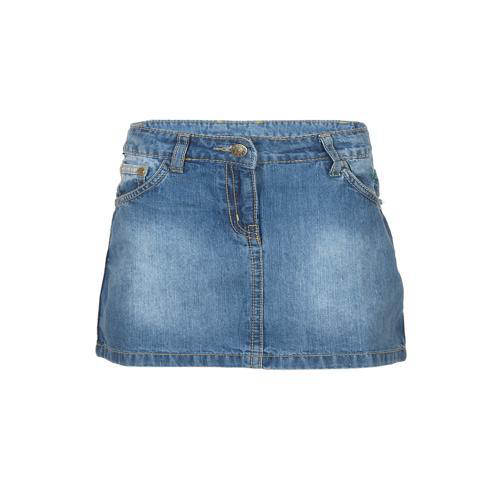

In [43]:
pil_query

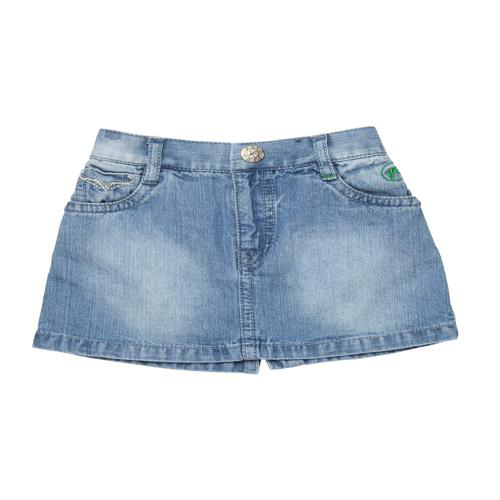

In [39]:
newlist[3]["image"]